<h1 align="center">Final Assignment</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import keras
from keras import layers
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report, roc_curve, auc
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

2026-02-02 23:00:26.659957: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1770073226.872748      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1770073226.936358      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1770073227.447494      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770073227.447542      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770073227.447545      55 computation_placer.cc:177] computation placer alr

# Correlations and general data stats

In [2]:
df = pd.read_csv('/kaggle/input/space-data/Spaceship data.csv')
df

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0             0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1           109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2            43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3             0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4           303.0       70.0         151.0   565.0     2.0  Willy Santantines   
...           ...        ...           ...     ...     ...                ...   
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported  
0           False  
1            True  
2           False  
3           False  
4            True  
...           ...  
8688        False  
8689        False  
8690         True  
8691        False  
8692         True  

[8693 rows x 14 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [5]:
categories = ['HomePlanet', 'CryoSleep', 'VIP', 'Transported']

for cat in categories:
    print(f"Distribution for {cat} (%):")
    print(df[cat].value_counts(normalize=True) * 100)
    print("\n")

Distribution for HomePlanet (%):
HomePlanet
Earth     54.192181
Europa    25.094206
Mars      20.713613
Name: proportion, dtype: float64


Distribution for CryoSleep (%):
CryoSleep
False    64.16942
True     35.83058
Name: proportion, dtype: float64


Distribution for VIP (%):
VIP
False    97.656066
True      2.343934
Name: proportion, dtype: float64


Distribution for Transported (%):
Transported
True     50.362361
False    49.637639
Name: proportion, dtype: float64




In [6]:
df.describe(include='all')

PassengerId HomePlanet CryoSleep    Cabin  Destination          Age  \
count         8693       8492      8476     8494         8511  8514.000000   
unique        8693          3         2     6560            3          NaN   
top        9280_02      Earth     False  G/734/S  TRAPPIST-1e          NaN   
freq             1       4602      5439        8         5915          NaN   
mean           NaN        NaN       NaN      NaN          NaN    28.827930   
std            NaN        NaN       NaN      NaN          NaN    14.489021   
min            NaN        NaN       NaN      NaN          NaN     0.000000   
25%            NaN        NaN       NaN      NaN          NaN    19.000000   
50%            NaN        NaN       NaN      NaN          NaN    27.000000   
75%            NaN        NaN       NaN      NaN          NaN    38.000000   
max            NaN        NaN       NaN      NaN          NaN    79.000000   

          VIP   RoomService     FoodCourt  ShoppingMall           Spa  \
count    8490   8512.000000   8510.000000   8485.000000   8510.000000   
unique      2           NaN           NaN           NaN           NaN   
top     False           NaN           NaN           NaN           NaN   
freq     8291           NaN           NaN           NaN           NaN   
mean      NaN    224.687617    458.077203    173.729169    311.138778   
std       NaN    666.717663   1611.489240    604.696458   1136.705535   
min       NaN      0.000000      0.000000      0.000000      0.000000   
25%       NaN      0.000000      0.000000      0.000000      0.000000   
50%       NaN      0.000000      0.000000      0.000000      0.000000   
75%       NaN     47.000000     76.000000     27.000000     59.000000   
max       NaN  14327.000000  29813.000000  23492.000000  22408.000000   

              VRDeck                Name Transported  
count    8505.000000                8493        8693  
unique           NaN                8473           2  
top              NaN  Ankalik Nateansive        True  
freq             NaN                   2        4378  
mean      304.854791                 NaN         NaN  
std      1145.717189                 NaN         NaN  
min         0.000000                 NaN         NaN  
25%         0.000000                 NaN         NaN  
50%         0.000000                 NaN         NaN  
75%        46.000000                 NaN         NaN  
max     24133.000000                 NaN         NaN

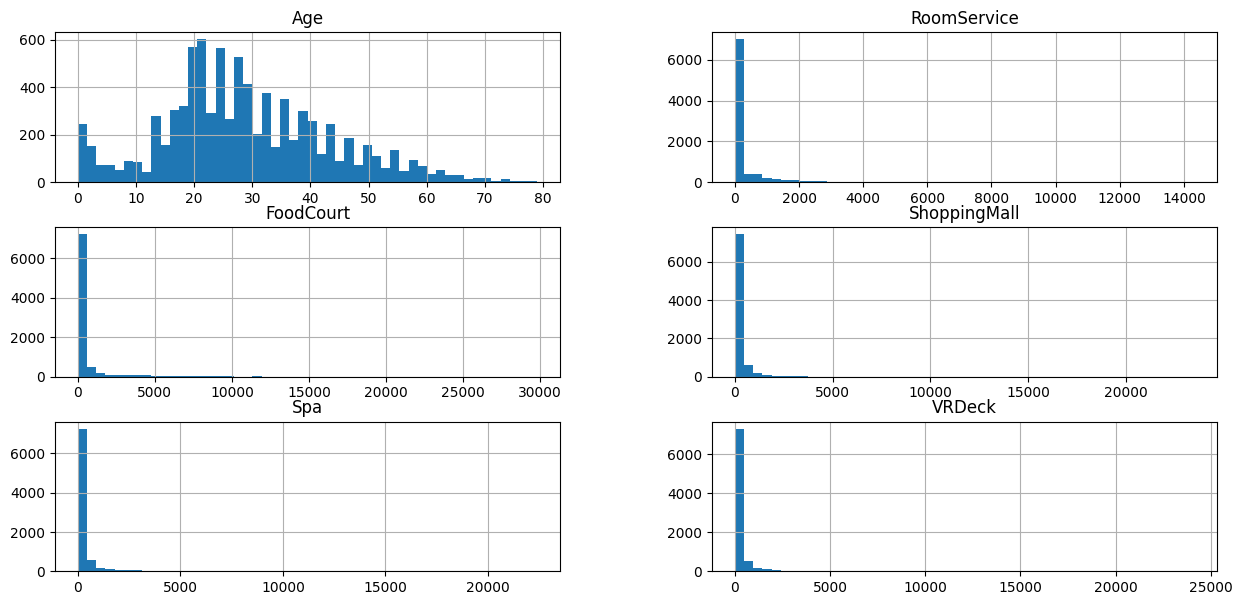

In [7]:
df.hist(bins=50, figsize=(15,7));

In [8]:
total_rows = len(df)
print('Expenses with values 0 (%):\n')
print('RoomService:', len(df[df['RoomService'] == 0]) / total_rows)
print('FoodCourt:', len(df[df['FoodCourt'] == 0]) / total_rows)
print('ShoppingMall:', len(df[df['ShoppingMall'] == 0]) / total_rows)
print('Spa:', len(df[df['Spa'] == 0]) / total_rows)
print('VRDeck:', len(df[df['VRDeck'] == 0]) / total_rows)

Expenses with values 0 (%):

RoomService: 0.6415506729552514
FoodCourt: 0.6276314275854136
ShoppingMall: 0.6427010238122628
Spa: 0.6124467962728632
VRDeck: 0.632117795927758


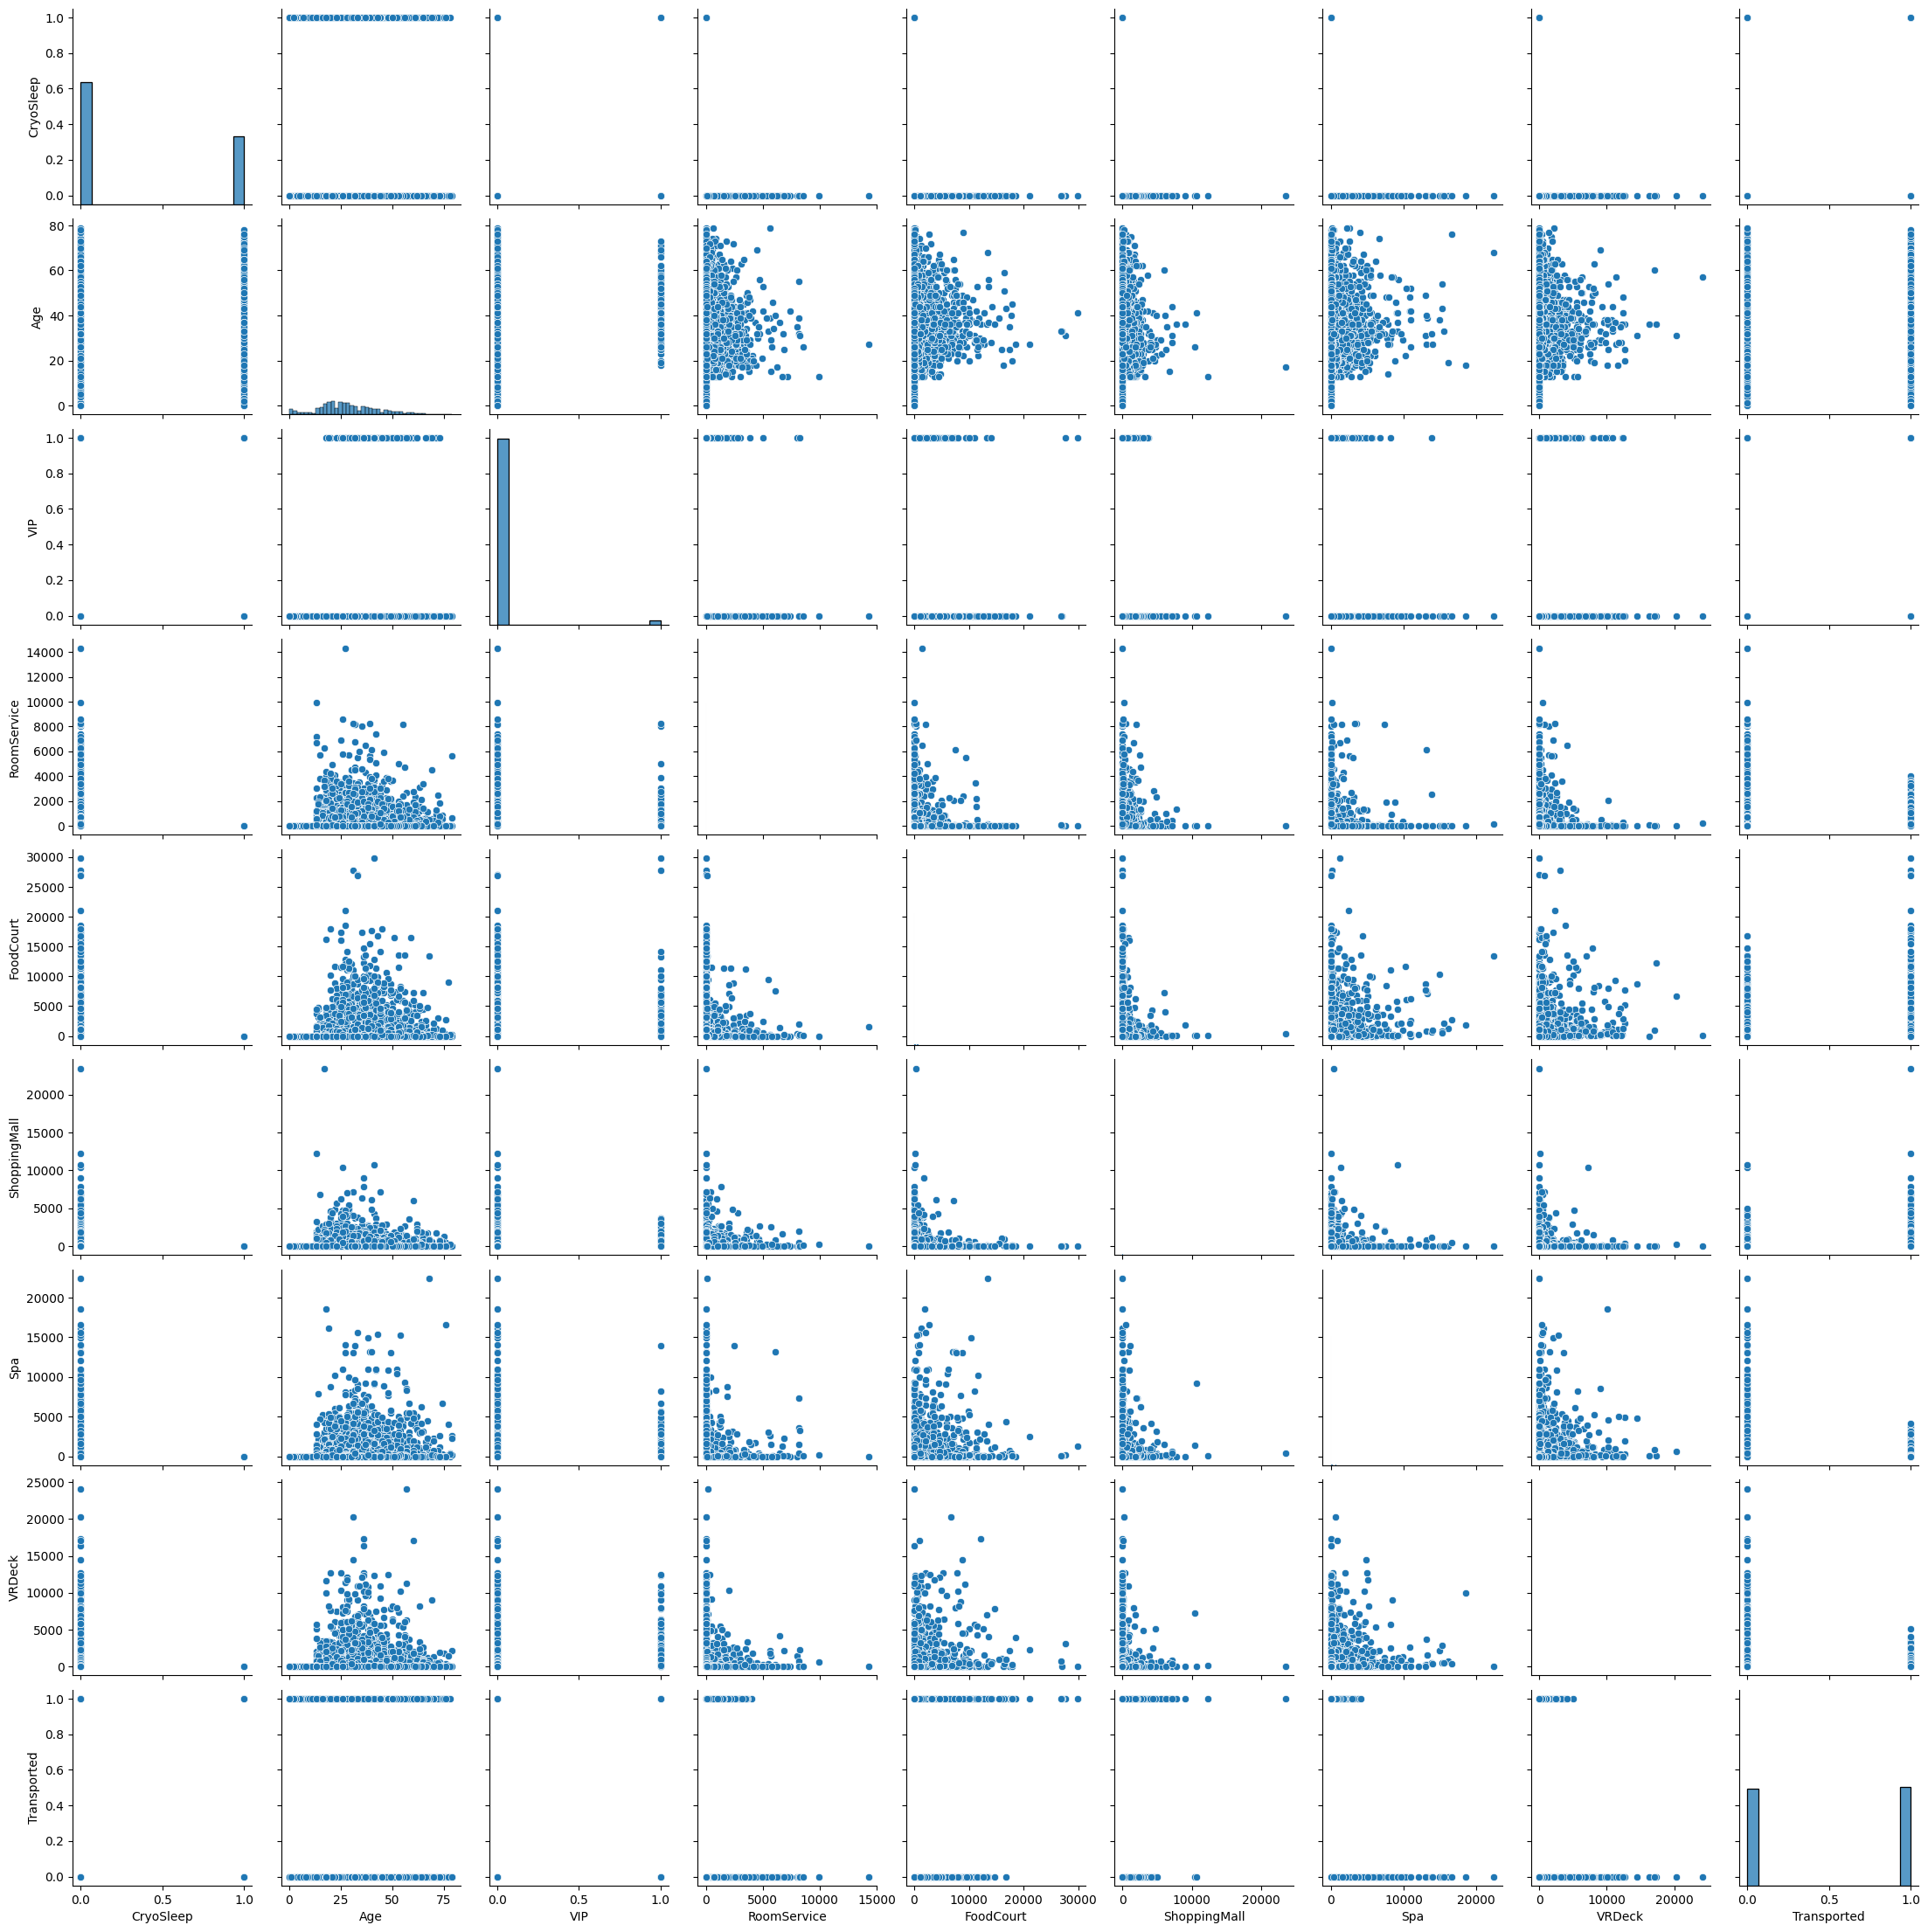

In [9]:
sns.pairplot(df);

In [10]:
homeplanet_map = {
    "Earth": 0,
    "Europa": 1,
    "Mars": 2
}

destination_map = {
    "55 Cancri e": 0,
    "PSO J318.5-22": 1,
    "TRAPPIST-1e": 2
}

deck_map = {
    "A": 0,
    "B": 1,
    "C": 2,
    "D": 3,
    "E": 4,
    "F": 5,
    "G": 6,
    "T": 7
}

side_map = {
    "P": 0,
    "S": 1
}

df_copy = df.copy()

expenses = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df_copy[expenses] = df_copy[expenses].fillna(0)
df_copy['Expenses'] = df_copy[expenses].sum(axis=1)
df_copy.drop(columns=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], inplace=True)

cabin_split = df_copy["Cabin"].str.split("/", expand=True)
id_split = df_copy['PassengerId'].str.split("_", expand=True)

df_copy.drop(columns=['PassengerId', 'Name', 'Cabin'], inplace=True)

df_copy["GroupId"] = id_split[0].astype(int)
df_copy["GroupPassangerId"] = id_split[1].astype(int)

df_copy["CabinDeck"] = cabin_split[0].map(deck_map).fillna(-1).astype(int)
df_copy["CabinNum"]  = cabin_split[1].fillna(-1).astype(int)
df_copy["CabinSide"] = cabin_split[2].map(side_map).fillna(-1).astype(int)
df_copy["HomePlanet"] = df_copy["HomePlanet"].map(homeplanet_map).fillna(-1).astype(int)
df_copy["Destination"] = df_copy["Destination"].map(destination_map).fillna(-1).astype(int)

df_copy

HomePlanet CryoSleep  Destination   Age    VIP  Transported  Expenses  \
0              1     False            2  39.0  False        False       0.0   
1              0     False            2  24.0  False         True     736.0   
2              1     False            2  58.0   True        False   10383.0   
3              1     False            2  33.0  False        False    5176.0   
4              0     False            2  16.0  False         True    1091.0   
...          ...       ...          ...   ...    ...          ...       ...   
8688           1     False            0  41.0   True        False    8536.0   
8689           0      True            1  18.0  False        False       0.0   
8690           0     False            2  26.0  False         True    1873.0   
8691           1     False            0  32.0  False        False    4637.0   
8692           1     False            2  44.0  False         True    4826.0   

      GroupId  GroupPassangerId  CabinDeck  CabinNum  CabinSide  
0           1                 1          1         0          0  
1           2                 1          5         0          1  
2           3                 1          0         0          1  
3           3                 2          0         0          1  
4           4                 1          5         1          1  
...       ...               ...        ...       ...        ...  
8688     9276                 1          0        98          0  
8689     9278                 1          6      1499          1  
8690     9279                 1          6      1500          1  
8691     9280                 1          4       608          1  
8692     9280                 2          4       608          1  

[8693 rows x 12 columns]

In [11]:
df_copy.nunique()

HomePlanet             4
CryoSleep              2
Destination            4
Age                   80
VIP                    2
Transported            2
Expenses            2336
GroupId             6217
GroupPassangerId       8
CabinDeck              9
CabinNum            1818
CabinSide              3
dtype: int64

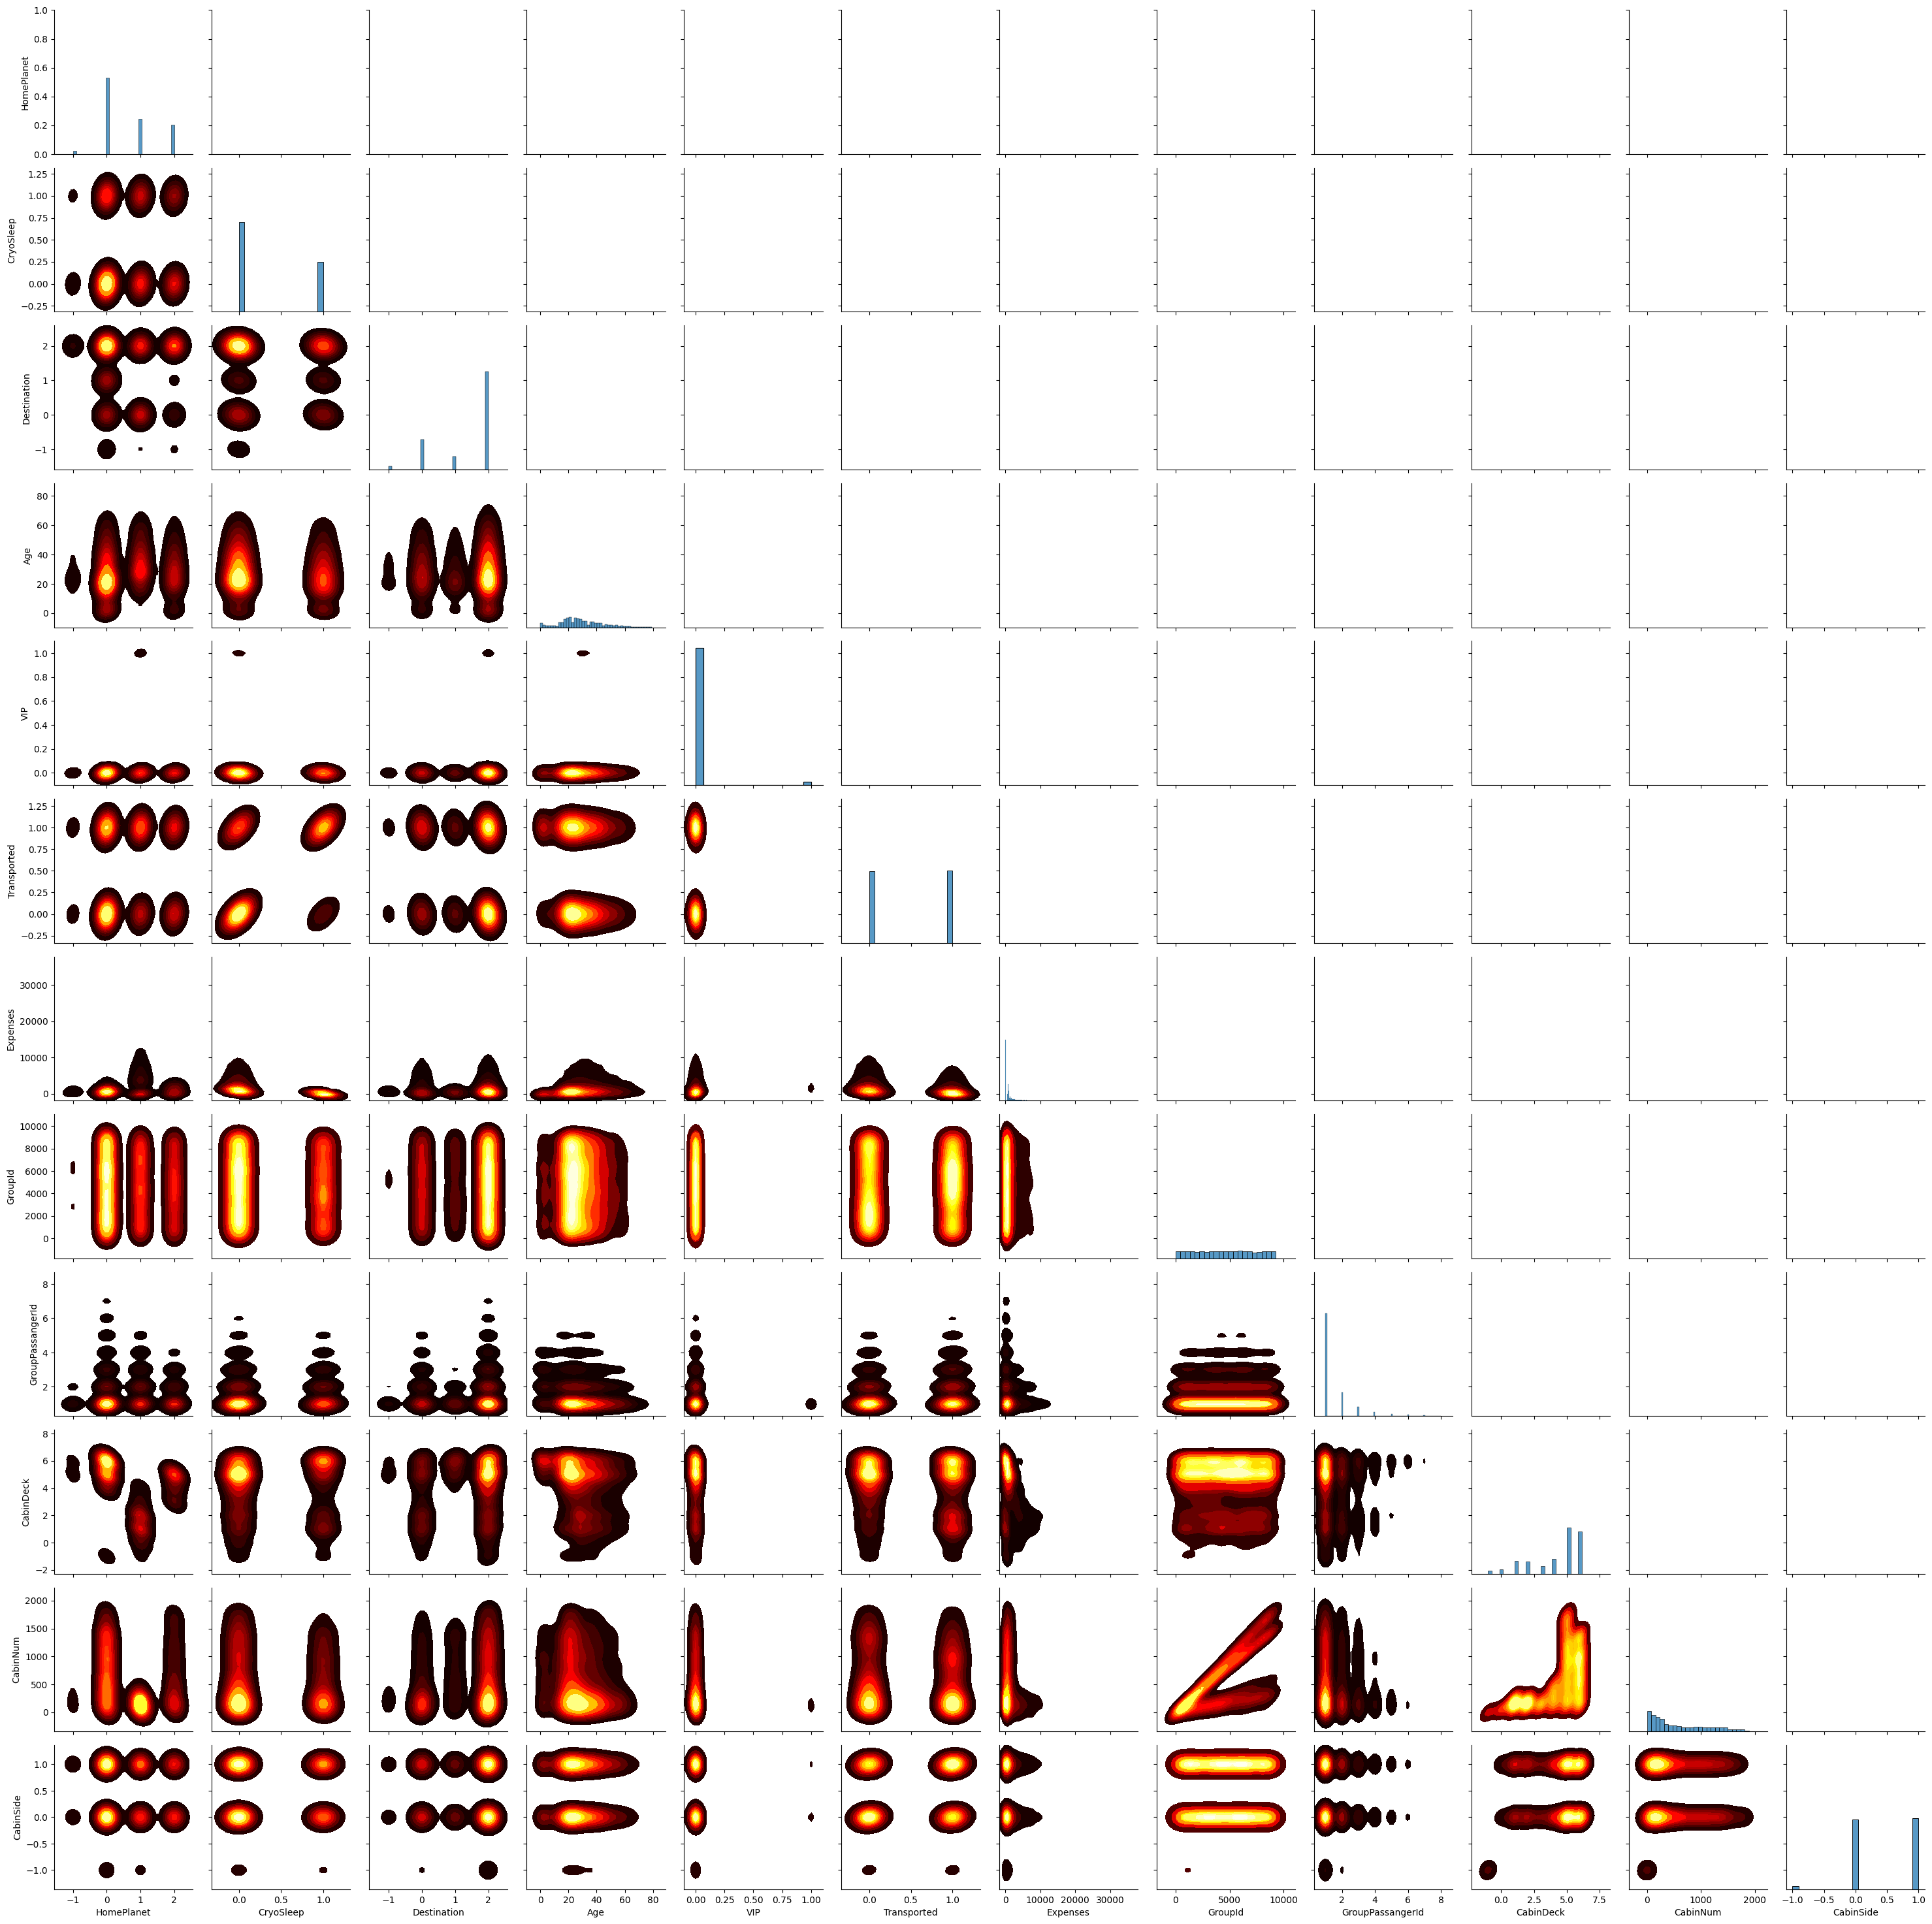

In [12]:
g = sns.PairGrid(df_copy)
# g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap='hot', fill=True, color=".2", gridsize=50)
g.map_diag(sns.histplot)
plt.show()

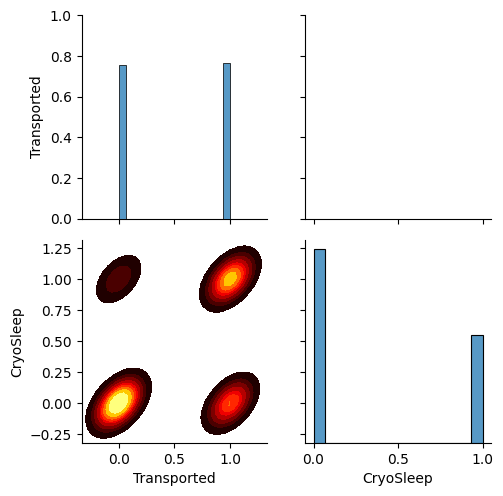

In [13]:
cols_to_plot = ['Transported', 'CryoSleep']

g = sns.PairGrid(df_copy, vars=cols_to_plot)
g.map_lower(sns.kdeplot, cmap='hot', fill=True, color=".2", gridsize=50)
g.map_diag(sns.histplot)
plt.show()

<Figure size 1500x500 with 0 Axes>

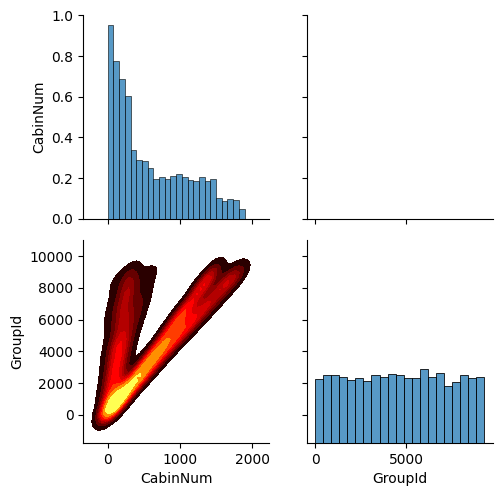

In [14]:
cols_to_plot = ['CabinNum', 'GroupId']

plt.figure(figsize=(15, 5))
g = sns.PairGrid(df_copy, vars=cols_to_plot)
g.map_lower(sns.kdeplot, cmap='hot', fill=True, color=".2", gridsize=50)
g.map_diag(sns.histplot)
plt.show()

# Analysis

## CryoSleep

In [15]:
count_nan_transported = df_copy['Transported'].isna().sum()
count_nan_cryosleep = df_copy['CryoSleep'].isna().sum()

print(f"Total NaNs in 'Transported': {count_nan_transported}")
print(f"Total NaNs in 'CryoSleep': {count_nan_cryosleep}")

print('\n')

ct = pd.crosstab(
    df_copy['Transported'].fillna('NaN'), 
    df_copy['CryoSleep'].fillna('NaN'), 
    margins=True, 
    margins_name="Total"
)

print(ct)

print('\n')

print('Percentages:')
total_percentages = (ct / ct.loc['Total', 'Total']) * 100
formatted_ct = total_percentages.round(2).astype(str) + '%'
print(formatted_ct)

ct_no_nan = pd.crosstab(
    df_copy['Transported'], 
    df_copy['CryoSleep'], 
    margins=True, 
    margins_name="Total"
)

print('\n')

print("Percentages without 'NaN':")
total_percentages = (ct_no_nan / ct_no_nan.loc['Total', 'Total']) * 100
formatted_ct_no_nan = total_percentages.round(2).astype(str) + '%'
print(formatted_ct_no_nan)

print('\n')

cryosleep_classification_accuracy = (total_percentages[False][False] + total_percentages[True][True]).round(2)
print(f'If we classify CryoSleep state using the Transported Column we can expect an accuracy of around {cryosleep_classification_accuracy}%')

Total NaNs in 'Transported': 0
Total NaNs in 'CryoSleep': 217


CryoSleep    False  True  NaN  Total
Transported                         
False         3650   554  111   4315
True          1789  2483  106   4378
Total         5439  3037  217   8693


Percentages:
CryoSleep     False    True    NaN   Total
Transported                               
False        41.99%   6.37%  1.28%  49.64%
True         20.58%  28.56%  1.22%  50.36%
Total        62.57%  34.94%   2.5%  100.0%


Percentages without 'NaN':
CryoSleep     False    True   Total
Transported                        
False        43.06%   6.54%   49.6%
True         21.11%  29.29%   50.4%
Total        64.17%  35.83%  100.0%


If we classify CryoSleep state using the Transported Column we can expect an accuracy of around 72.36%


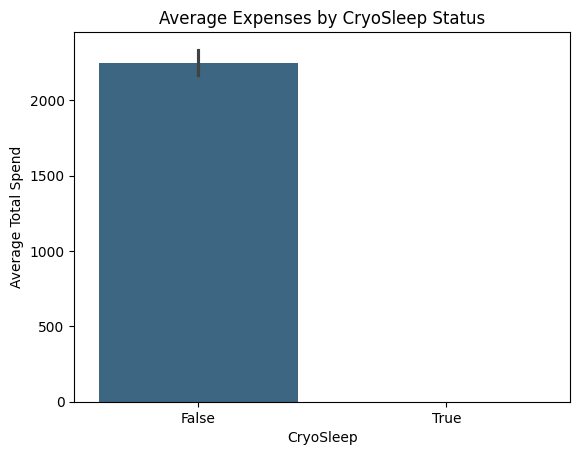

In [16]:
warnings.filterwarnings("ignore")

sns.barplot(data=df_copy, x='CryoSleep', y='Expenses', palette='viridis')

plt.title('Average Expenses by CryoSleep Status')
plt.ylabel('Average Total Spend')
plt.show()

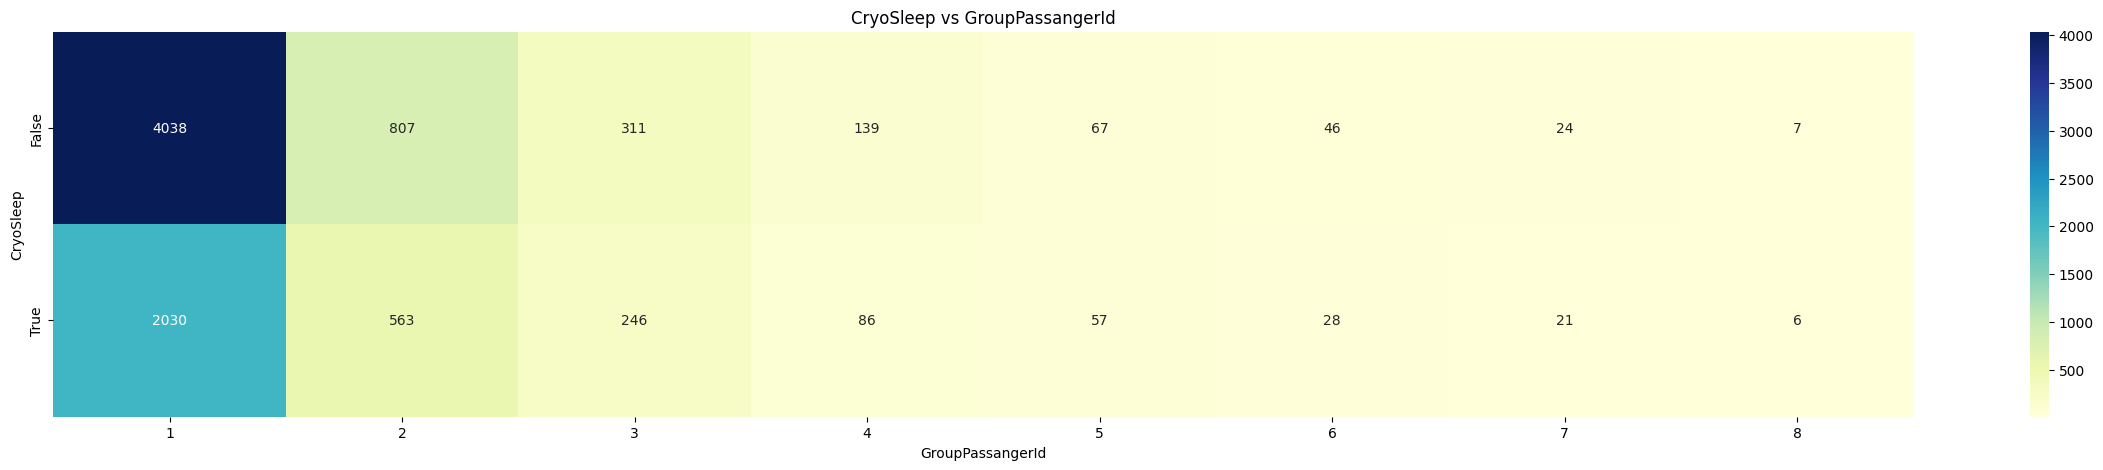

In [17]:
col1 = 'CryoSleep'
col2 = 'GroupPassangerId'

ct = pd.crosstab(df_copy[col1], df_copy[col2])

plt.figure(figsize=(30, 5))
# Plotting
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'{col1} vs {col2}')
plt.show()

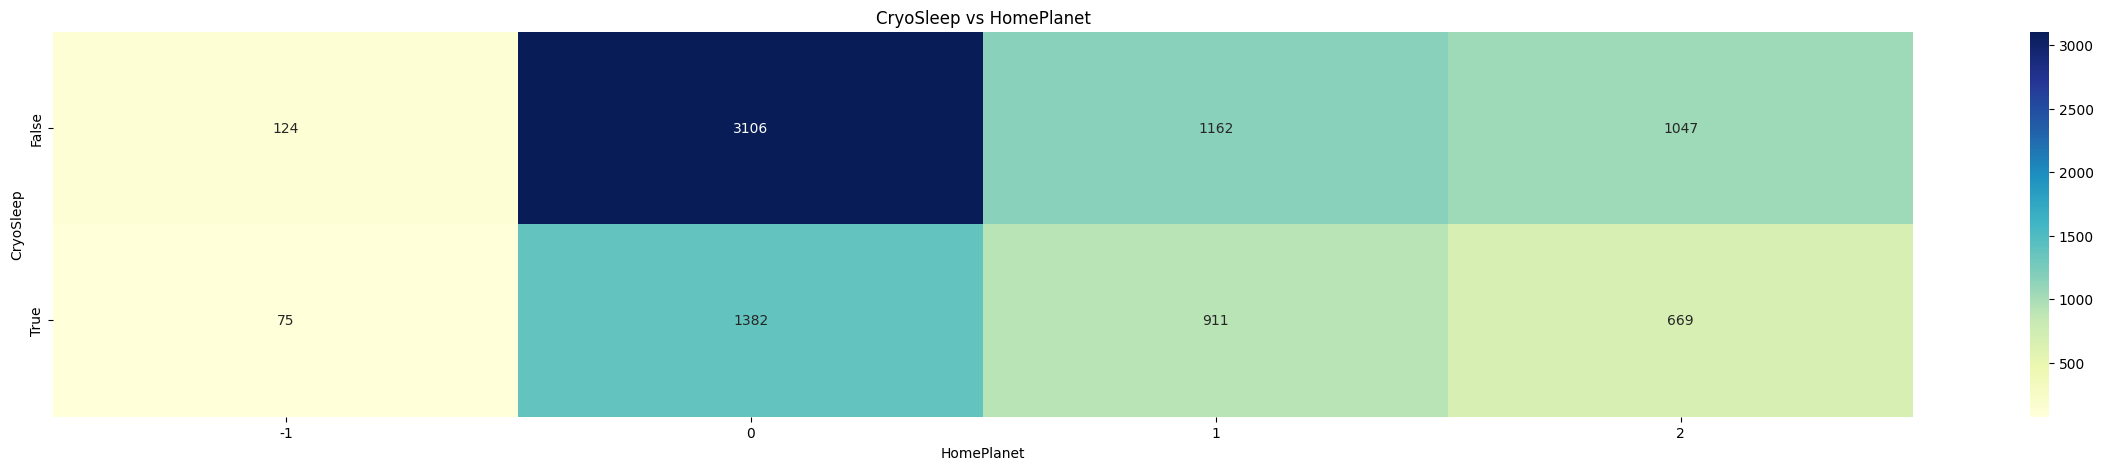

In [18]:
col1 = 'CryoSleep'
col2 = 'HomePlanet'

ct = pd.crosstab(df_copy[col1], df_copy[col2])

plt.figure(figsize=(30, 5))
# Plotting
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'{col1} vs {col2}')
plt.show()

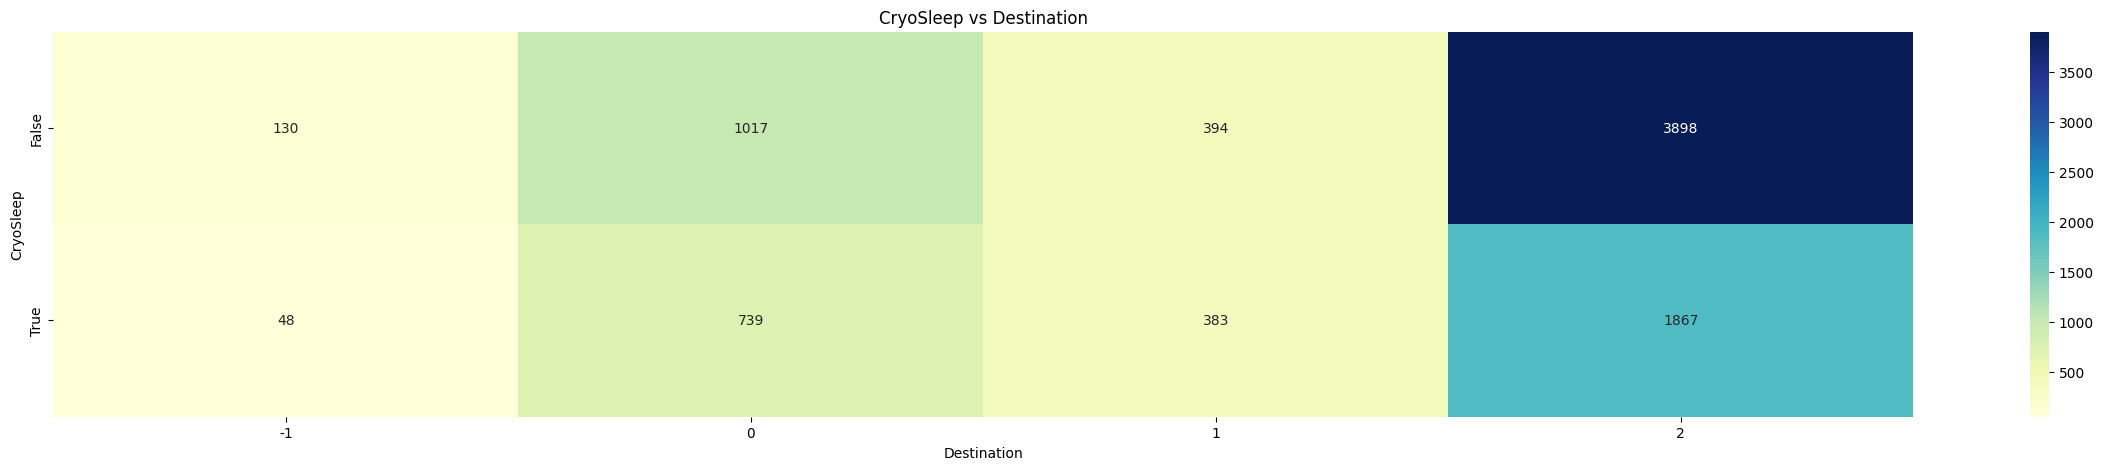

In [19]:
col1 = 'CryoSleep'
col2 = 'Destination'

ct = pd.crosstab(df_copy[col1], df_copy[col2])

plt.figure(figsize=(30, 5))
# Plotting
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'{col1} vs {col2}')
plt.show()

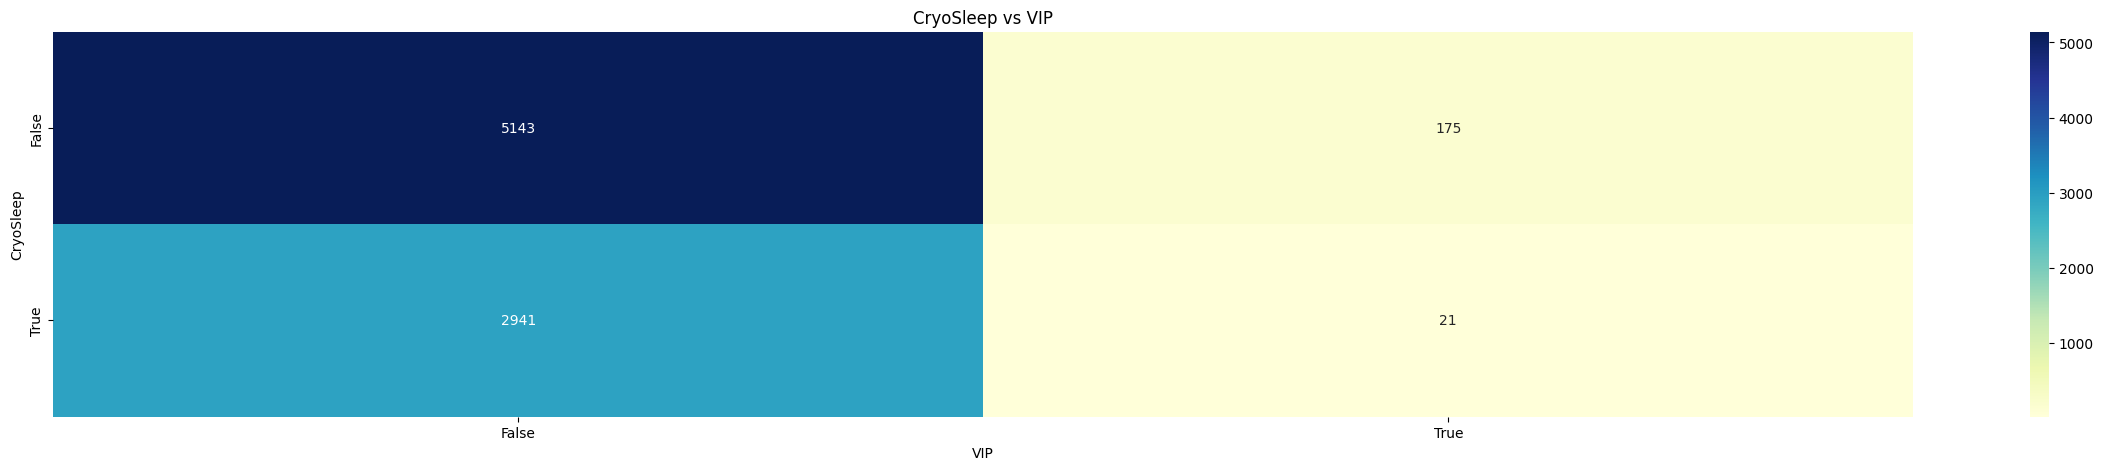

In [20]:
col1 = 'CryoSleep'
col2 = 'VIP'

ct = pd.crosstab(df_copy[col1], df_copy[col2])

plt.figure(figsize=(30, 5))
# Plotting
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'{col1} vs {col2}')
plt.show()

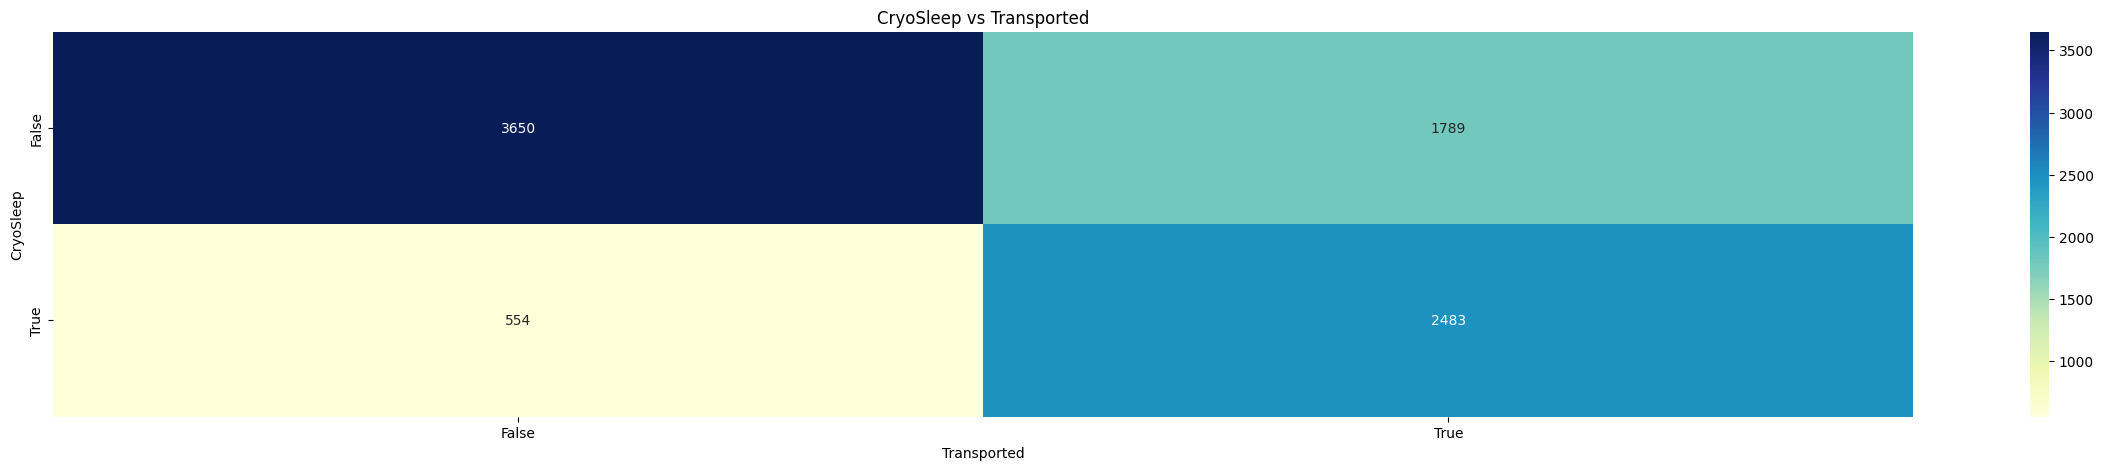

In [21]:
col1 = 'CryoSleep'
col2 = 'Transported'

ct = pd.crosstab(df_copy[col1], df_copy[col2])

plt.figure(figsize=(30, 5))
# Plotting
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'{col1} vs {col2}')
plt.show()

## Expenses

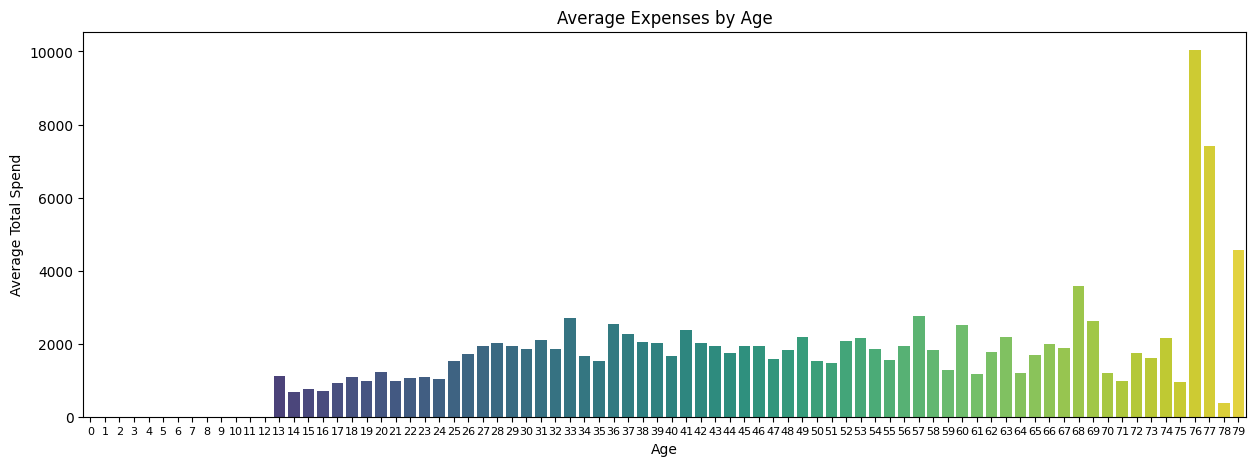

In [22]:
# Create a new dataframe dropping rows where Age is missing
df_clean = df_copy.dropna(subset=['Age']).copy()

# Convert Age to integer (required for the range() function in your plot)
df_clean['Age'] = df_clean['Age'].astype(int)

age_min = df_clean['Age'].min()
age_max = df_clean['Age'].max()
age_list = list(range(age_min, age_max + 1))

plt.figure(figsize=(15, 5))
sns.barplot(
    data=df_clean, 
    x='Age', 
    y='Expenses', 
    hue='Age', 
    palette='viridis', 
    legend=False, 
    errorbar=None
)

plt.xticks(ticks=range(len(age_list)), labels=age_list, fontsize=8)

plt.title('Average Expenses by Age')
plt.ylabel('Average Total Spend')
plt.show()

In [23]:
df_copy.loc[df_copy['CabinDeck'] == -1, 'CabinDeck'] = np.nan
df_copy.loc[df_copy['CabinNum'] == -1, 'CabinNum'] = np.nan
df_copy.loc[df_copy['CabinSide'] == -1, 'CabinSide'] = np.nan
df_copy.loc[df_copy['HomePlanet'] == -1, 'HomePlanet'] = np.nan
df_copy.loc[df_copy['Destination'] == -1, 'Destination'] = np.nan
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HomePlanet        8492 non-null   float64
 1   CryoSleep         8476 non-null   object 
 2   Destination       8511 non-null   float64
 3   Age               8514 non-null   float64
 4   VIP               8490 non-null   object 
 5   Transported       8693 non-null   bool   
 6   Expenses          8693 non-null   float64
 7   GroupId           8693 non-null   int64  
 8   GroupPassangerId  8693 non-null   int64  
 9   CabinDeck         8494 non-null   float64
 10  CabinNum          8494 non-null   float64
 11  CabinSide         8494 non-null   float64
dtypes: bool(1), float64(7), int64(2), object(2)
memory usage: 755.7+ KB


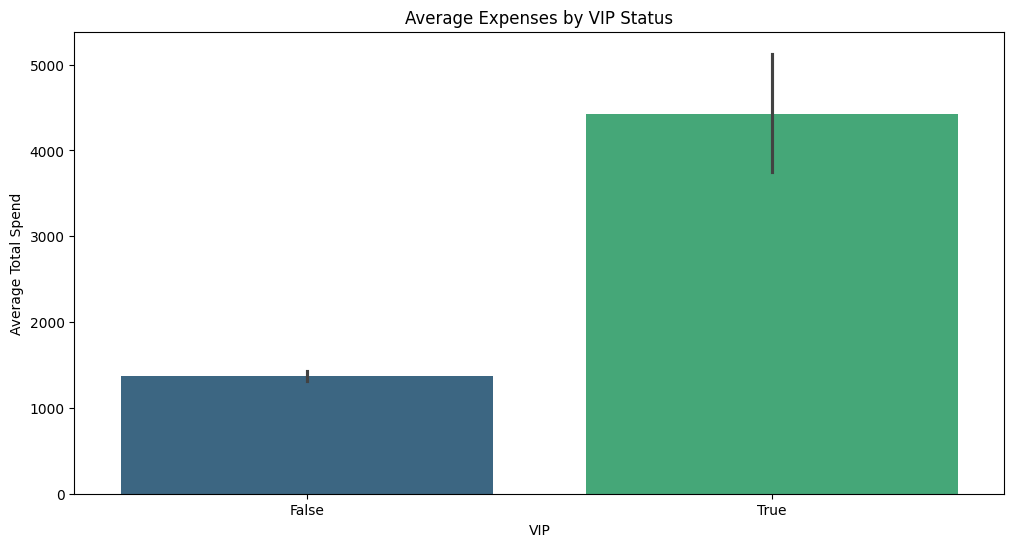

Text(0, 0.5, 'Frequency')

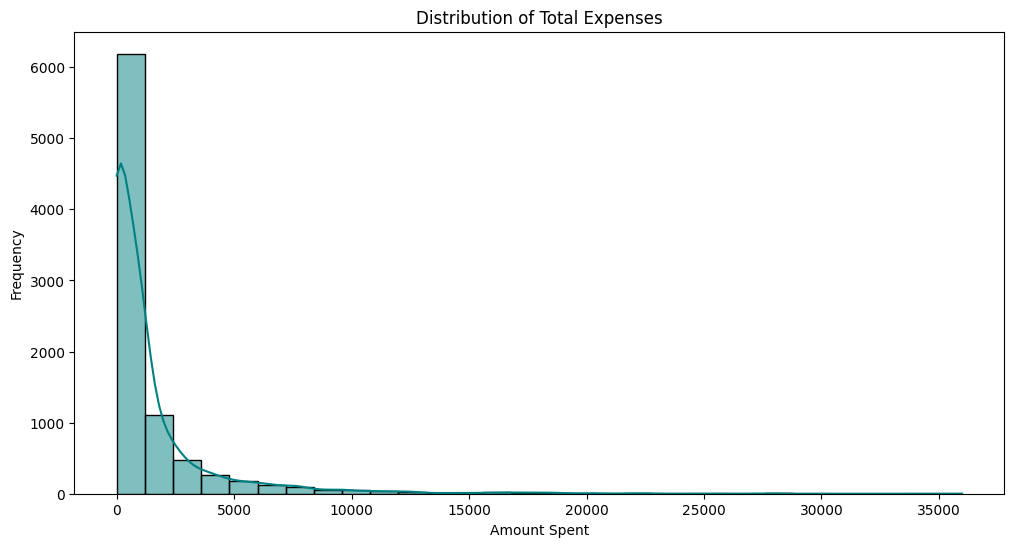

In [24]:
warnings.filterwarnings("ignore")

plt.figure(figsize=(12, 6))

sns.barplot(data=df_copy, x='VIP', y='Expenses', palette='viridis')

plt.title('Average Expenses by VIP Status')
plt.ylabel('Average Total Spend')
plt.show()

non_vip_avg_expenses = np.mean(df_copy[df_copy['VIP'] == False]['Expenses'])
vip_avg_expenses = np.mean(df_copy[df_copy['VIP'] == True]['Expenses'])

plt.figure(figsize=(12, 6))
sns.histplot(df_copy['Expenses'], bins=30, kde=True, color='teal')
plt.title('Distribution of Total Expenses')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')

## CabinDeck x CabinSide

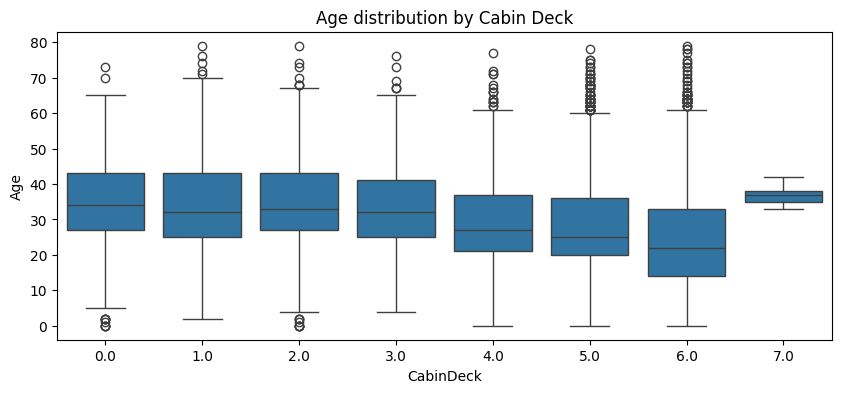

In [25]:
plt.figure(figsize=(10, 4))

sns.boxplot(
    data=df_copy,
    x='CabinDeck',
    y='Age'
)

plt.title('Age distribution by Cabin Deck')
plt.show()

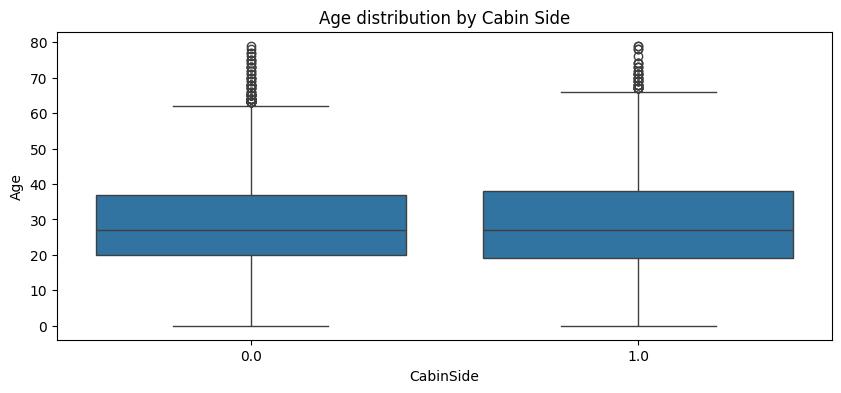

In [26]:
plt.figure(figsize=(10, 4))

sns.boxplot(
    data=df_copy,
    x='CabinSide',
    y='Age'
)

plt.title('Age distribution by Cabin Side')
plt.show()

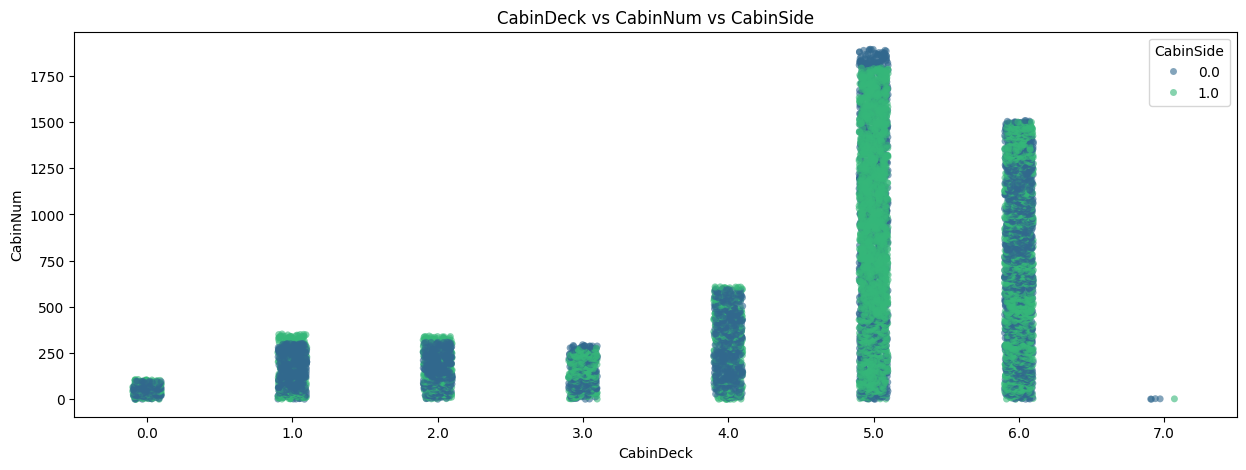

In [27]:
plt.figure(figsize=(15, 5))

sns.stripplot(
    data=df_copy,
    x='CabinDeck',
    y='CabinNum',
    alpha=0.6,
    palette='viridis',
    hue='CabinSide'
)

plt.title('CabinDeck vs CabinNum vs CabinSide')
plt.ylabel('CabinNum')
plt.xlabel('CabinDeck')
plt.show()


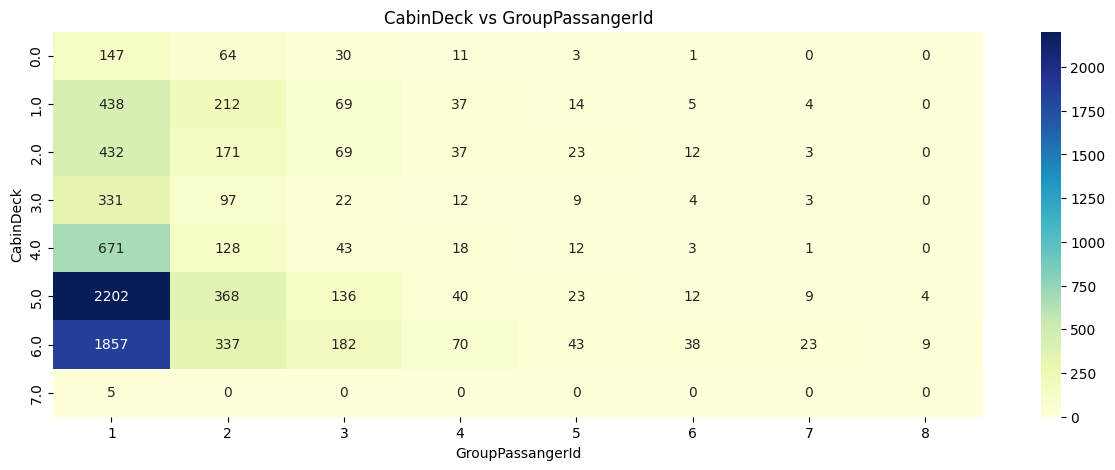

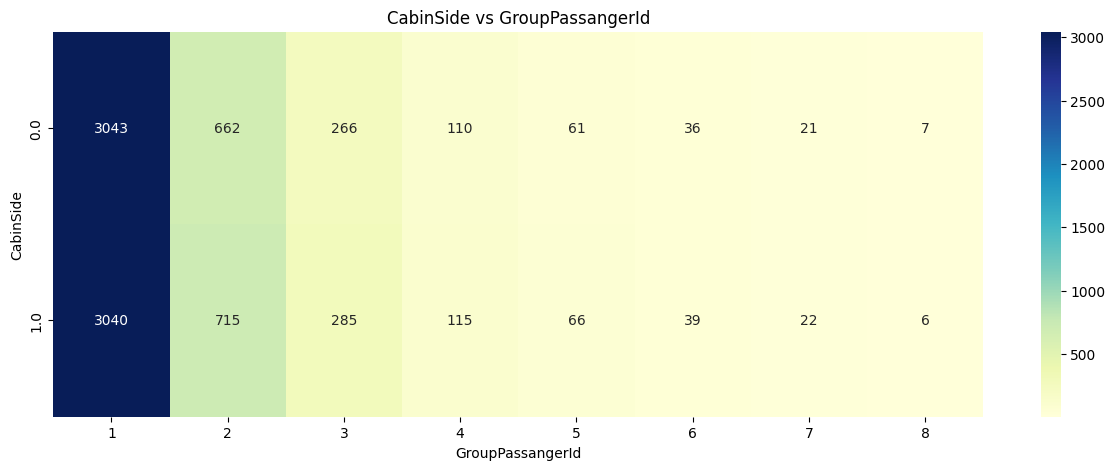

In [28]:
col1 = 'CabinDeck'
col2 = 'GroupPassangerId'

ct = pd.crosstab(df_copy[col1], df_copy[col2])

plt.figure(figsize=(15, 5))
# Plotting
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'{col1} vs {col2}')
plt.show()

col1 = 'CabinSide'
col2 = 'GroupPassangerId'

plt.figure(figsize=(15, 5))
ct = pd.crosstab(df_copy[col1], df_copy[col2])

# Plotting
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'{col1} vs {col2}')
plt.show()

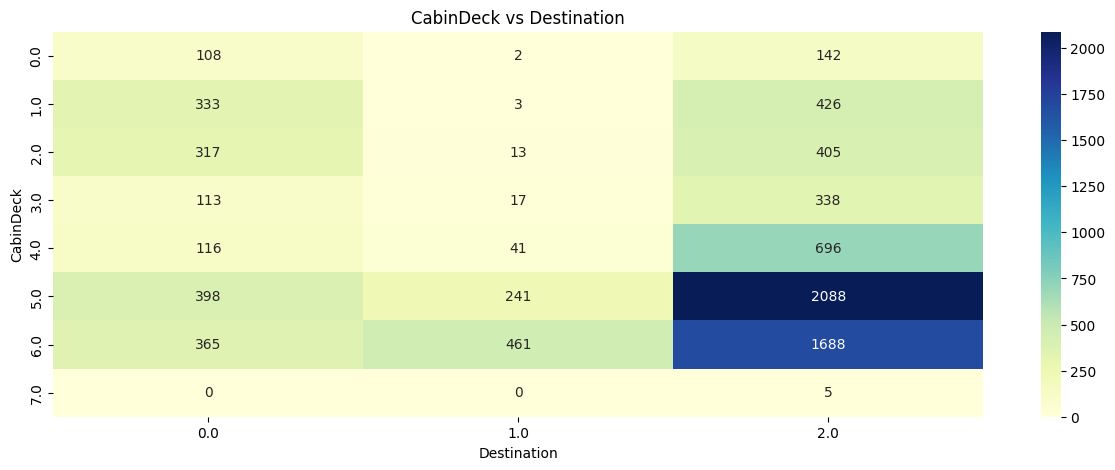

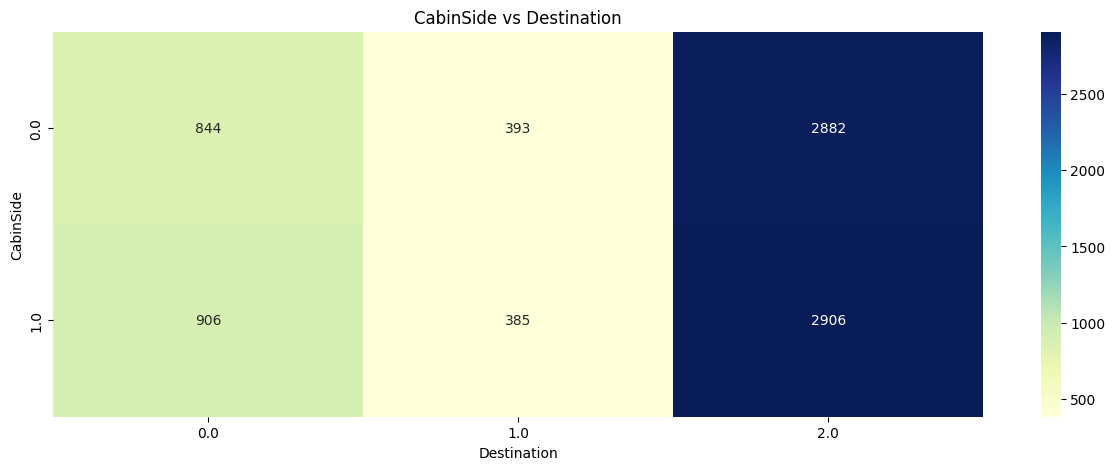

In [29]:
col1 = 'CabinDeck'
col2 = 'Destination'

ct = pd.crosstab(df_copy[col1], df_copy[col2])

plt.figure(figsize=(15, 5))
# Plotting
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'{col1} vs {col2}')
plt.show()

col1 = 'CabinSide'
col2 = 'Destination'

plt.figure(figsize=(15, 5))
ct = pd.crosstab(df_copy[col1], df_copy[col2])

# Plotting
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'{col1} vs {col2}')
plt.show()

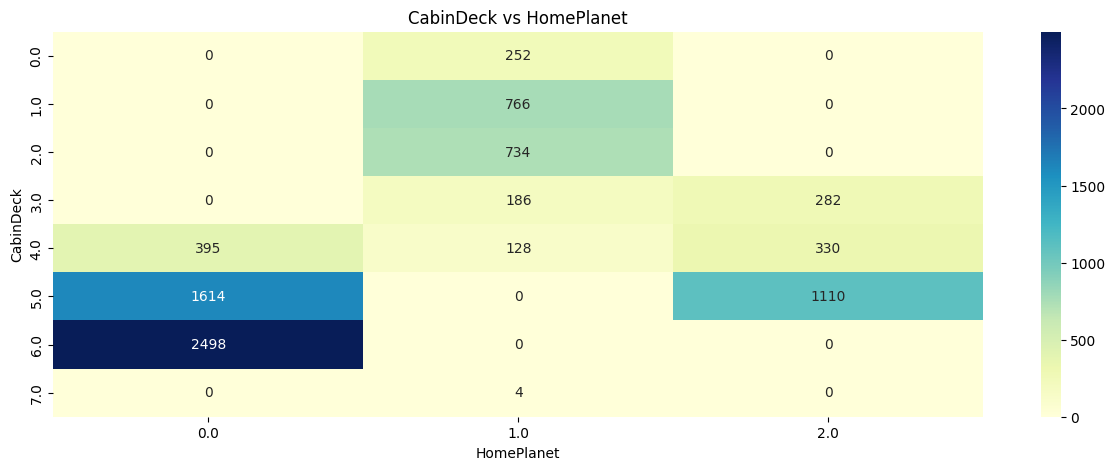

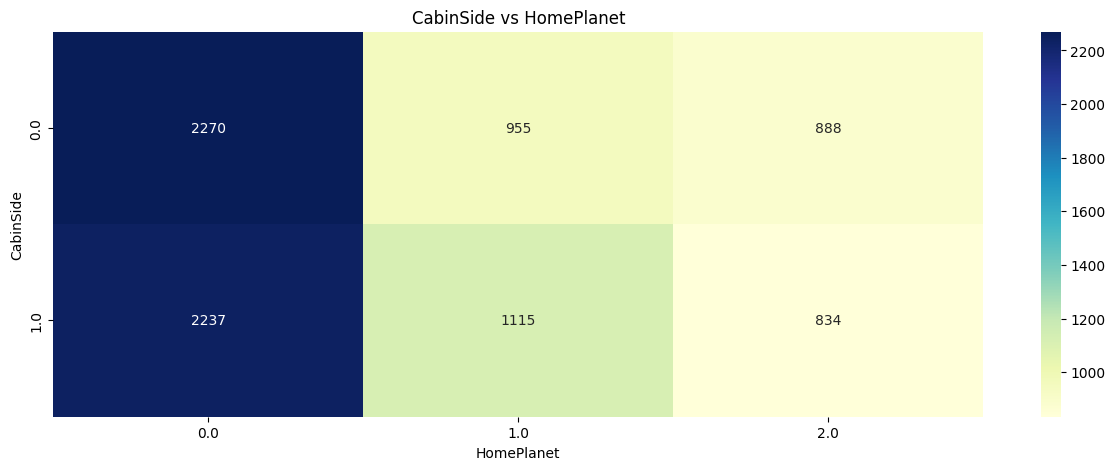

In [30]:
col1 = 'CabinDeck'
col2 = 'HomePlanet'

ct = pd.crosstab(df_copy[col1], df_copy[col2])

plt.figure(figsize=(15, 5))
# Plotting
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'{col1} vs {col2}')
plt.show()

col1 = 'CabinSide'
col2 = 'HomePlanet'

plt.figure(figsize=(15, 5))
ct = pd.crosstab(df_copy[col1], df_copy[col2])

# Plotting
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'{col1} vs {col2}')
plt.show()

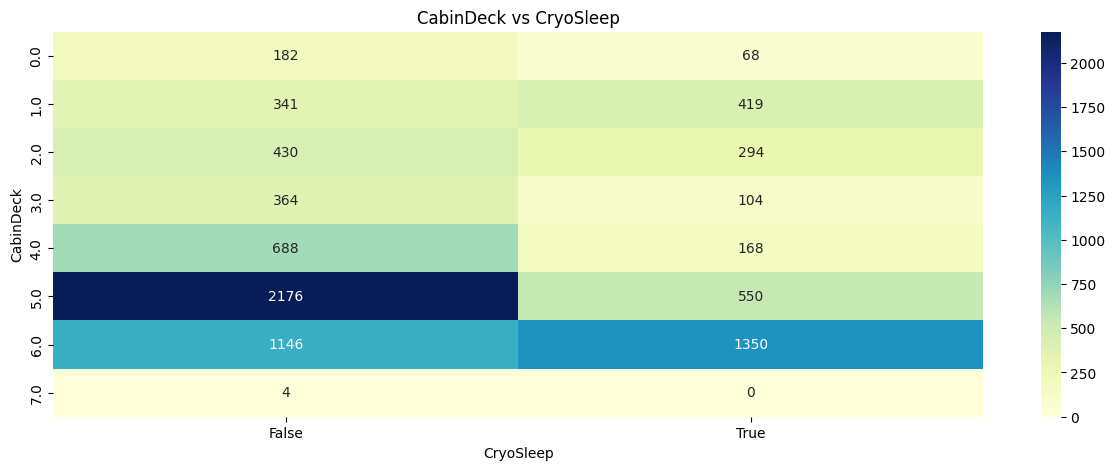

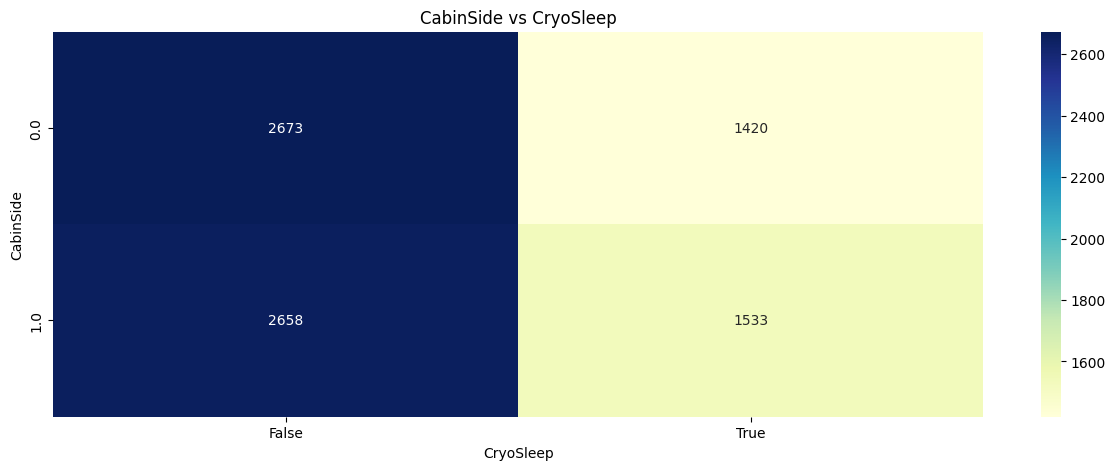

In [31]:
col1 = 'CabinDeck'
col2 = 'CryoSleep'

ct = pd.crosstab(df_copy[col1], df_copy[col2])

plt.figure(figsize=(15, 5))
# Plotting
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'{col1} vs {col2}')
plt.show()

col1 = 'CabinSide'
col2 = 'CryoSleep'

plt.figure(figsize=(15, 5))
ct = pd.crosstab(df_copy[col1], df_copy[col2])

# Plotting
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'{col1} vs {col2}')
plt.show()

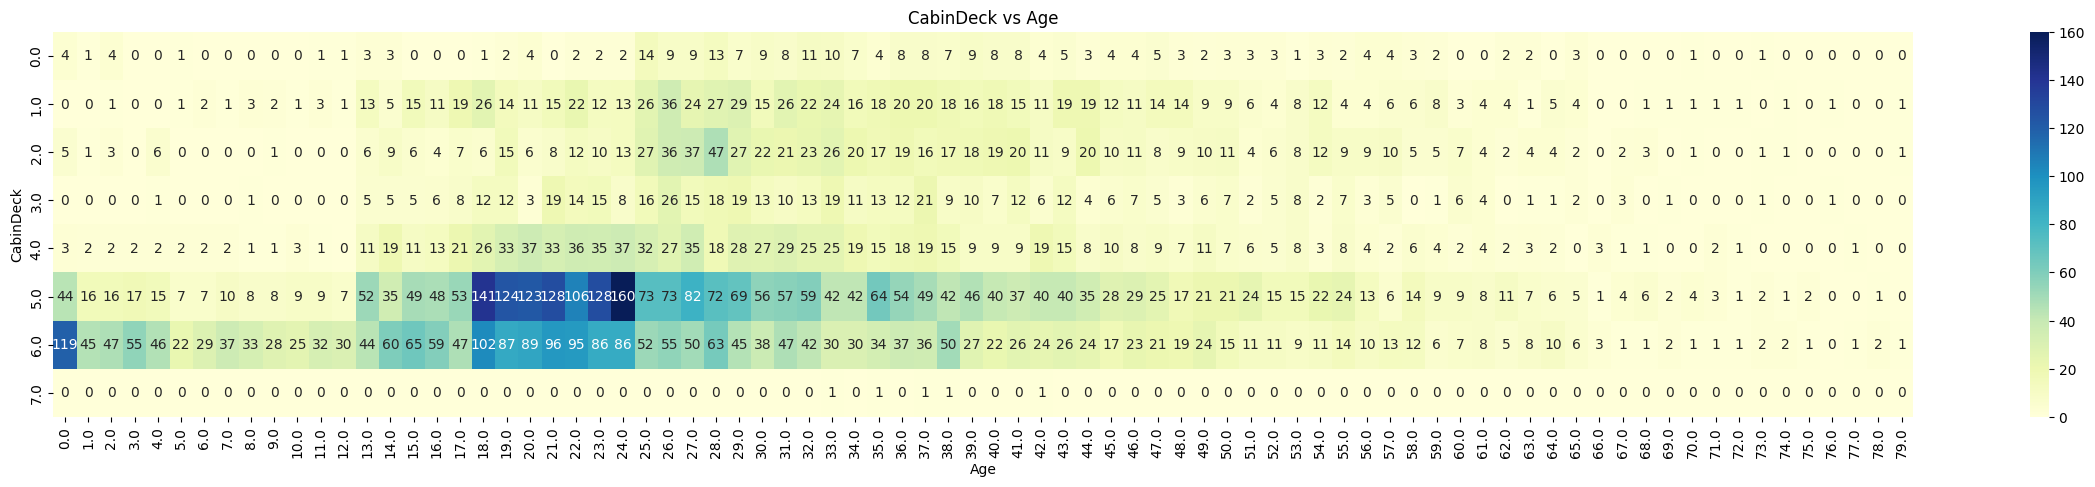

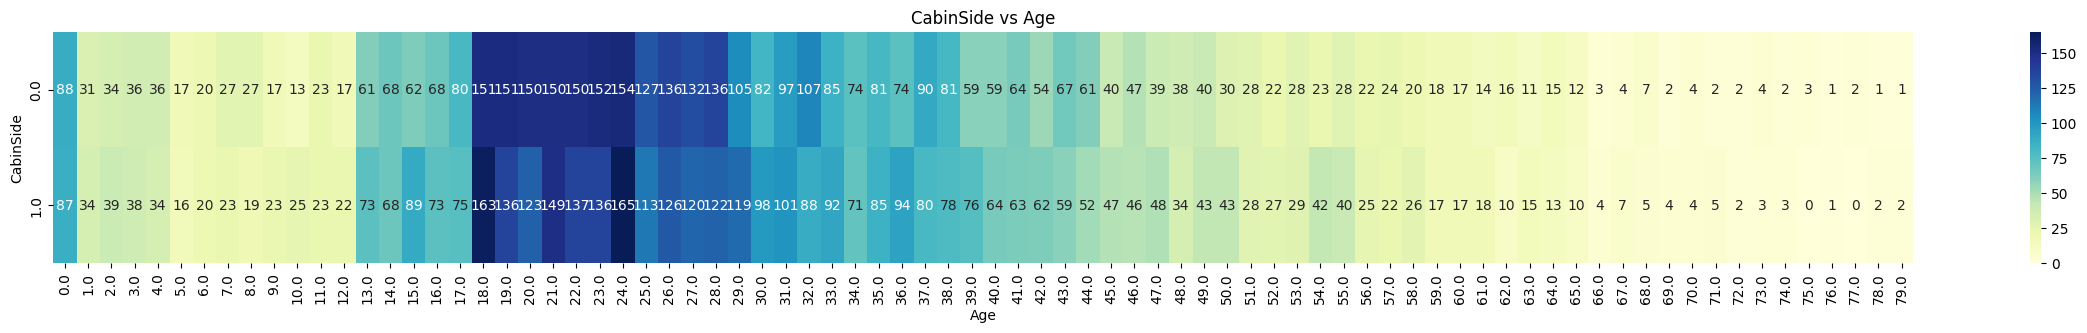

In [32]:
col1 = 'CabinDeck'
col2 = 'Age'

ct = pd.crosstab(df_copy[col1], df_copy[col2])

plt.figure(figsize=(30, 5))
# Plotting
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'{col1} vs {col2}')
plt.show()

col1 = 'CabinSide'
col2 = 'Age'

plt.figure(figsize=(30, 3))
ct = pd.crosstab(df_copy[col1], df_copy[col2])

# Plotting
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'{col1} vs {col2}')
plt.show()

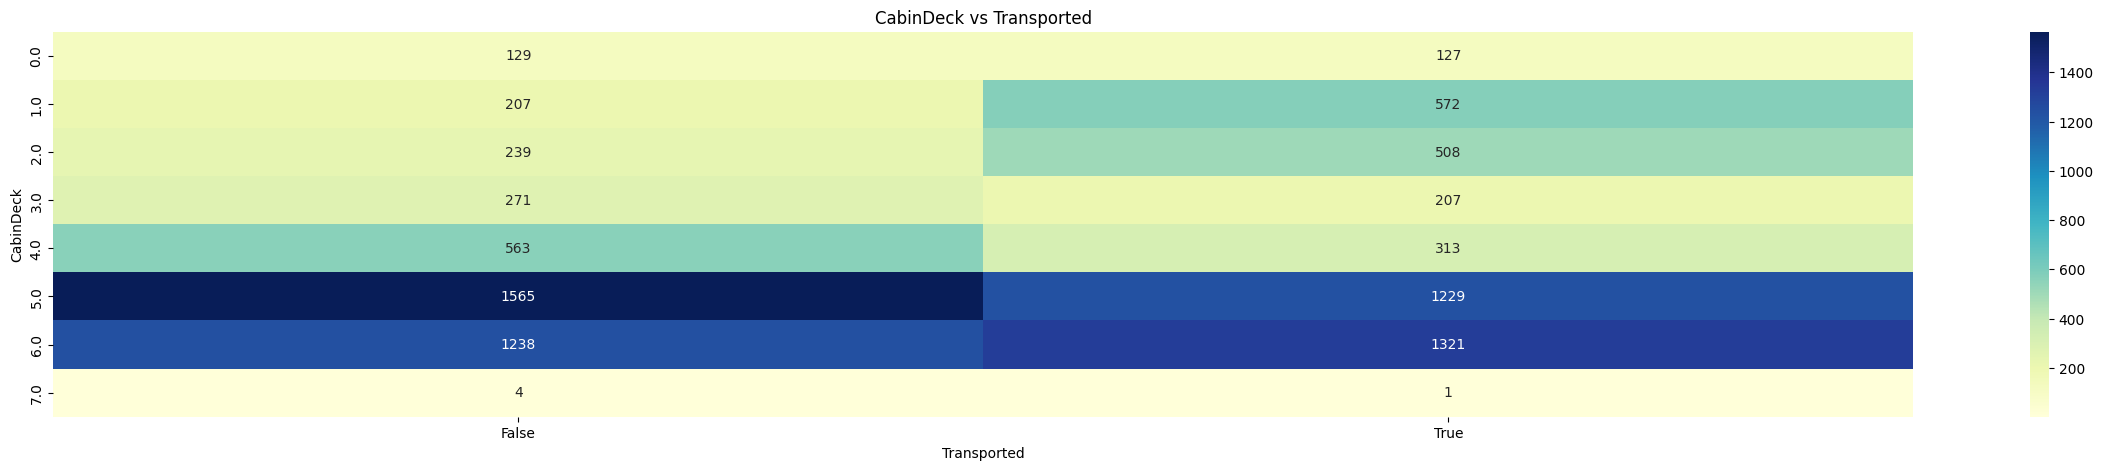

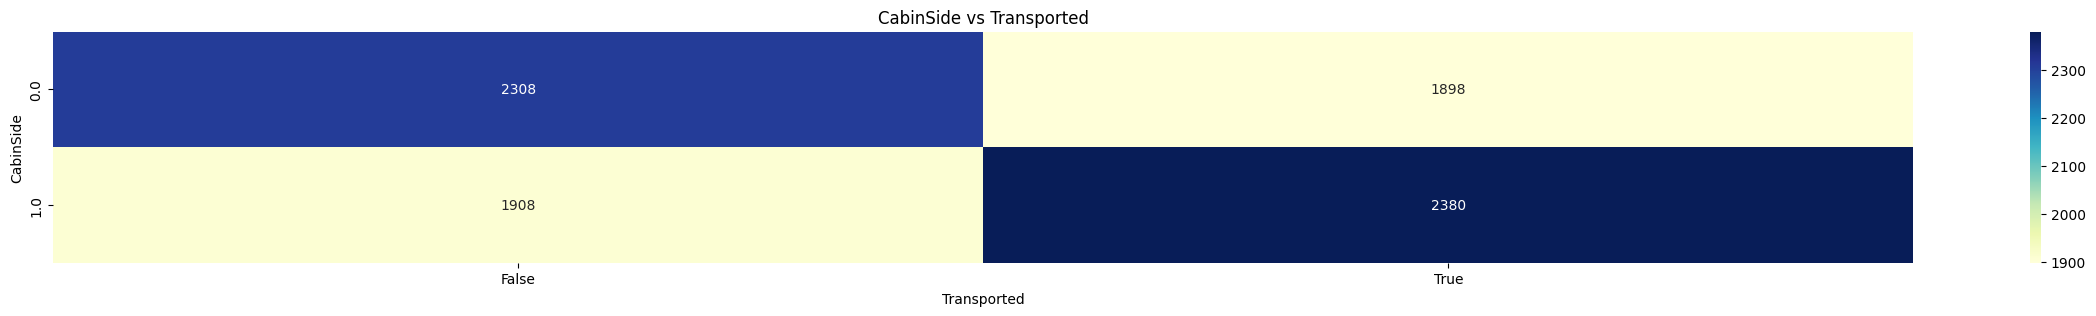

In [33]:
col1 = 'CabinDeck'
col2 = 'Transported'

ct = pd.crosstab(df_copy[col1], df_copy[col2])

plt.figure(figsize=(30, 5))
# Plotting
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'{col1} vs {col2}')
plt.show()

col1 = 'CabinSide'
col2 = 'Transported'

plt.figure(figsize=(30, 3))
ct = pd.crosstab(df_copy[col1], df_copy[col2])

# Plotting
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'{col1} vs {col2}')
plt.show()

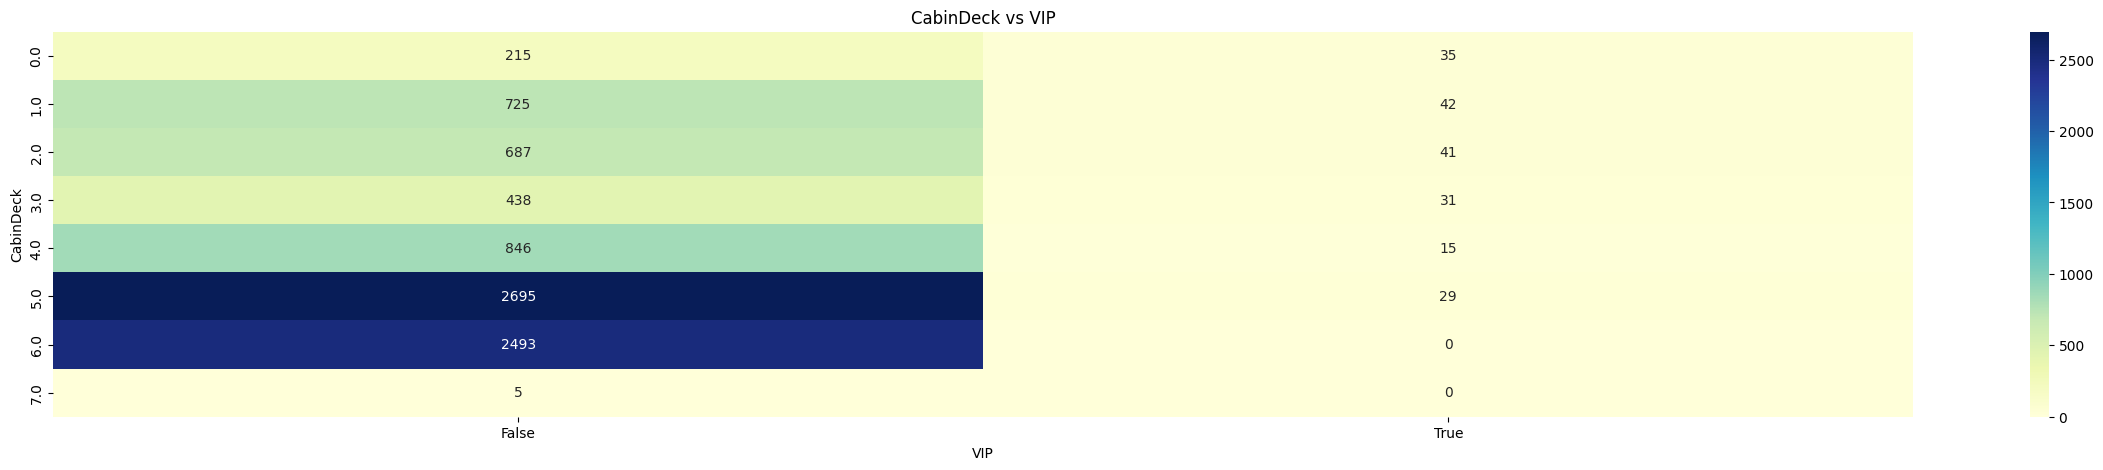

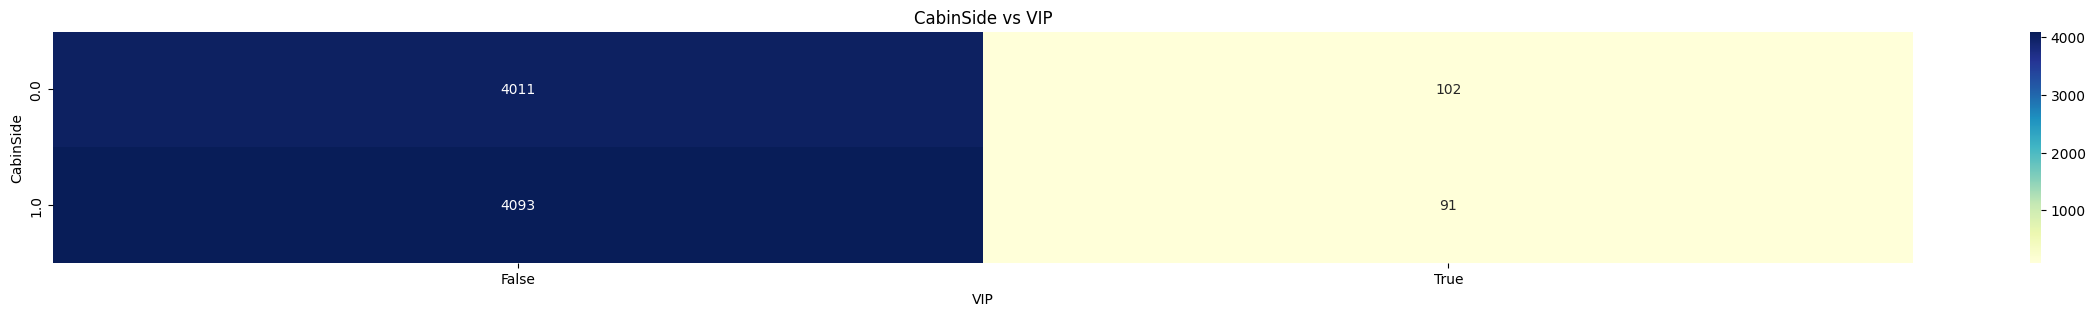

In [34]:
col1 = 'CabinDeck'
col2 = 'VIP'

ct = pd.crosstab(df_copy[col1], df_copy[col2])

plt.figure(figsize=(30, 5))
# Plotting
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'{col1} vs {col2}')
plt.show()

col1 = 'CabinSide'
col2 = 'VIP'

plt.figure(figsize=(30, 3))
ct = pd.crosstab(df_copy[col1], df_copy[col2])

# Plotting
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'{col1} vs {col2}')
plt.show()

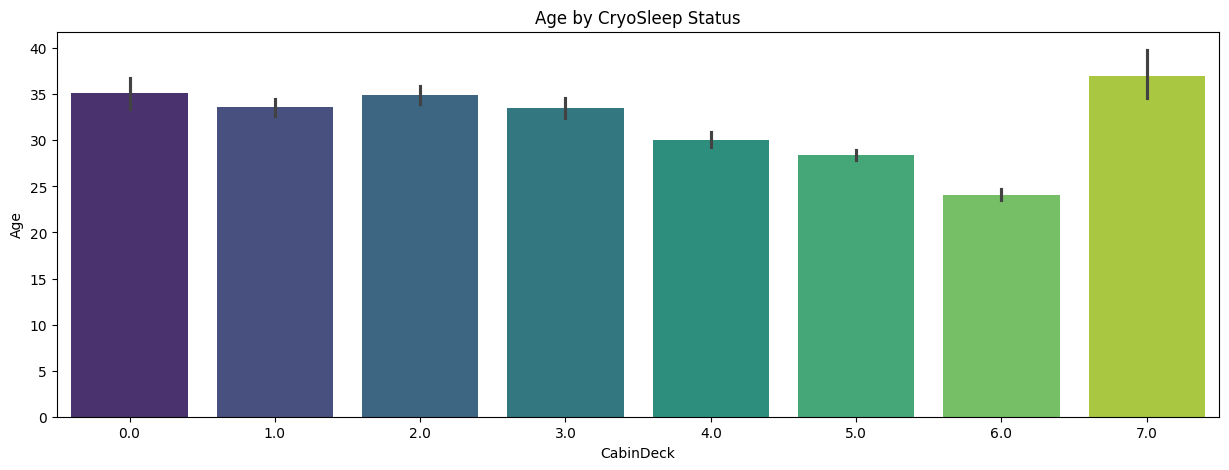

In [35]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df_copy, x='CabinDeck', y='Age', palette='viridis')

plt.title('Age by CryoSleep Status')
plt.show()

## VIP

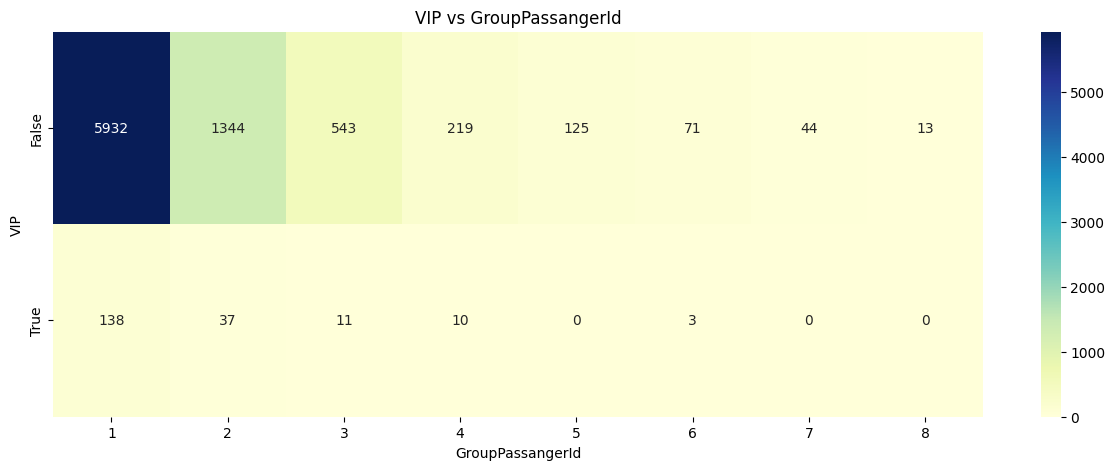

In [36]:
col1 = 'VIP'
col2 = 'GroupPassangerId'

ct = pd.crosstab(df_copy[col1], df_copy[col2])

plt.figure(figsize=(15, 5))
# Plotting
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'{col1} vs {col2}')
plt.show()

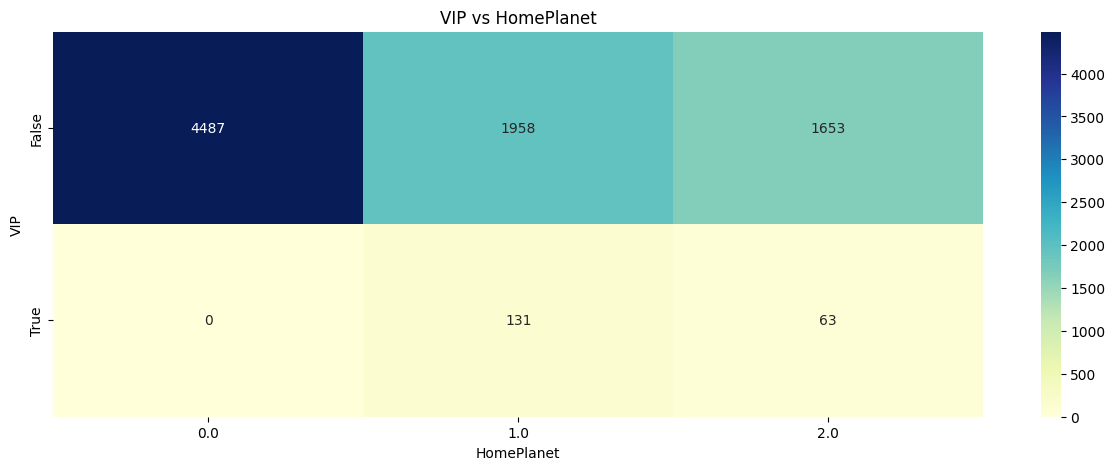

In [37]:
col1 = 'VIP'
col2 = 'HomePlanet'

ct = pd.crosstab(df_copy[col1], df_copy[col2])

plt.figure(figsize=(15, 5))
# Plotting
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'{col1} vs {col2}')
plt.show()

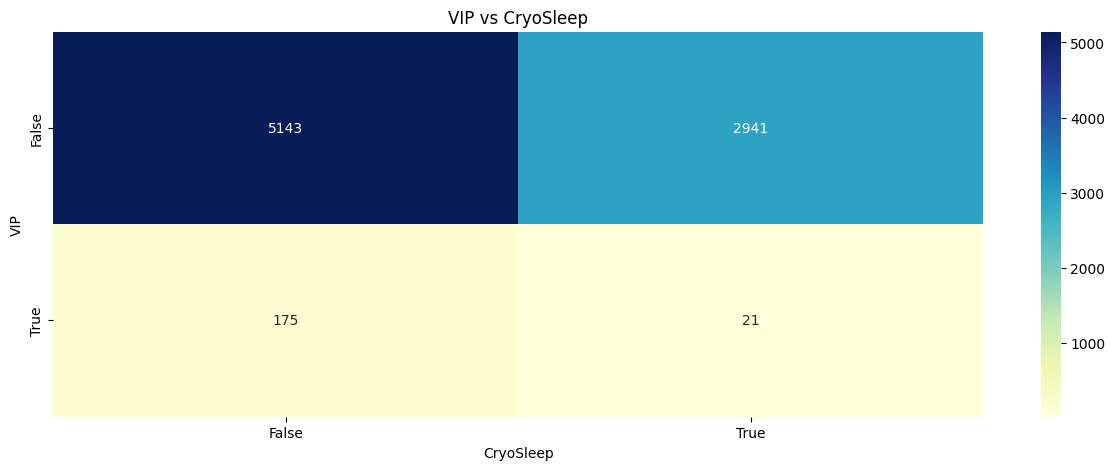

In [38]:
col1 = 'VIP'
col2 = 'CryoSleep'

ct = pd.crosstab(df_copy[col1], df_copy[col2])

plt.figure(figsize=(15, 5))
# Plotting
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'{col1} vs {col2}')
plt.show()

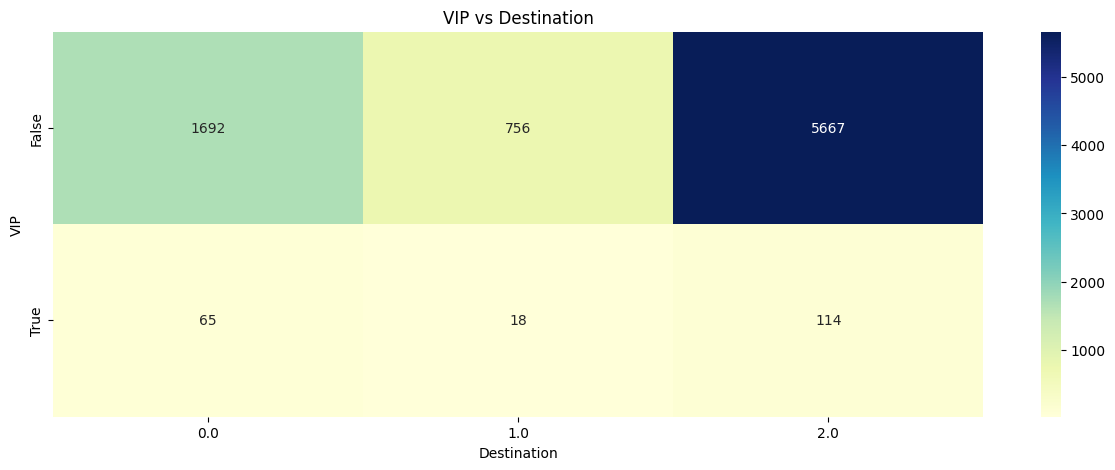

In [39]:
col1 = 'VIP'
col2 = 'Destination'

ct = pd.crosstab(df_copy[col1], df_copy[col2])

plt.figure(figsize=(15, 5))
# Plotting
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'{col1} vs {col2}')
plt.show()

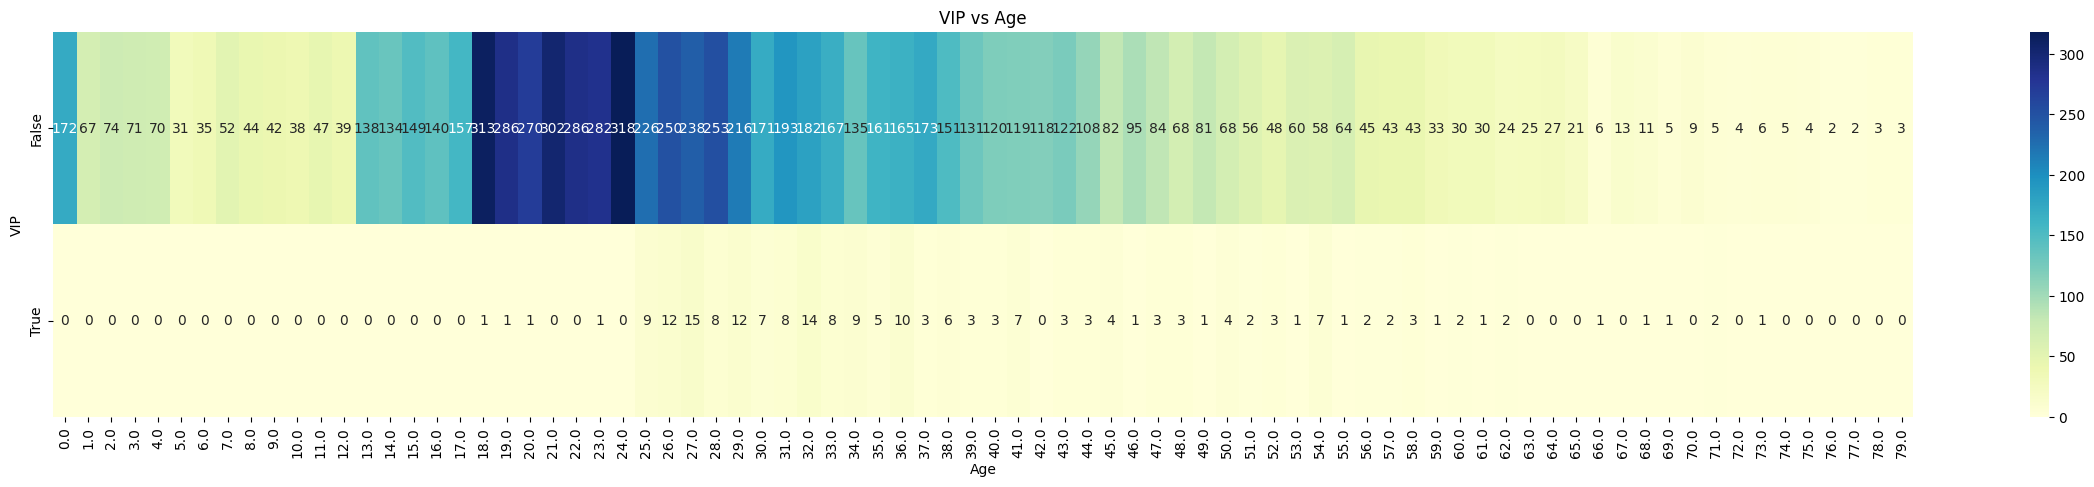

In [40]:
col1 = 'VIP'
col2 = 'Age'

ct = pd.crosstab(df_copy[col1], df_copy[col2])

plt.figure(figsize=(30, 5))
# Plotting
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'{col1} vs {col2}')
plt.show()

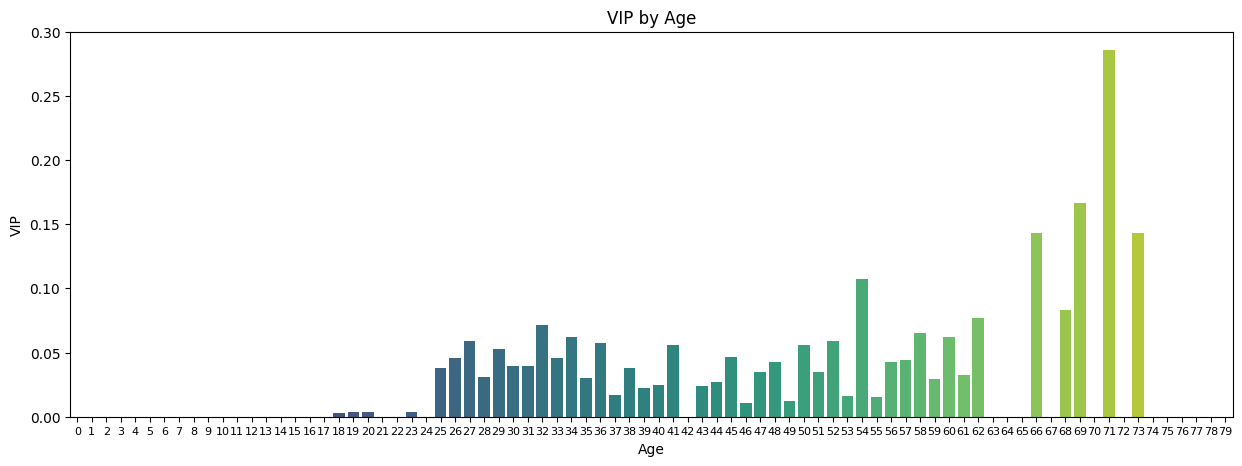

In [41]:
# Create a new dataframe dropping rows where Age is missing
df_clean = df_copy.dropna(subset=['Age']).copy()

# Convert Age to integer (required for the range() function in your plot)
df_clean['Age'] = df_clean['Age'].astype(int)

age_min = df_clean['Age'].min()
age_max = df_clean['Age'].max()
age_list = list(range(age_min, age_max + 1))

plt.figure(figsize=(15, 5))
sns.barplot(
    data=df_clean, 
    x='Age', 
    y='VIP', 
    palette='viridis', 
    legend=False, 
    errorbar=None
)

plt.xticks(ticks=range(len(age_list)), labels=age_list, fontsize=8)

plt.title('VIP by Age')
plt.ylabel('VIP')
plt.show()

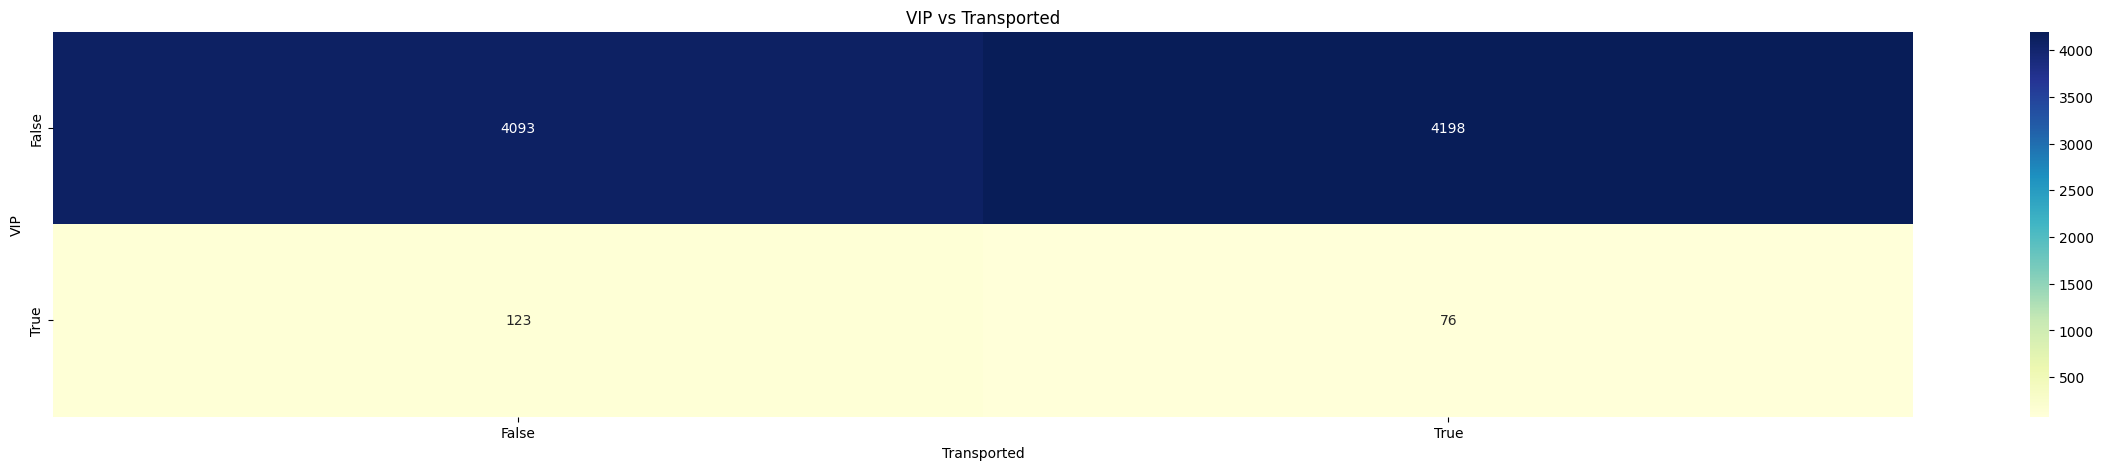

In [42]:
col1 = 'VIP'
col2 = 'Transported'

ct = pd.crosstab(df_copy[col1], df_copy[col2])

plt.figure(figsize=(30, 5))
# Plotting
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'{col1} vs {col2}')
plt.show()

## GroupId

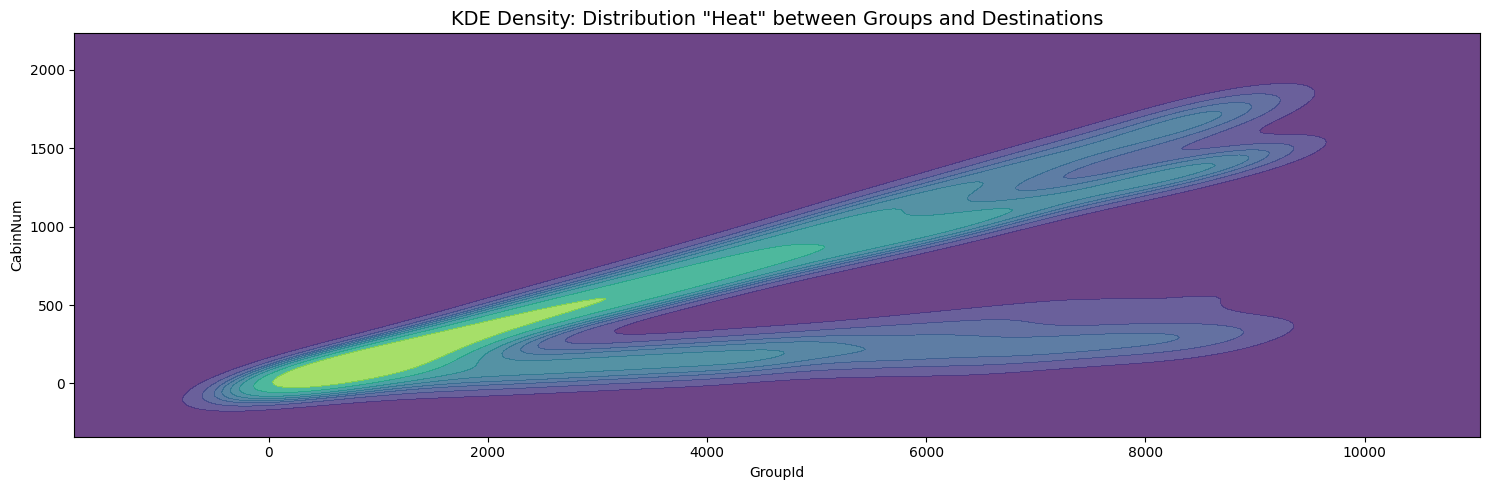

In [43]:
plt.figure(figsize=(15, 5))

sns.kdeplot(
    data=df_copy,
    x='GroupId',
    y='CabinNum',
    fill=True,
    thresh=0,
    levels=10,
    cmap='viridis',
    alpha=0.8
)
plt.title('KDE Density: Distribution "Heat" between Groups and Destinations', fontsize=14)
plt.xlabel('GroupId')

plt.tight_layout()
plt.show()

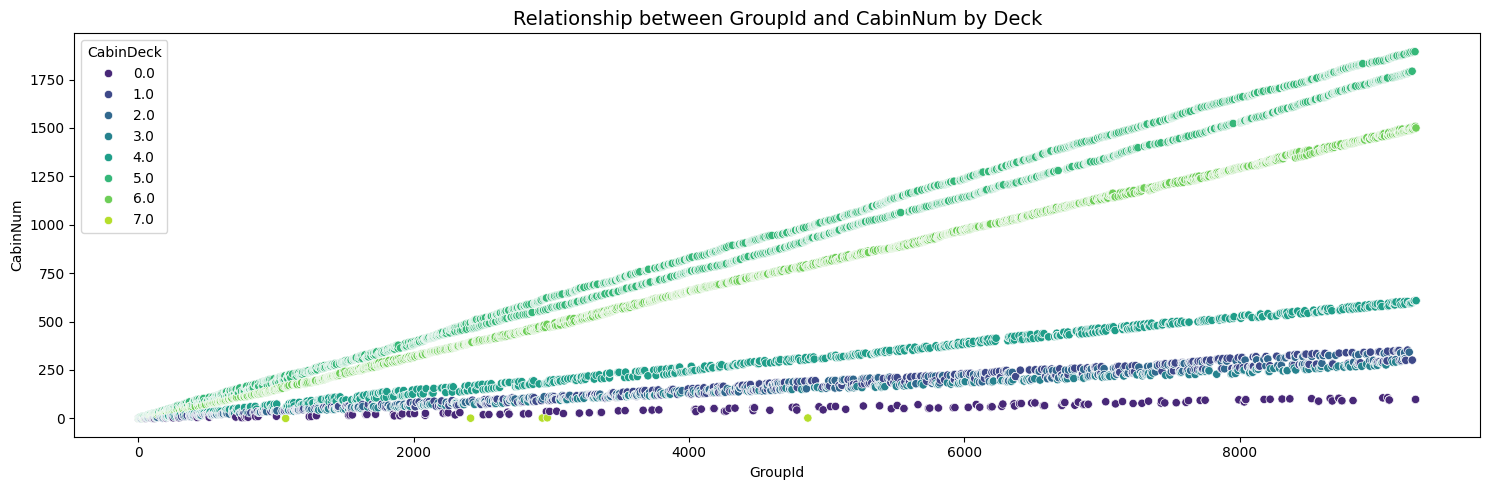

In [44]:
plt.figure(figsize=(15, 5))

sns.scatterplot(
    data=df_copy,
    x='GroupId',
    y='CabinNum',
    hue=df_copy['CabinDeck'].astype('category'),
    palette='viridis'  # Changed from cmap to palette
)

plt.title('Relationship between GroupId and CabinNum by Deck', fontsize=14)
plt.xlabel('GroupId')

plt.tight_layout()
plt.show()

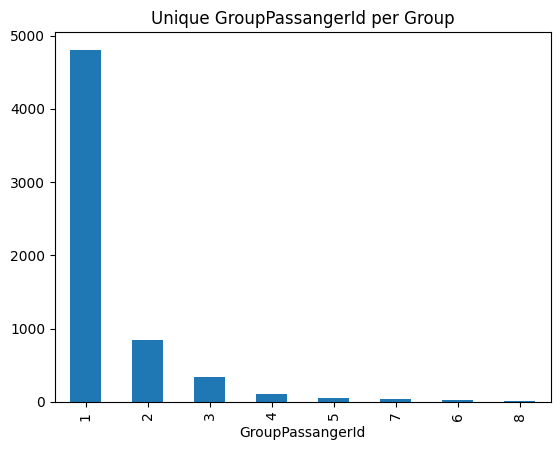

In [45]:
group_hp_counts = df_copy.dropna(subset=['GroupPassangerId']).groupby('GroupId')['GroupPassangerId'].nunique()
group_hp_counts.value_counts().plot(kind='bar', title="Unique GroupPassangerId per Group")
plt.show()

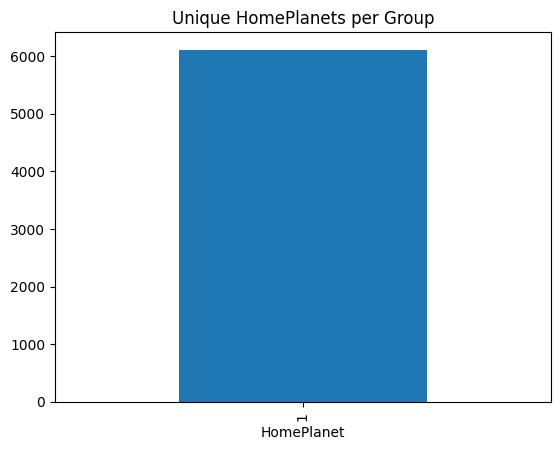

In [46]:
group_hp_counts = df_copy.dropna(subset=['HomePlanet']).groupby('GroupId')['HomePlanet'].nunique()
group_hp_counts.value_counts().plot(kind='bar', title="Unique HomePlanets per Group")
plt.show()

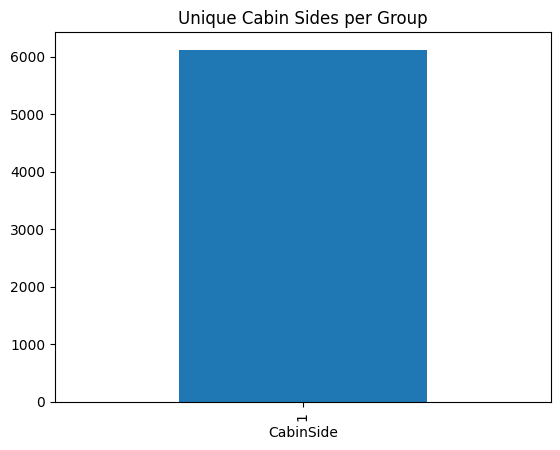

In [47]:
group_side_counts = df_copy.dropna(subset=['CabinSide']).groupby('GroupId')['CabinSide'].nunique()
group_side_counts.value_counts().plot(kind='bar', title="Unique Cabin Sides per Group")
plt.show()

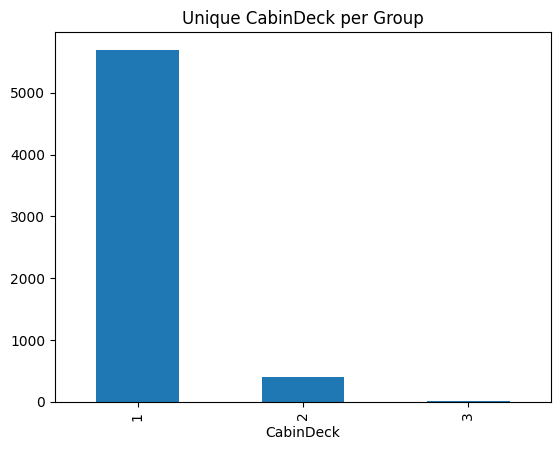

In [48]:
group_side_counts = df_copy.dropna(subset=['CabinDeck']).groupby('GroupId')['CabinDeck'].nunique()
group_side_counts.value_counts().plot(kind='bar', title="Unique CabinDeck per Group")
plt.show()

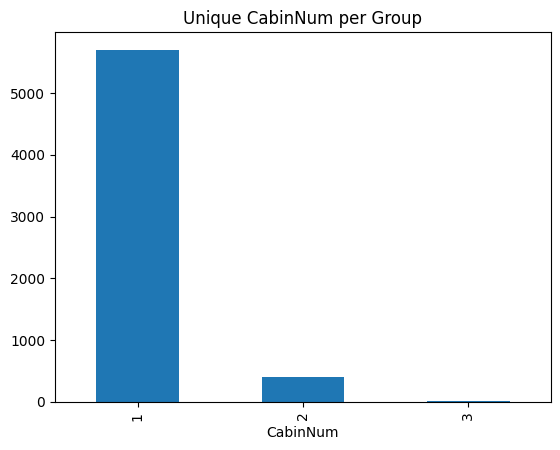

In [49]:
group_side_counts = df_copy.dropna(subset=['CabinNum']).groupby('GroupId')['CabinNum'].nunique()
group_side_counts.value_counts().plot(kind='bar', title="Unique CabinNum per Group")
plt.show()

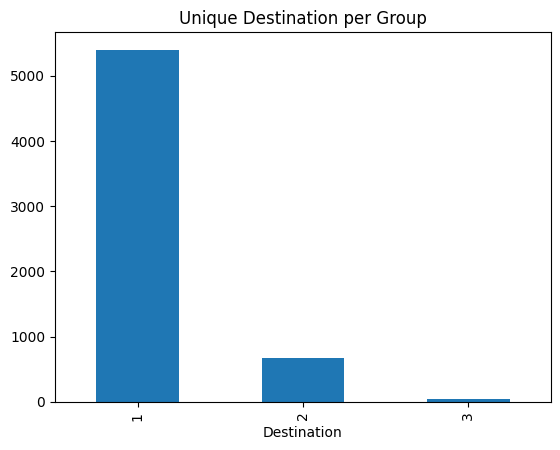

In [50]:
group_side_counts = df_copy.dropna(subset=['Destination']).groupby('GroupId')['Destination'].nunique()
group_side_counts.value_counts().plot(kind='bar', title="Unique Destination per Group")
plt.show()

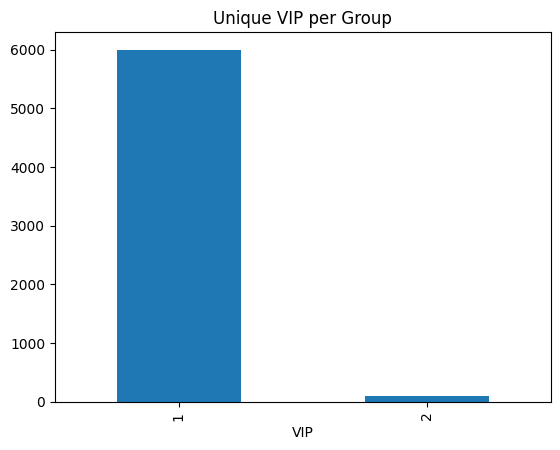

In [51]:
group_side_counts = df_copy.dropna(subset=['VIP']).groupby('GroupId')['VIP'].nunique()
group_side_counts.value_counts().plot(kind='bar', title="Unique VIP per Group")
plt.show()

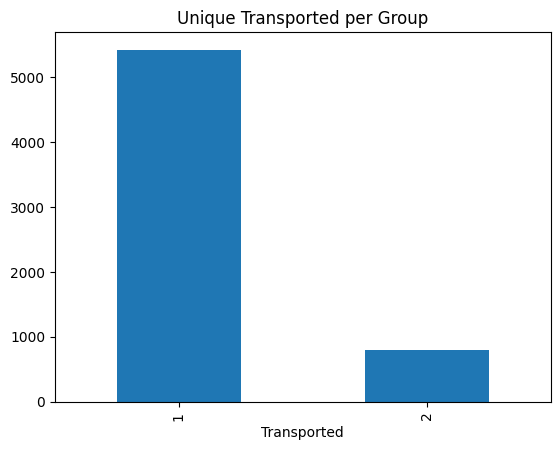

In [52]:
group_side_counts = df_copy.dropna(subset=['Transported']).groupby('GroupId')['Transported'].nunique()
group_side_counts.value_counts().plot(kind='bar', title="Unique Transported per Group")
plt.show()

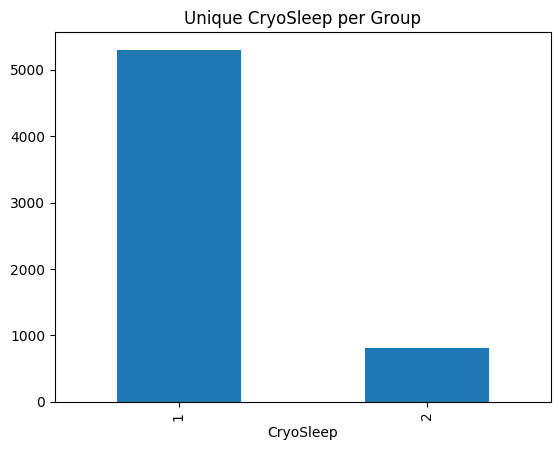

In [53]:
group_side_counts = df_copy.dropna(subset=['CryoSleep']).groupby('GroupId')['CryoSleep'].nunique()
group_side_counts.value_counts().plot(kind='bar', title="Unique CryoSleep per Group")
plt.show()

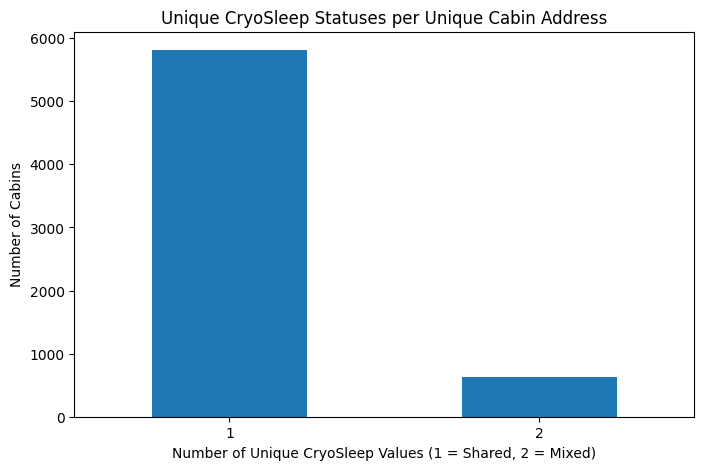

In [54]:
# 1. Group by the full cabin address and count unique CryoSleep values
cabin_cryo_counts = df_copy.dropna(subset=['CryoSleep']).groupby(
    ['CabinDeck', 'CabinNum', 'CabinSide']
)['CryoSleep'].nunique()

# 2. Plot the distribution of these counts
plt.figure(figsize=(8, 5))
cabin_cryo_counts.value_counts().plot(kind='bar')

plt.title("Unique CryoSleep Statuses per Unique Cabin Address")
plt.xlabel("Number of Unique CryoSleep Values (1 = Shared, 2 = Mixed)")
plt.ylabel("Number of Cabins")
plt.xticks(rotation=0)
plt.show()

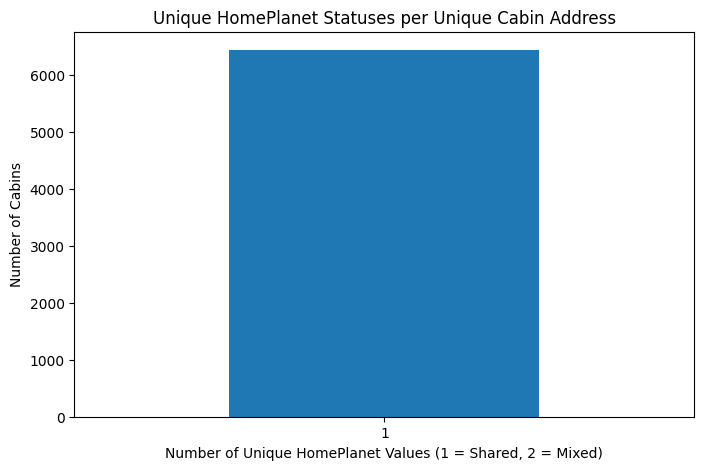

In [55]:
# 1. Group by the full cabin address and count unique CryoSleep values
cabin_cryo_counts = df_copy.dropna(subset=['HomePlanet']).groupby(
    ['CabinDeck', 'CabinNum', 'CabinSide']
)['HomePlanet'].nunique()

# 2. Plot the distribution of these counts
plt.figure(figsize=(8, 5))
cabin_cryo_counts.value_counts().plot(kind='bar')

plt.title("Unique HomePlanet Statuses per Unique Cabin Address")
plt.xlabel("Number of Unique HomePlanet Values (1 = Shared, 2 = Mixed)")
plt.ylabel("Number of Cabins")
plt.xticks(rotation=0)
plt.show()

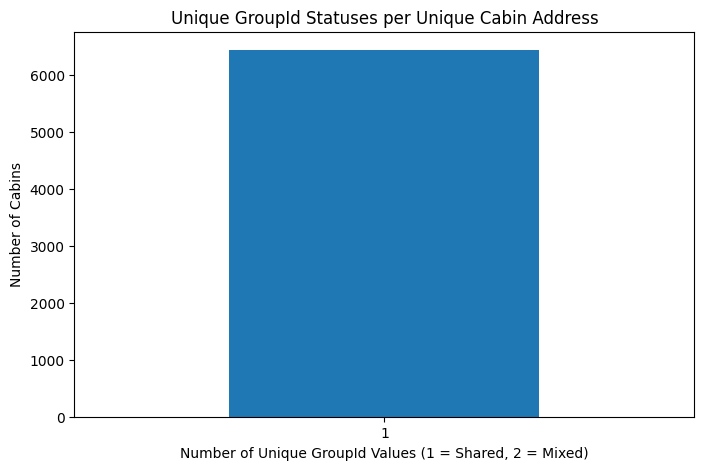

In [56]:
# 1. Group by the full cabin address and count unique CryoSleep values
cabin_cryo_counts = df_copy.dropna(subset=['HomePlanet']).groupby(
    ['CabinDeck', 'CabinNum', 'CabinSide']
)['GroupId'].nunique()

# 2. Plot the distribution of these counts
plt.figure(figsize=(8, 5))
cabin_cryo_counts.value_counts().plot(kind='bar')

plt.title("Unique GroupId Statuses per Unique Cabin Address")
plt.xlabel("Number of Unique GroupId Values (1 = Shared, 2 = Mixed)")
plt.ylabel("Number of Cabins")
plt.xticks(rotation=0)
plt.show()

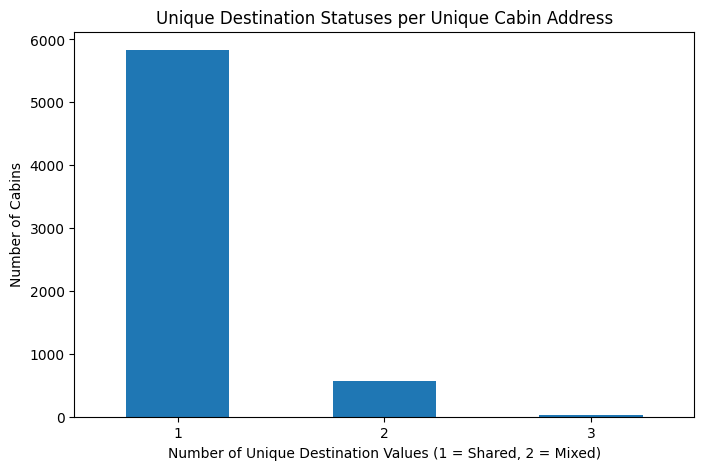

In [57]:
# 1. Group by the full cabin address and count unique CryoSleep values
cabin_cryo_counts = df_copy.dropna(subset=['Destination']).groupby(
    ['CabinDeck', 'CabinNum', 'CabinSide']
)['Destination'].nunique()

# 2. Plot the distribution of these counts
plt.figure(figsize=(8, 5))
cabin_cryo_counts.value_counts().plot(kind='bar')

plt.title("Unique Destination Statuses per Unique Cabin Address")
plt.xlabel("Number of Unique Destination Values (1 = Shared, 2 = Mixed)")
plt.ylabel("Number of Cabins")
plt.xticks(rotation=0)
plt.show()

## Age

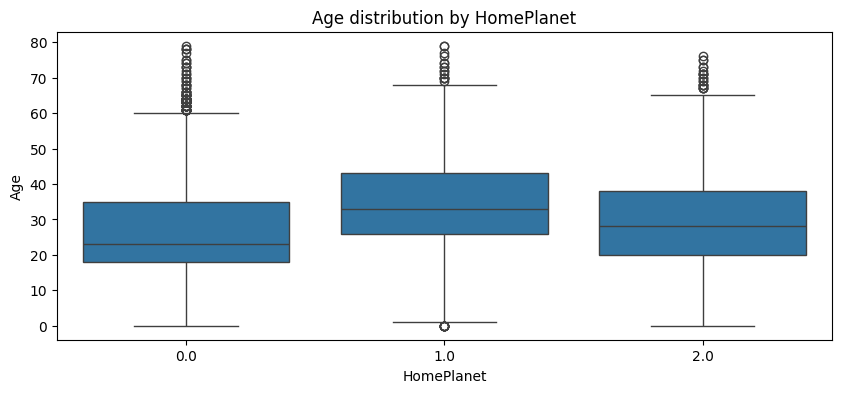

In [58]:
plt.figure(figsize=(10, 4))

sns.boxplot(
    data=df_copy,
    x='HomePlanet',
    y='Age'
)

plt.title('Age distribution by HomePlanet')
plt.show()

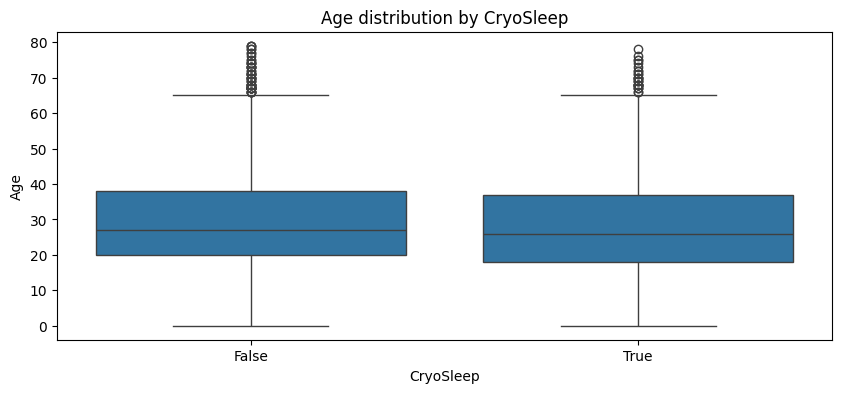

In [59]:
plt.figure(figsize=(10, 4))

sns.boxplot(
    data=df_copy,
    x='CryoSleep',
    y='Age'
)

plt.title('Age distribution by CryoSleep')
plt.show()

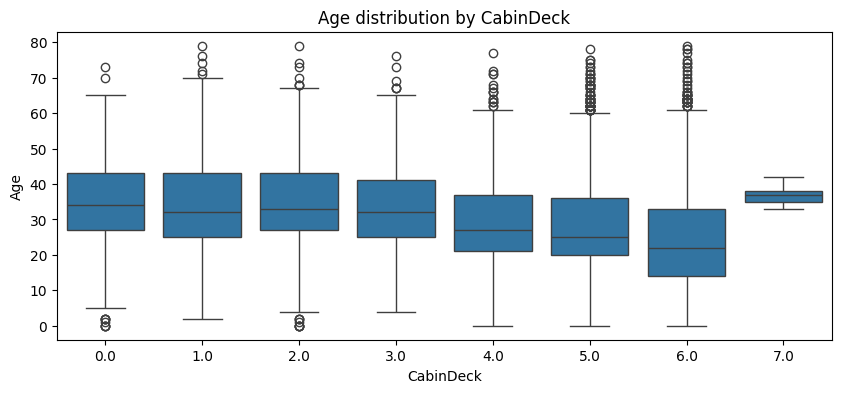

In [60]:
plt.figure(figsize=(10, 4))

sns.boxplot(
    data=df_copy,
    x='CabinDeck',
    y='Age'
)

plt.title('Age distribution by CabinDeck')
plt.show()

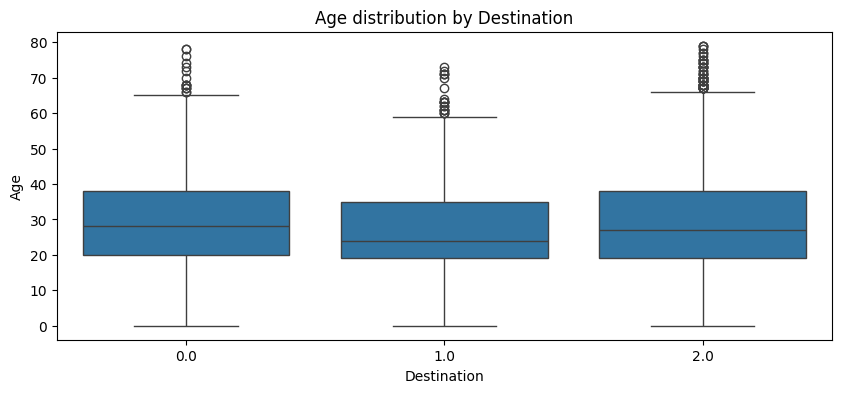

In [61]:
plt.figure(figsize=(10, 4))

sns.boxplot(
    data=df_copy,
    x='Destination',
    y='Age'
)

plt.title('Age distribution by Destination')
plt.show()

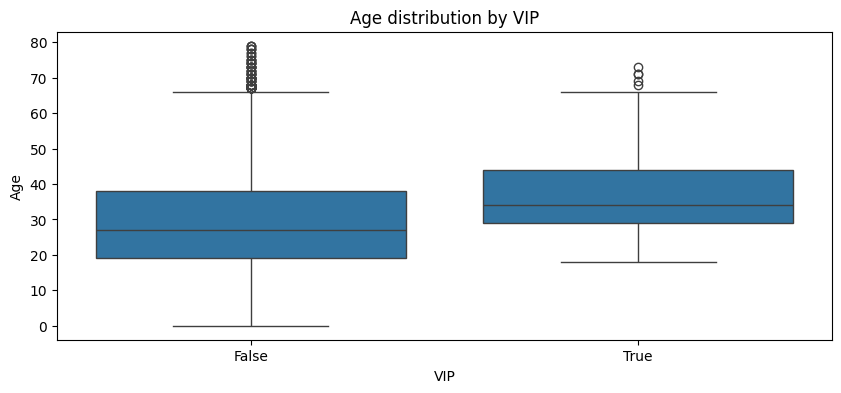

In [62]:
plt.figure(figsize=(10, 4))

sns.boxplot(
    data=df_copy,
    x='VIP',
    y='Age'
)

plt.title('Age distribution by VIP')
plt.show()

## HomePlanet

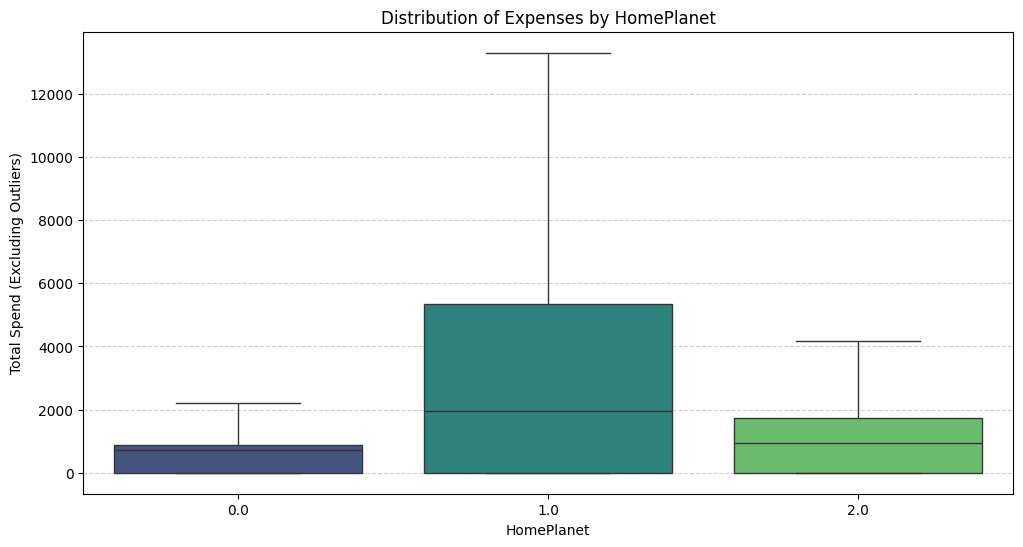

In [63]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df_clean, 
    x='HomePlanet', 
    y='Expenses', 
    palette='viridis', 
    showfliers=False  # Hides extreme spenders so you can actually see the boxes
)

plt.title('Distribution of Expenses by HomePlanet')
plt.ylabel('Total Spend (Excluding Outliers)')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

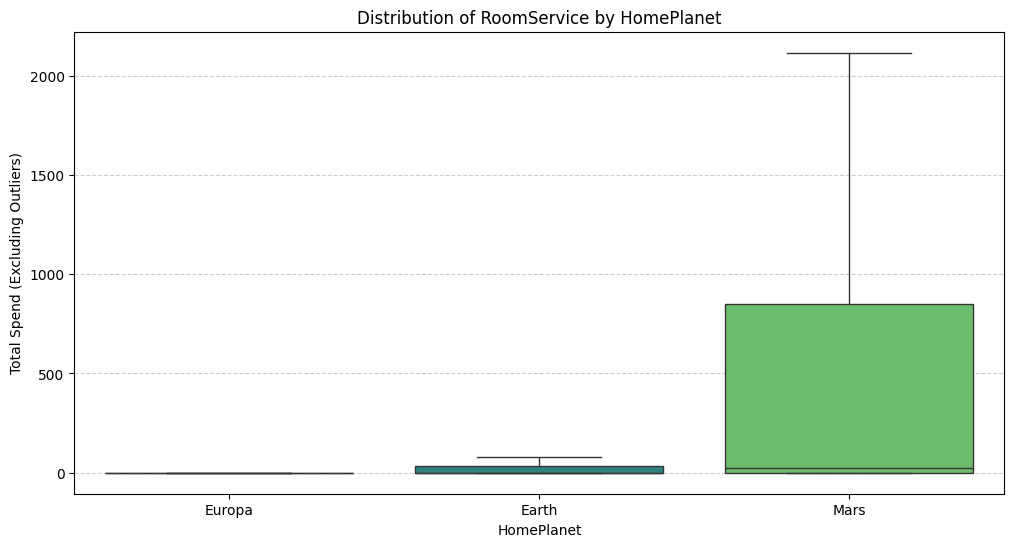

In [64]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df, 
    x='HomePlanet', 
    y='RoomService', 
    palette='viridis', 
    showfliers=False  # Hides extreme spenders so you can actually see the boxes
)

plt.title('Distribution of RoomService by HomePlanet')
plt.ylabel('Total Spend (Excluding Outliers)')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

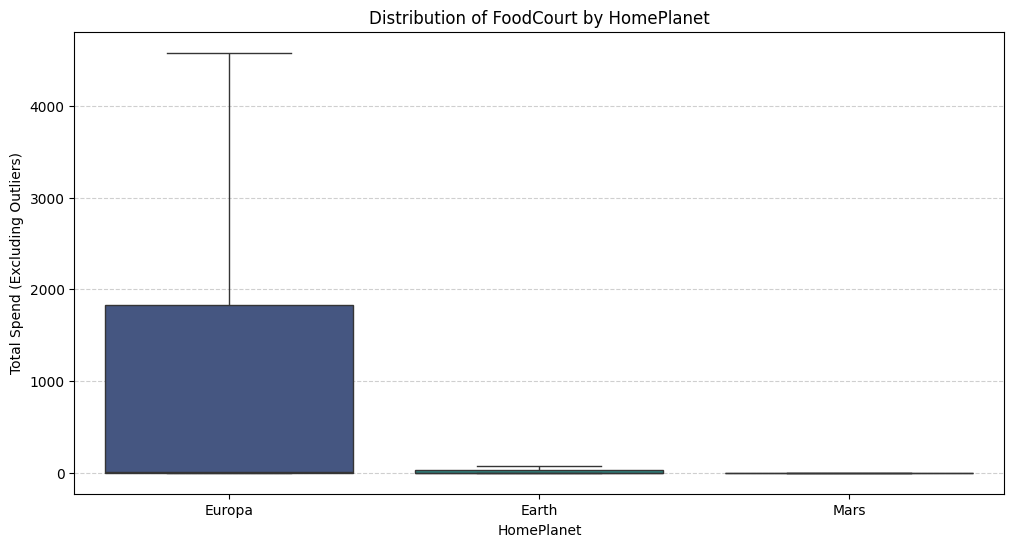

In [65]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df, 
    x='HomePlanet', 
    y='FoodCourt', 
    palette='viridis', 
    showfliers=False  # Hides extreme spenders so you can actually see the boxes
)

plt.title('Distribution of FoodCourt by HomePlanet')
plt.ylabel('Total Spend (Excluding Outliers)')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

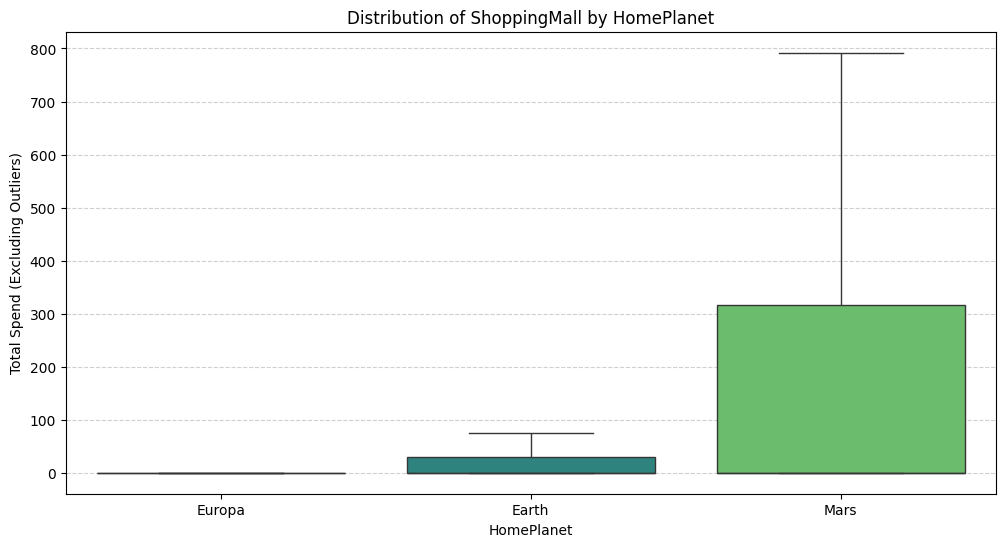

In [66]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df, 
    x='HomePlanet', 
    y='ShoppingMall', 
    palette='viridis', 
    showfliers=False  # Hides extreme spenders so you can actually see the boxes
)

plt.title('Distribution of ShoppingMall by HomePlanet')
plt.ylabel('Total Spend (Excluding Outliers)')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

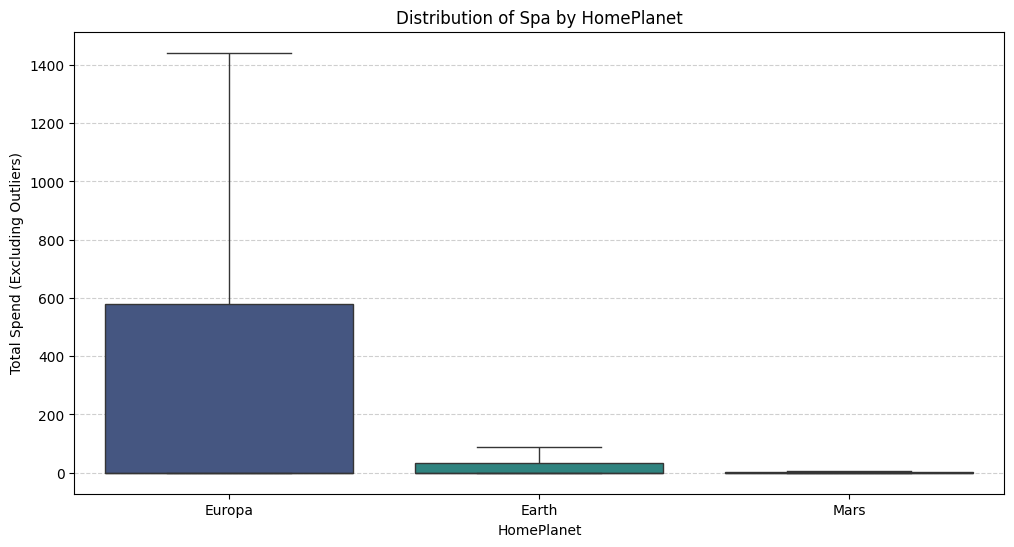

In [67]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df, 
    x='HomePlanet', 
    y='Spa', 
    palette='viridis', 
    showfliers=False  # Hides extreme spenders so you can actually see the boxes
)

plt.title('Distribution of Spa by HomePlanet')
plt.ylabel('Total Spend (Excluding Outliers)')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

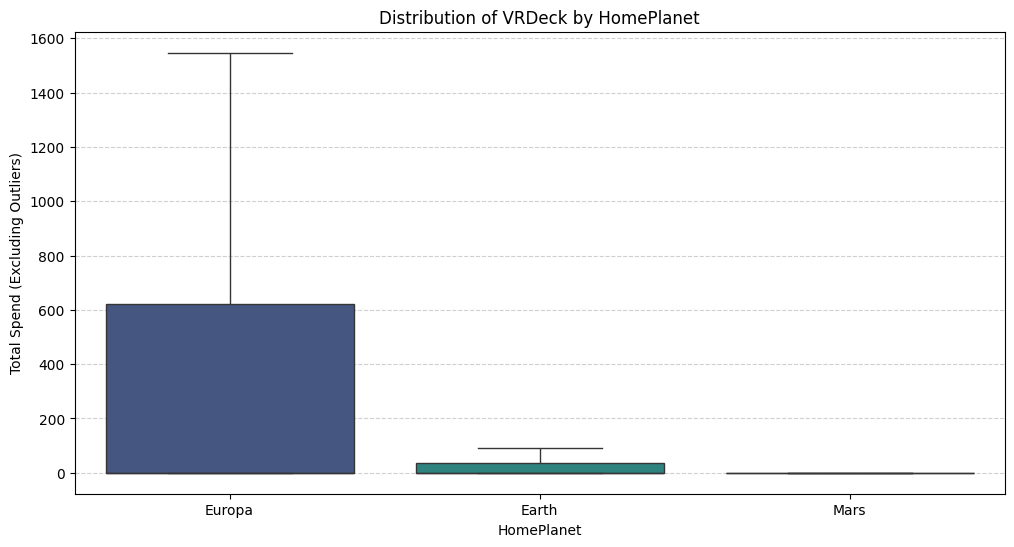

In [68]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df, 
    x='HomePlanet', 
    y='VRDeck', 
    palette='viridis', 
    showfliers=False  # Hides extreme spenders so you can actually see the boxes
)

plt.title('Distribution of VRDeck by HomePlanet')
plt.ylabel('Total Spend (Excluding Outliers)')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

# Filling the missing data

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [70]:
deck_map = {
    "A": 0,
    "B": 1,
    "C": 2,
    "D": 3,
    "E": 4,
    "F": 5,
    "G": 6,
    "T": 7
}

destination_map = {
    "55 Cancri e": 0,
    "PSO J318.5-22": 1,
    "TRAPPIST-1e": 2
}

side_map = {
    "P": 0,  # Port
    "S": 1   # Starboard
}

df_filled = df.copy()
cabin_split = df_filled["Cabin"].str.split("/", expand=True)
id_split = df_filled['PassengerId'].str.split("_", expand=True)

df_filled.drop(columns=['PassengerId', 'Cabin'], inplace=True)

df_filled["GroupId"] = id_split[0].astype(int)
df_filled["GroupPassangerId"] = id_split[1].astype(int)

df_filled["CabinDeck"] = cabin_split[0].map(deck_map).astype('Int64')
df_filled["CabinNum"]  = cabin_split[1].astype('Int64')
df_filled["CabinSide"] = cabin_split[2].map(side_map).astype('Int64')

df_filled["Destination"] = df_filled["Destination"].map(destination_map).astype('Int64')

## Filling with 100% Accuracy

### Expenses

In [71]:
# 1. Define your expense columns
expense_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

remaining_nans = df_filled[df_filled['CryoSleep'] == True][expense_cols].isna().sum()
print("Expenses NaN for passanges in CryoSleep will be filled with 0:")
print(remaining_nans)

# 2. Apply the rule: 
# WHERE CryoSleep is True, fill NaNs in expense columns with 0
df_filled.loc[df_filled['CryoSleep'] == True, expense_cols] = df_filled.loc[df_filled['CryoSleep'] == True, expense_cols].fillna(0)

Expenses NaN for passanges in CryoSleep will be filled with 0:
RoomService     68
FoodCourt       70
ShoppingMall    96
Spa             65
VRDeck          62
dtype: int64


In [72]:
# 1. Define your expense columns (if not already defined in this cell)
expense_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# 2. Check how many NaNs exist for kids (< 13) BEFORE filling
nans_to_fill_kids = df_filled[df_filled['Age'] < 13][expense_cols].isna().sum()
print("Expenses NaN for kids (< 13) that will be filled with 0:")
print(nans_to_fill_kids)

# 3. Apply the rule: 
# WHERE Age < 13, fill NaNs in expense columns with 0
df_filled.loc[df_filled['Age'] < 13, expense_cols] = df_filled.loc[df_filled['Age'] < 13, expense_cols].fillna(0)

Expenses NaN for kids (< 13) that will be filled with 0:
RoomService      6
FoodCourt        7
ShoppingMall     9
Spa              4
VRDeck          19
dtype: int64


### HomePlanet

In [73]:
# Create the list of decks you are interested in
target_decks = [0, 1, 2, 6, 7]

# Filter using .isin()
missing_planets_check = df_filled[(df_filled['HomePlanet'].isna()) & (df_filled['CabinDeck'].isin(target_decks))]

print('Missing HomePlanets to be filled using CabinDeck:', len(missing_planets_check))

# 1. Fill 'Earth' for Deck 6
# Logic: If CabinDeck is 6 AND HomePlanet is NaN
df_filled.loc[(df_filled['CabinDeck'] == 6) & (df_filled['HomePlanet'].isna()), 'HomePlanet'] = 'Earth'

europa_decks = [0, 1, 2, 7]
df_filled.loc[(df_filled['CabinDeck'].isin(europa_decks)) & (df_filled['HomePlanet'].isna()), 'HomePlanet'] = 'Europa'

Missing HomePlanets to be filled using CabinDeck: 92


### CryoSleep

In [74]:
print('NaNs to be filled in CryoSleep using CabinDeck=7:', len(df_filled[(df_filled['CryoSleep'].isna()) & (df_filled['CabinDeck'] == (7))]))
df_filled.loc[(df_filled['CabinDeck'] == 7) & (df_filled['CryoSleep'].isna()), 'CryoSleep'] = False

NaNs to be filled in CryoSleep using CabinDeck=7: 1


### CabinSide

In [75]:
target_ages = [75, 77]
mask = (df_filled['CabinSide'].isna()) & (df_filled['Age'].isin(target_ages))

print(f'NaNs to be filled in CabinSide using Age={target_ages}:', mask.sum())

df_filled.loc[(df_filled['Age'] == (75 or 77)) & (df_filled['CabinSide'].isna()), 'CabinSide'] = 0

NaNs to be filled in CabinSide using Age=[75, 77]: 1


In [76]:
# 1. Map each groupId to the first non-null HomePlanet found in that group
group_home_mapping = df_filled.groupby('GroupId')['CabinSide'].first()

# 2. Identify rows where HomePlanet is NaN
is_na = df_filled['CabinSide'].isna()

# 3. Identify if their groupId has a known HomePlanet available
has_group_info = df_filled['GroupId'].map(group_home_mapping).notna()

# 4. Combine: Person is NaN BUT group has info
recoverable_df = df_filled[is_na & has_group_info]

print(f"Number of people with missing CabinSide that can be recovered: {len(recoverable_df)}")

df_filled.loc[is_na, 'CabinSide'] = df_filled.loc[is_na, 'GroupId'].map(group_home_mapping)

Number of people with missing CabinSide that can be recovered: 100


### VIP

In [77]:
print('NaNs to be filled in VIP using CabinDeck=(6 or 7):', len(df_filled[(df_filled['VIP'].isna()) & (df_filled['CabinDeck'] == (6 or 7))]))
df_filled.loc[(df_filled['CabinDeck'] == (6 or 7)) & (df_filled['VIP'].isna()), 'VIP'] = 'False'

NaNs to be filled in VIP using CabinDeck=(6 or 7): 66


In [78]:
print(len(df_filled[(df_filled['VIP'].isna()) & (df_filled['HomePlanet'] == 'Earth')]))
df_filled.loc[(df_filled['HomePlanet'] == 'Earth') & (df_filled['VIP'].isna()), 'VIP'] = 'False'

50


In [79]:
target_ages = [21, 22, 24, 42, 63, 64, 65, 67, 70, 72, 74, 75, 76, 77, 78, 79]
mask = (df_filled['VIP'].isna()) & ((df_filled['Age'] < 18) | (df_filled['Age'].isin(target_ages)))
print(len(df_filled[mask]))
df_filled.loc[mask, 'VIP'] = False

21


In [80]:
target_ids = [5, 7, 8]

mask = (df_filled['GroupPassangerId'].isin(target_ids)) & (df_filled['VIP'].isna())
print(f"Number of people with missing VIP that can be recovered {mask.sum()}")

df_filled.loc[mask, 'VIP'] = False

Number of people with missing VIP that can be recovered 1


### HomePlanet

In [81]:
# 1. Map each groupId to the first non-null HomePlanet found in that group
group_home_mapping = df_filled.groupby('GroupId')['HomePlanet'].first()

# 2. Identify rows where HomePlanet is NaN
is_na = df_filled['HomePlanet'].isna()

# 3. Identify if their groupId has a known HomePlanet available
has_group_info = df_filled['GroupId'].map(group_home_mapping).notna()

# 4. Combine: Person is NaN BUT group has info
recoverable_df = df_filled[is_na & has_group_info]

print(f"Number of people with missing HomePlanet that can be recovered: {len(recoverable_df)}")

df_filled.loc[is_na, 'HomePlanet'] = df_filled.loc[is_na, 'GroupId'].map(group_home_mapping)

Number of people with missing HomePlanet that can be recovered: 46


In [82]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HomePlanet        8630 non-null   object 
 1   CryoSleep         8477 non-null   object 
 2   Destination       8511 non-null   Int64  
 3   Age               8514 non-null   float64
 4   VIP               8628 non-null   object 
 5   RoomService       8586 non-null   float64
 6   FoodCourt         8587 non-null   float64
 7   ShoppingMall      8590 non-null   float64
 8   Spa               8579 non-null   float64
 9   VRDeck            8586 non-null   float64
 10  Name              8493 non-null   object 
 11  Transported       8693 non-null   bool   
 12  GroupId           8693 non-null   int64  
 13  GroupPassangerId  8693 non-null   int64  
 14  CabinDeck         8494 non-null   Int64  
 15  CabinNum          8494 non-null   Int64  
 16  CabinSide         8595 non-null   Int64  


## Filling the rest with lesser Accuracy

### VIP

In [83]:
# Filling VIP with False
df_filled.loc[df_filled['VIP'].isna(), 'VIP'] = False

### Age

In [84]:
def fill_age_logic(row):
    if pd.notna(row['Age']):
        return row['Age']
    
    # Collect all available mean ages for the attributes this person has
    relevant_means = []
    for cat in categories:
        val = row[cat]
        if pd.notna(val) and val in lookups[cat]:
            relevant_means.append(lookups[cat][val])
    
    # If we found any matches, return the average of those means
    if relevant_means:
        return round(np.mean(relevant_means))
    
    # Fallback: if they have NO attributes, use the global average
    return round(df_copy['Age'].mean())

In [85]:
categories = ['VIP', 'HomePlanet', 'CryoSleep', 'CabinDeck', 'Destination']
lookups = {}

# Use .mean() or .median() depending on your preference
for cat in categories:
    lookups[cat] = df_filled.groupby(cat)['Age'].mean()

# Example: lookups['VIP'] now contains {False: 28.6, True: 37.4}

print(f"Initial Age NaNs: {df_filled['Age'].isna().sum()}")

# Apply the logic
df_filled['Age'] = df_filled.apply(fill_age_logic, axis=1)

Initial Age NaNs: 179


### CabinNum

In [86]:
cabin_num_nan_count = df_filled[df_filled['CabinNum'].isna()]
print('Total CabinNum Missing:', len(cabin_num_nan_count))

# 1. Sort by GroupId. 
# This ensures that if Group 5 is missing data, it sits right between Group 4 and Group 6.
df_filled = df_filled.sort_values(by='GroupId')

# 2. Interpolate globally (NO groupby).
# Since we are sorted by GroupId, the 'neighbors' in the dataframe 
# are now the people with the closest GroupIds to the missing row.
df_filled['CabinNum'] = df_filled['CabinNum'].interpolate(method='linear', limit_direction='both')

# 3. Round to whole numbers
df_filled['CabinNum'] = df_filled['CabinNum'].round().astype('Int64')

# Check results
cabin_num_nan_count = df_filled[df_filled['CabinNum'].isna()]
print('Total CabinNum Missing after global interpolation:', len(cabin_num_nan_count))

Total CabinNum Missing: 199
Total CabinNum Missing after global interpolation: 0


### Expenses

In [87]:
df_filled.loc[df_filled['RoomService'].isna(), 'RoomService'] = 0
df_filled.loc[df_filled['FoodCourt'].isna(), 'FoodCourt'] = 0
df_filled.loc[df_filled['ShoppingMall'].isna(), 'ShoppingMall'] = 0
df_filled.loc[df_filled['Spa'].isna(), 'Spa'] = 0
df_filled.loc[df_filled['VRDeck'].isna(), 'VRDeck'] = 0

### CryoSleep

In [88]:
# 1. Map each groupId to the first non-null HomePlanet found in that group
group_home_mapping = df_filled.groupby('GroupId')['CryoSleep'].first()

# 2. Identify rows where HomePlanet is NaN
is_na = df_filled['CryoSleep'].isna()

# 3. Identify if their groupId has a known HomePlanet available
has_group_info = df_filled['GroupId'].map(group_home_mapping).notna()

# 4. Combine: Person is NaN BUT group has info
recoverable_df = df_filled[is_na & has_group_info]

print(f"Number of people with missing CryoSleep that can be recovered: {len(recoverable_df)}")

df_filled.loc[is_na, 'CryoSleep'] = df_filled.loc[is_na, 'GroupId'].map(group_home_mapping)

Number of people with missing CryoSleep that can be recovered: 108


### Dropping the Name Column

In [89]:
df_filled = df_filled.drop(columns=['Name'])

### NaN Check

In [90]:
# 1. Create the base frame with counts
nan_report = df_filled.isna().sum().to_frame('Num_NaN')

# 2. Add a column for Percentage
nan_report['Percent'] = (nan_report['Num_NaN'] / len(df_filled)) * 100

# 3. Add a column for Total Rows (optional, just for reference)
nan_report['Total_Rows'] = len(df_filled)

# 4. Filter to show ONLY columns that actually have missing data (optional cleanup)
nan_report = nan_report[nan_report['Num_NaN'] > 0].sort_values('Num_NaN', ascending=False)

print(nan_report)

             Num_NaN   Percent  Total_Rows
CabinDeck        199  2.289198        8693
Destination      182  2.093639        8693
CryoSleep        108  1.242379        8693
CabinSide         98  1.127344        8693
HomePlanet        63  0.724721        8693


In [91]:
rows_before_dropping = len(df_filled)

# List of columns you care about
cols_to_check = ['HomePlanet', 'CryoSleep', 'Destination', 'CabinDeck', 'CabinSide']

# Drop the rows and update the dataframe
df_filled = df_filled.dropna(subset=cols_to_check)

rows_after_dropping = len(df_filled)

rows_dropped = rows_before_dropping - rows_after_dropping

print(f'Rows Dropped: {rows_dropped} ({rows_dropped/len(df) * 100}%)')

Rows Dropped: 539 (6.200391119291384%)


In [92]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8154 entries, 0 to 8691
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HomePlanet        8154 non-null   object 
 1   CryoSleep         8154 non-null   object 
 2   Destination       8154 non-null   Int64  
 3   Age               8154 non-null   float64
 4   VIP               8154 non-null   object 
 5   RoomService       8154 non-null   float64
 6   FoodCourt         8154 non-null   float64
 7   ShoppingMall      8154 non-null   float64
 8   Spa               8154 non-null   float64
 9   VRDeck            8154 non-null   float64
 10  Transported       8154 non-null   bool   
 11  GroupId           8154 non-null   int64  
 12  GroupPassangerId  8154 non-null   int64  
 13  CabinDeck         8154 non-null   Int64  
 14  CabinNum          8154 non-null   Int64  
 15  CabinSide         8154 non-null   Int64  
dtypes: Int64(4), bool(1), float64(6), int64(2), obj

# Classifying The Data

In [93]:
homeplanet_map = {
    "Earth": 0,
    "Europa": 1,
    "Mars": 2
}

destination_map = {
    "55 Cancri e": 0,
    "PSO J318.5-22": 1,
    "TRAPPIST-1e": 2
}

vip_map = {
    'False': 0,
    False: 0,
    True: 1
}

cryosleep_map = {
    False: 0,
    True: 1
}

transported_map = {
    False: 0,
    True: 1
}

df_filled["HomePlanet"] = df_filled["HomePlanet"].map(homeplanet_map).astype('int64')
df_filled["CryoSleep"] = df_filled["CryoSleep"].map(cryosleep_map).astype(int)
df_filled["VIP"] = df_filled["VIP"].map(vip_map).astype(int)
df_filled["Transported"] = df_filled["Transported"].map(cryosleep_map).astype(int)

In [94]:
df_filled

HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0              1          0            2  39.0    0          0.0        0.0   
1              0          0            2  24.0    0        109.0        9.0   
2              1          0            2  58.0    1         43.0     3576.0   
3              1          0            2  33.0    0          0.0     1283.0   
4              0          0            2  16.0    0        303.0       70.0   
...          ...        ...          ...   ...  ...          ...        ...   
8688           1          0            0  41.0    1          0.0     6819.0   
8689           0          1            1  18.0    0          0.0        0.0   
8690           0          0            2  26.0    0          0.0        0.0   
8692           1          0            2  44.0    0        126.0     4688.0   
8691           1          0            0  32.0    0          0.0     1049.0   

      ShoppingMall     Spa  VRDeck  Transported  GroupId  GroupPassangerId  \
0              0.0     0.0     0.0            0        1                 1   
1             25.0   549.0    44.0            1        2                 1   
2              0.0  6715.0    49.0            0        3                 1   
3            371.0  3329.0   193.0            0        3                 2   
4            151.0   565.0     2.0            1        4                 1   
...            ...     ...     ...          ...      ...               ...   
8688           0.0  1643.0    74.0            0     9276                 1   
8689           0.0     0.0     0.0            0     9278                 1   
8690        1872.0     1.0     0.0            1     9279                 1   
8692           0.0     0.0    12.0            1     9280                 2   
8691           0.0   353.0  3235.0            0     9280                 1   

      CabinDeck  CabinNum  CabinSide  
0             1         0          0  
1             5         0          1  
2             0         0          1  
3             0         0          1  
4             5         1          1  
...         ...       ...        ...  
8688          0        98          0  
8689          6      1499          1  
8690          6      1500          1  
8692          4       608          1  
8691          4       608          1  

[8154 rows x 16 columns]

In [182]:
X = df_filled.drop(columns=['Transported']).astype('float32')
y = df_filled['Transported'].astype('float32')

## KNN

KNN Train Accuracy: 0.8150850835505136
KNN Test Accuracy: 0.7603310852237891


Text(0.5, 1.0, 'Test Confusion Matrix')

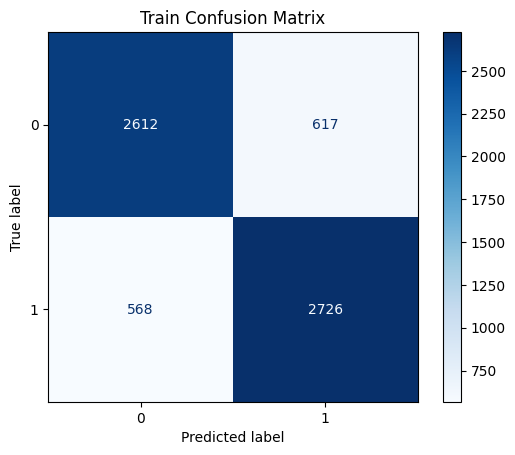

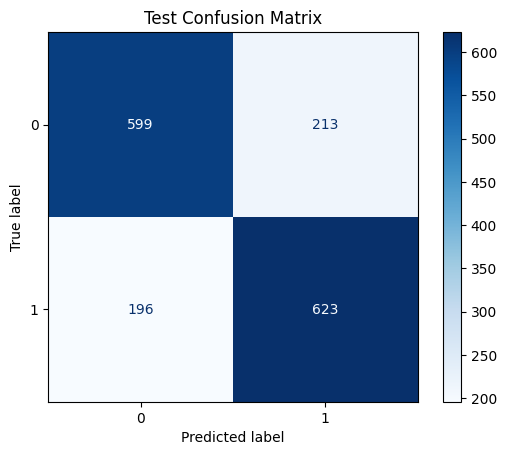

In [96]:
accuracy_arr_train = []
accuracy_arr_test = []

folds = 10

for i in range(folds):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    neigh = KNeighborsClassifier(n_neighbors=7)
    neigh.fit(X_train, y_train)
    
    # Train Metrics
    train_y_pred = neigh.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_y_pred)
    
    # Test Metrics
    test_y_pred = neigh.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_y_pred)

    accuracy_arr_train.append(train_accuracy)
    accuracy_arr_test.append(test_accuracy)

print(f"KNN Train Accuracy: {np.mean(accuracy_arr_train)}")
print(f"KNN Test Accuracy: {np.mean(accuracy_arr_test)}")

# Plotting (as per your code snippet)
confusion_mat_train = confusion_matrix(y_train, train_y_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=confusion_mat_train)
disp_train.plot(cmap=plt.cm.Blues)
plt.title('Train Confusion Matrix')

confusion_mat_test = confusion_matrix(y_test, test_y_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_mat_test)
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Test Confusion Matrix')

In [97]:
x_axis = []

accuracy_mat_train = []
accuracy_mat_test = []

folds = 10

for neighbors in range(1,11):
    
    accuracy_arr_train = []
    accuracy_arr_test = []
    
    for i in range(folds):
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
        neigh = KNeighborsClassifier(n_neighbors=neighbors)
        neigh.fit(X_train, y_train)
        
        # Train Metrics
        train_y_pred = neigh.predict(X_train)
        train_accuracy = accuracy_score(y_train, train_y_pred)
        
        # Test Metrics
        test_y_pred = neigh.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_y_pred)

        accuracy_arr_train.append(train_accuracy)
        accuracy_arr_test.append(test_accuracy)

    accuracy_mat_train.append(np.mean(accuracy_arr_train))
    accuracy_mat_test.append(np.mean(accuracy_arr_test))

    x_axis.append(neighbors)

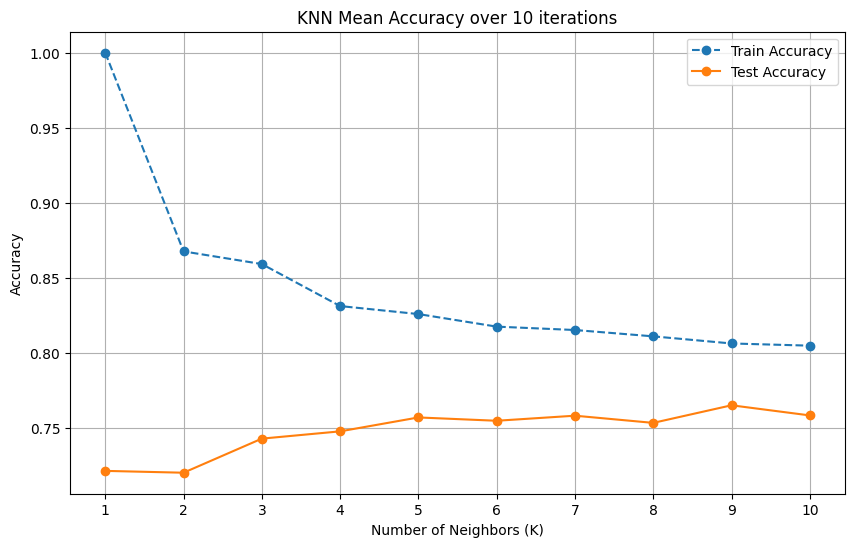

In [98]:
plt.figure(figsize=(10, 6))
plt.plot(x_axis, accuracy_mat_train, label='Train Accuracy', marker='o', linestyle='--')
plt.plot(x_axis, accuracy_mat_test, label='Test Accuracy', marker='o')

plt.title(f'KNN Mean Accuracy over {folds} iterations')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(x_axis) # כדי לראות את כל המספרים 1-10 בציר ה-X
plt.legend()
plt.grid(True)
plt.show()

## QDA

QDA Mean Train Accuracy: 0.726521539169094
QDA Mean Test Accuracy: 0.7225628448804414


Text(0.5, 1.0, 'Test Confusion Matrix - Last iteration')

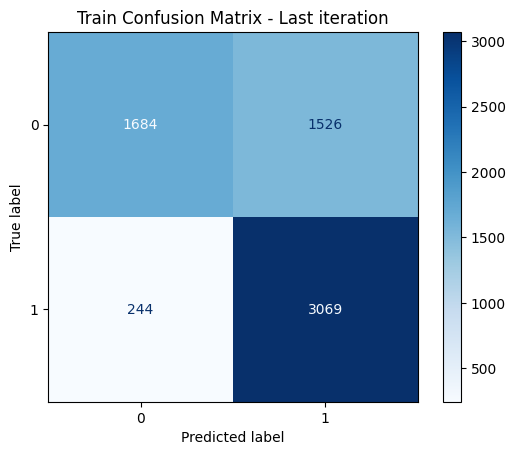

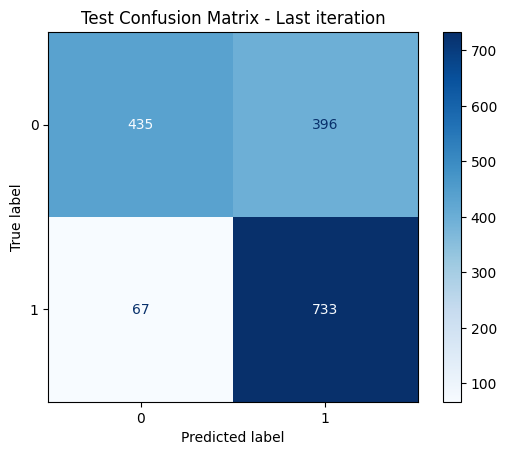

In [99]:
folds = 10

accuracy_arr_train = []
accuracy_arr_test = []

for i in range(folds):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Create and fit the sklearn model
    clf = QuadraticDiscriminantAnalysis(store_covariance=True)
    clf.fit(X_train, y_train)
    
    # Train Metrics
    train_y_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_y_pred)
    
    # Test Metrics
    test_y_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_y_pred)

    accuracy_arr_train.append(train_accuracy)
    accuracy_arr_test.append(test_accuracy)
    

print(f"QDA Mean Train Accuracy: {np.mean(accuracy_arr_train)}")
print(f"QDA Mean Test Accuracy: {np.mean(accuracy_arr_test)}")

# Plotting (as per your code snippet)
confusion_mat_train = confusion_matrix(y_train, train_y_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=confusion_mat_train)
disp_train.plot(cmap=plt.cm.Blues)
plt.title('Train Confusion Matrix - Last iteration')

confusion_mat_test = confusion_matrix(y_test, test_y_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_mat_test)
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Test Confusion Matrix - Last iteration')

## LDA

LDA Mean Train Accuracy: 0.7652920435382493
LDA Mean Test Accuracy: 0.7641937461679951


Text(0.5, 1.0, 'Test Confusion Matrix - Last iteration')

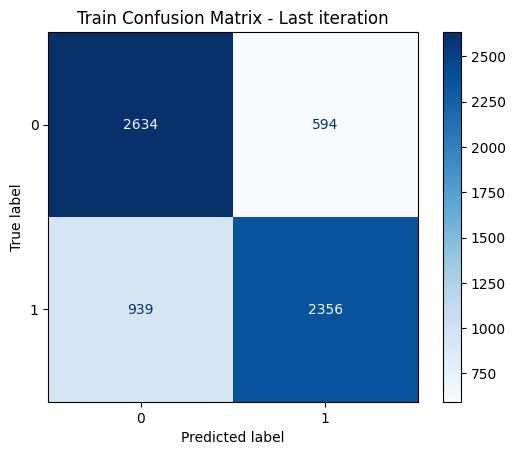

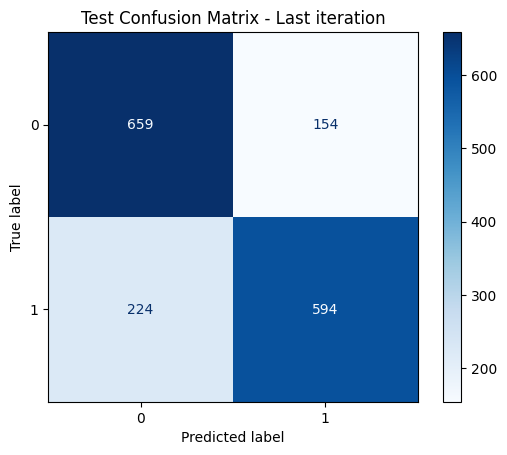

In [100]:
folds = 10

accuracy_arr_train = []
accuracy_arr_test = []

for i in range(folds):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Create and fit the sklearn model
    clf = LinearDiscriminantAnalysis(store_covariance=True)
    clf.fit(X_train, y_train)
    
    # Train Metrics
    train_y_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_y_pred)
    
    # Test Metrics
    test_y_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_y_pred)

    accuracy_arr_train.append(train_accuracy)
    accuracy_arr_test.append(test_accuracy)
    

print(f"LDA Mean Train Accuracy: {np.mean(accuracy_arr_train)}")
print(f"LDA Mean Test Accuracy: {np.mean(accuracy_arr_test)}")

# Plotting (as per your code snippet)
confusion_mat_train = confusion_matrix(y_train, train_y_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=confusion_mat_train)
disp_train.plot(cmap=plt.cm.Blues)
plt.title('Train Confusion Matrix - Last iteration')

confusion_mat_test = confusion_matrix(y_test, test_y_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_mat_test)
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Test Confusion Matrix - Last iteration')

## GNB

GNB Mean Train Accuracy: 0.7117737237467423
GNB Mean Test Accuracy: 0.7161863887185775


Text(0.5, 1.0, 'Test Confusion Matrix - Last iteration')

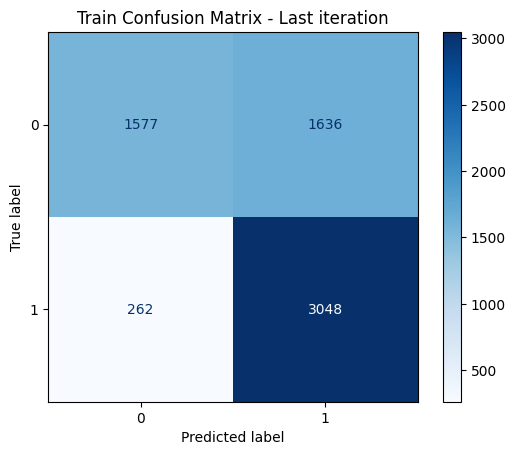

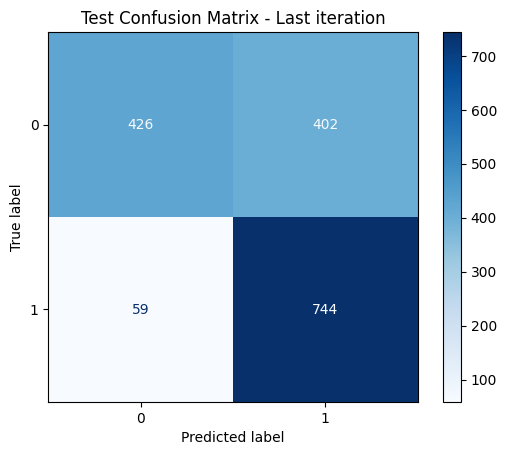

In [101]:
folds = 10

accuracy_arr_train = []
accuracy_arr_test = []

for i in range(folds):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Create and fit the sklearn model
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    
    # Train Metrics
    train_y_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_y_pred)
    
    # Test Metrics
    test_y_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_y_pred)

    accuracy_arr_train.append(train_accuracy)
    accuracy_arr_test.append(test_accuracy)
    

print(f"GNB Mean Train Accuracy: {np.mean(accuracy_arr_train)}")
print(f"GNB Mean Test Accuracy: {np.mean(accuracy_arr_test)}")

# Plotting (as per your code snippet)
confusion_mat_train = confusion_matrix(y_train, train_y_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=confusion_mat_train)
disp_train.plot(cmap=plt.cm.Blues)
plt.title('Train Confusion Matrix - Last iteration')

confusion_mat_test = confusion_matrix(y_test, test_y_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_mat_test)
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Test Confusion Matrix - Last iteration')

## Decision Tree


Average Train Accuracy:
 [0.7196382  0.73057387 0.73704839 0.76548623 0.78249783 0.79411825
 0.80367929 0.82606674 0.84062548 0.85742245]

Average Test Accuracy:
 [0.71784181 0.7294298  0.73374208 0.75409769 0.76993664 0.77410587
 0.77328837 0.77596567 0.77271613 0.76762722]

Best Test Depth:  8
Best Depth Tree:

Test Accuracy at Best Depth: 0.7682403433476395


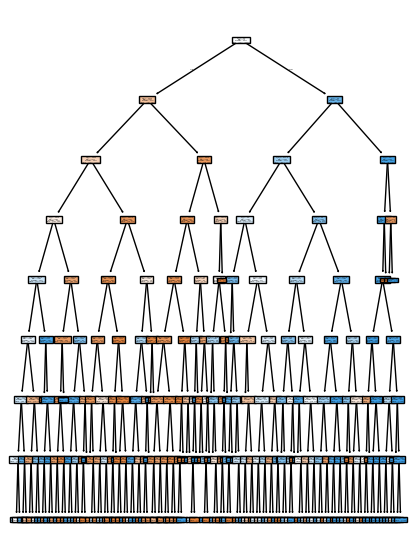

In [102]:
train_accuracy_avg = []
test_accuracy_avg = []

folds = 30

for depth in range(1, 11):

    train_accuracy_arr = []
    test_accuracy_arr = []
    
    for i in range(folds):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
        # Create and fit the sklearn model
        clf = DecisionTreeClassifier(max_depth=depth)
        clf.fit(X_train, y_train)
    
        # Evaluate Train
        train_acc = accuracy_score(y_train, clf.predict(X_train))
        
        # Evaluate Test
        test_acc = accuracy_score(y_test, clf.predict(X_test))
    
        train_accuracy_arr.append(train_acc)
        test_accuracy_arr.append(test_acc)

    train_accuracy_avg.append(np.mean(train_accuracy_arr))
    test_accuracy_avg.append(np.mean(test_accuracy_arr))

best_depth = list(range(1, 11))[np.argmax(test_accuracy_avg)]

print("\nAverage Train Accuracy:\n", np.array(train_accuracy_avg))
print("\nAverage Test Accuracy:\n", np.array(test_accuracy_avg))

print("\nBest Test Depth: ", best_depth)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and fit the sklearn model
clf = DecisionTreeClassifier(max_depth=best_depth)
clf.fit(X_train, y_train)

test_acc = accuracy_score(y_test, clf.predict(X_test))

print('Best Depth Tree:\n')
print("Test Accuracy at Best Depth:", test_acc)

plt.figure(figsize=(5,7))
ax = plt.axes()
tree.plot_tree(clf, filled=True, ax=ax);


Average Train Accuracy:
 [1.         0.95432061 0.93242373 0.91062395 0.89805304 0.8860187
 0.87802647 0.87079054 0.86575195 0.85937963]

Average Test Accuracy:
 [0.7405886  0.74637237 0.74608625 0.75272839 0.75773554 0.7602289
 0.76116902 0.76758635 0.76693235 0.76742285]

Best Test Min Samples Leaf:  8
Best Samples Leaf Tree:

Test Accuracy at Best Samples Leaf: 0.7755977927651747


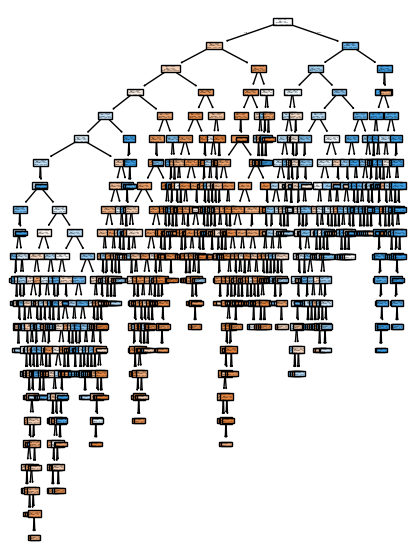

In [103]:
train_accuracy_avg = []
test_accuracy_avg = []

folds = 30

for samples_leaf in range(1, 11):

    train_accuracy_arr = []
    test_accuracy_arr = []
    
    for i in range(folds):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
        # Create and fit the sklearn model
        clf = DecisionTreeClassifier(min_samples_leaf=samples_leaf)
        clf.fit(X_train, y_train)
    
        # Evaluate Train
        train_acc = accuracy_score(y_train, clf.predict(X_train))
        
        # Evaluate Test
        test_acc = accuracy_score(y_test, clf.predict(X_test))
    
        train_accuracy_arr.append(train_acc)
        test_accuracy_arr.append(test_acc)

    train_accuracy_avg.append(np.mean(train_accuracy_arr))
    test_accuracy_avg.append(np.mean(test_accuracy_arr))

best_samples_leaf = list(range(1, 11))[np.argmax(test_accuracy_avg)]

print("\nAverage Train Accuracy:\n", np.array(train_accuracy_avg))
print("\nAverage Test Accuracy:\n", np.array(test_accuracy_avg))

print("\nBest Test Min Samples Leaf: ", best_samples_leaf)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and fit the sklearn model
clf = DecisionTreeClassifier(min_samples_leaf=best_samples_leaf)
clf.fit(X_train, y_train)

test_acc = accuracy_score(y_test, clf.predict(X_test))

print('Best Samples Leaf Tree:\n')
print("Test Accuracy at Best Samples Leaf:", test_acc)

plt.figure(figsize=(5,7))
ax = plt.axes()
tree.plot_tree(clf, filled=True, ax=ax);


Average Train Accuracy:
 [0.71945424 0.7196382  0.72778374 0.74037508 0.75679902 0.76504676
 0.76921151 0.77169503 0.77440339]

Average Test Accuracy:
 [0.71857756 0.71784181 0.72687513 0.73392602 0.75370938 0.75608011
 0.7600654  0.76043327 0.76650317]

Best Test Max Leaf Nodes:  9
Test Accuracy at Best Max Leaf Nodes: 0.7694665849172287


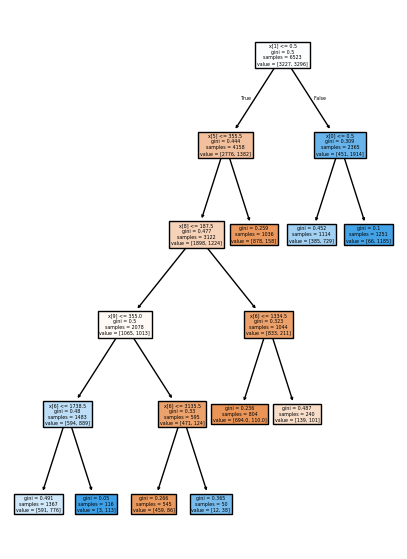

In [104]:
# 2. Train trees for different splits of the data
# We iterate through different random_state values to create different splits

train_accuracy_avg = []
test_accuracy_avg = []

folds = 30

for leaf_nodes in range(2, 11):

    train_accuracy_arr = []
    test_accuracy_arr = []
    
    for i in range(folds):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
        # Create and fit the sklearn model
        clf = DecisionTreeClassifier(max_leaf_nodes=leaf_nodes)
        clf.fit(X_train, y_train)
    
        # Evaluate Train
        train_acc = accuracy_score(y_train, clf.predict(X_train))
        
        # Evaluate Test
        test_acc = accuracy_score(y_test, clf.predict(X_test))
    
        train_accuracy_arr.append(train_acc)
        test_accuracy_arr.append(test_acc)

    train_accuracy_avg.append(np.mean(train_accuracy_arr))
    test_accuracy_avg.append(np.mean(test_accuracy_arr))

best_leaf_nodes = list(range(1, 11))[np.argmax(test_accuracy_avg)]

print("\nAverage Train Accuracy:\n", np.array(train_accuracy_avg))
print("\nAverage Test Accuracy:\n", np.array(test_accuracy_avg))

print("\nBest Test Max Leaf Nodes: ", best_leaf_nodes)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and fit the sklearn model
clf = DecisionTreeClassifier(max_leaf_nodes=best_leaf_nodes)
clf.fit(X_train, y_train)

test_acc = accuracy_score(y_test, clf.predict(X_test))

print("Test Accuracy at Best Max Leaf Nodes:", test_acc)

plt.figure(figsize=(5,7))
ax = plt.axes()
tree.plot_tree(clf, filled=True, ax=ax);

We have chosen the parameters that give the best test accuracy:

Mean Test Accuracy:  0.7678111587982834


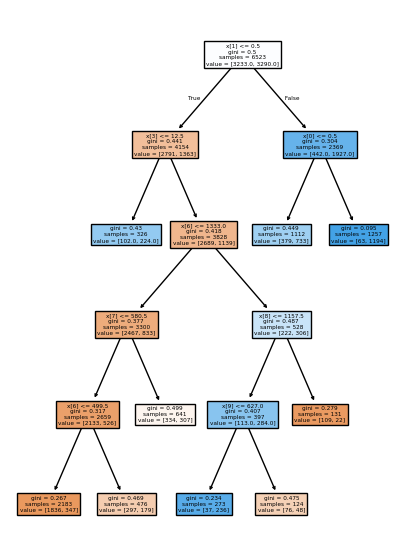

In [105]:
folds = 30

accuracy_arr_test = []

for i in range(folds):

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Create and fit the sklearn model
    clf = DecisionTreeClassifier(max_leaf_nodes=best_leaf_nodes, min_samples_leaf=best_samples_leaf, max_depth=best_depth)
    clf.fit(X_train, y_train)
    
    test_acc = accuracy_score(y_test, clf.predict(X_test))

    accuracy_arr_test.append(test_acc)

print('We have chosen the parameters that give the best test accuracy:\n')
print("Mean Test Accuracy: ", np.mean(accuracy_arr_test))

plt.figure(figsize=(5,7))
ax = plt.axes()
tree.plot_tree(clf, filled=True, ax=ax);

## Random Forest

n_estimators: 100
n_leaves (total): 112599
Forest Train Accuracy: 1.0
Forest Test Accuracy: 0.8160637645616187


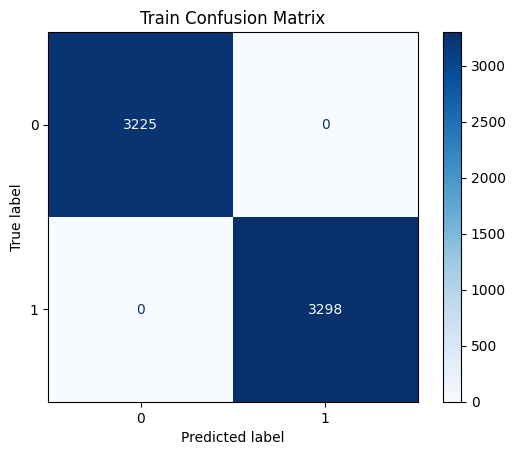

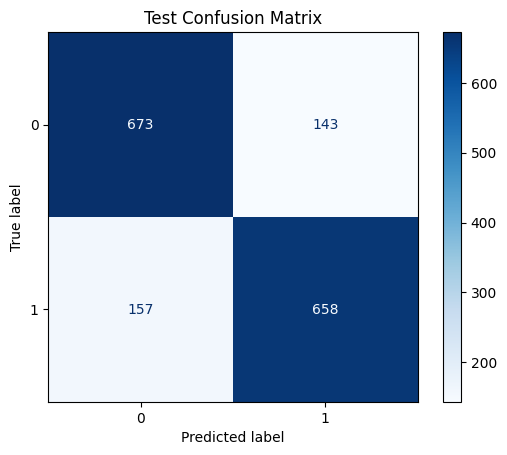

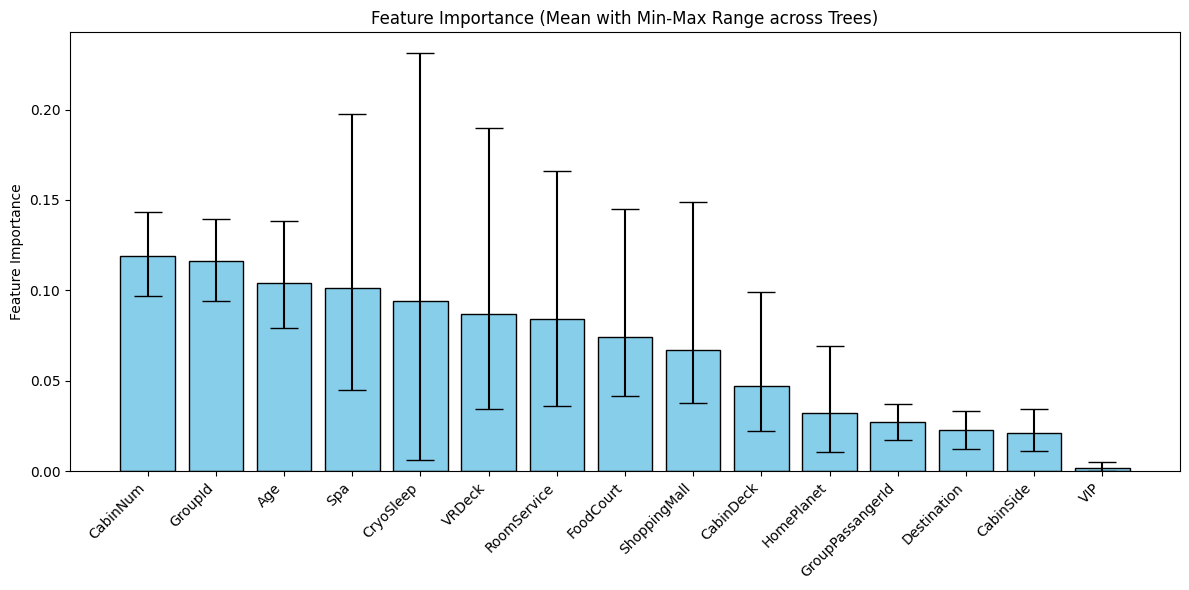

             Feature  Mean Importance  Min Importance  Max Importance
0           CabinNum         0.119248        0.097026        0.143089
1            GroupId         0.116188        0.093941        0.139457
2                Age         0.104261        0.079131        0.138454
3                Spa         0.101509        0.044872        0.197565
4          CryoSleep         0.094292        0.006316        0.231177
5             VRDeck         0.087148        0.034179        0.189552
6        RoomService         0.083857        0.035813        0.165741
7          FoodCourt         0.074285        0.041470        0.144748
8       ShoppingMall         0.066998        0.037909        0.148873
9          CabinDeck         0.047222        0.022127        0.099315
10        HomePlanet         0.032297        0.010454        0.069372
11  GroupPassangerId         0.026925        0.016907        0.037275
12       Destination         0.022644        0.012153        0.033027
13         CabinSide

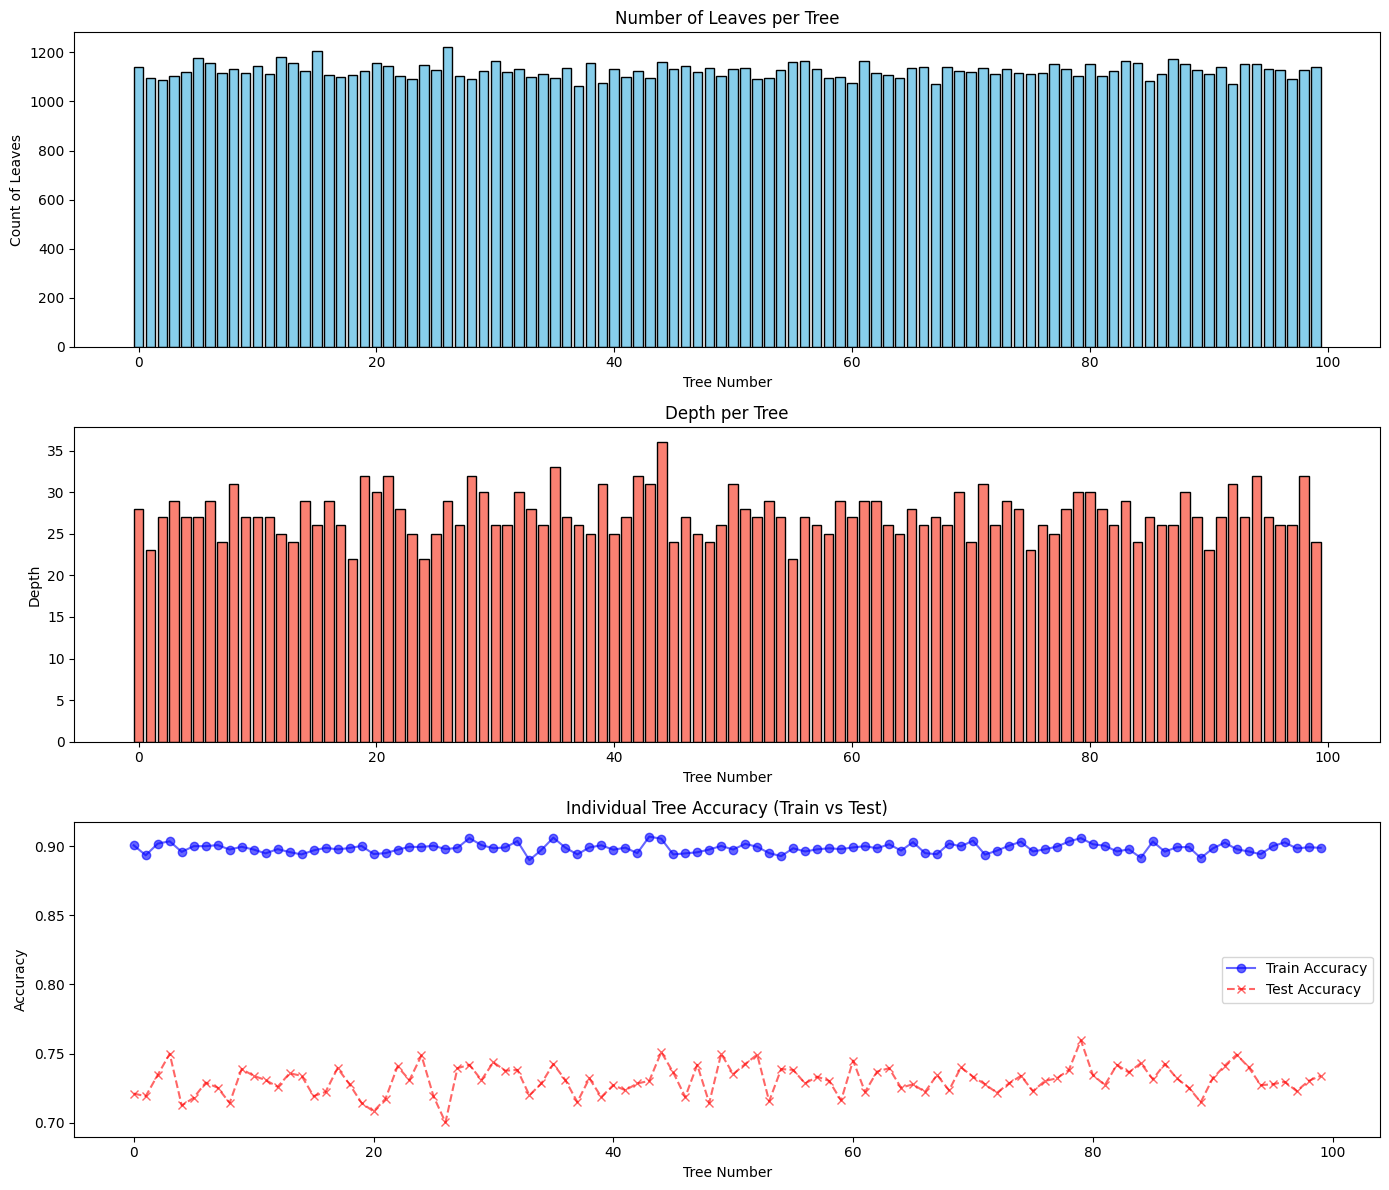

In [106]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train the Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# 4. Evaluate the model & Print Requested Info

# Get n_estimators
n_estimators = rf_clf.n_estimators

# Get n_leaves (Sum of leaves from all trees in the forest)
n_leaves = sum(tree.get_n_leaves() for tree in rf_clf.estimators_)

# Train Metrics
train_y_pred = rf_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_y_pred)

# Test Metrics
test_y_pred = rf_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_y_pred)

print(f"n_estimators: {n_estimators}")
print(f"n_leaves (total): {n_leaves}")
print(f"Forest Train Accuracy: {train_accuracy}")
print(f"Forest Test Accuracy: {test_accuracy}")

# Plotting (as per your code snippet)
confusion_mat_train = confusion_matrix(y_train, train_y_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=confusion_mat_train)
disp_train.plot(cmap=plt.cm.Blues)
plt.title('Train Confusion Matrix')

confusion_mat_test = confusion_matrix(y_test, test_y_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_mat_test)
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Test Confusion Matrix')

# ==========================================
# Feature Importance with Min-Max Range
# ==========================================

# 1. Collect importances from every tree
# shape: (n_estimators, n_features)
all_importances = np.array([tree.feature_importances_ for tree in rf_clf.estimators_])

# 2. Calculate Statistics
mean_importances = np.mean(all_importances, axis=0)
min_importances = np.min(all_importances, axis=0)
max_importances = np.max(all_importances, axis=0)

# 3. Sort features by Mean Importance for a cleaner plot
indices = np.argsort(mean_importances)[::-1]
sorted_features = X.columns[indices]
sorted_mean = mean_importances[indices]
sorted_min = min_importances[indices]
sorted_max = max_importances[indices]

# 4. Prepare Error Bars
# Matplotlib's yerr expects relative values (distance from the mean), not absolute values.
# Row 0: Distance from Mean to Min
# Row 1: Distance from Mean to Max
yerr_min = sorted_mean - sorted_min
yerr_max = sorted_max - sorted_mean
asymmetric_error = [yerr_min, yerr_max]

# 5. Plot
plt.figure(figsize=(12, 6))

# 'capsize' creates the horizontal line on top and bottom of the stick
plt.bar(range(len(sorted_features)), sorted_mean, 
        yerr=asymmetric_error, 
        align='center', 
        color='skyblue', 
        edgecolor='black', 
        ecolor='black',     # Color of the error bar line
        capsize=10)         # Width of the horizontal cap

plt.xticks(range(len(sorted_features)), sorted_features, rotation=45, ha='right')
plt.ylabel('Feature Importance')
plt.title('Feature Importance (Mean with Min-Max Range across Trees)')
plt.tight_layout()
plt.show()

# Optional: Print the sorted dataframe
importance_df = pd.DataFrame({
    'Feature': sorted_features,
    'Mean Importance': sorted_mean,
    'Min Importance': sorted_min,
    'Max Importance': sorted_max
})
print(importance_df)

# ==========================================
# 5. Analyze Individual Trees (Corrected)
# ==========================================

tree_indices = range(len(rf_clf.estimators_))
leaves_counts = []
depths = []
train_scores = []
test_scores = []

for estimator in rf_clf.estimators_:
    # Structural properties
    leaves_counts.append(estimator.get_n_leaves())
    depths.append(estimator.get_depth())
    
    # Performance properties
    # FIX: Use .values to convert DataFrame to numpy array 
    # This prevents the "X has feature names" warning
    train_scores.append(estimator.score(X_train.values, y_train))
    test_scores.append(estimator.score(X_test.values, y_test))

# ==========================================
# 6. Plotting
# ==========================================
plt.figure(figsize=(14, 12))

# Plot 1: Number of Leaves per Tree
plt.subplot(3, 1, 1)
plt.bar(tree_indices, leaves_counts, color='skyblue', edgecolor='black')
plt.title('Number of Leaves per Tree')
plt.ylabel('Count of Leaves')
plt.xlabel('Tree Number')

# Plot 2: Max Depth per Tree
plt.subplot(3, 1, 2)
plt.bar(tree_indices, depths, color='salmon', edgecolor='black')
plt.title('Depth per Tree')
plt.ylabel('Depth')
plt.xlabel('Tree Number')

# Plot 3: Train vs Test Accuracy per Tree
# (This answers the "Train vs Test" performance aspect)
plt.subplot(3, 1, 3)
plt.plot(tree_indices, train_scores, label='Train Accuracy', marker='o', linestyle='-', color='blue', alpha=0.6)
plt.plot(tree_indices, test_scores, label='Test Accuracy', marker='x', linestyle='--', color='red', alpha=0.6)
plt.title('Individual Tree Accuracy (Train vs Test)')
plt.ylabel('Accuracy')
plt.xlabel('Tree Number')
plt.legend()

plt.tight_layout()
plt.show()

In [107]:
x_axis_depths = []

accuracy_mean_depth_train = []
accuracy_mean_depth_test = []

folds = 30

for depth in range(2,11):
    
    accuracy_arr_train = []
    accuracy_arr_test = []
    
    for i in range(folds):
        # Split into training and testing sets (80% train, 20% test)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # 3. Train the Random Forest Classifier
        rf_clf = RandomForestClassifier(max_depth=depth)
        rf_clf.fit(X_train, y_train)
        
        # 4. Evaluate the model
    
        train_y_pred = rf_clf.predict(X_train)
        train_accuracy = accuracy_score(y_train, train_y_pred)
        
        test_y_pred = rf_clf.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_y_pred)

        accuracy_arr_train.append(train_accuracy)
        accuracy_arr_test.append(test_accuracy)

    x_axis_depths.append(depth)
        
    accuracy_mean_depth_train.append(np.mean(accuracy_arr_train))
    accuracy_mean_depth_test.append(np.mean(accuracy_arr_test))

best_depth = np.argmax(accuracy_mean_depth_test) + 2
print('Best Depth:', best_depth)

Best Depth: 10


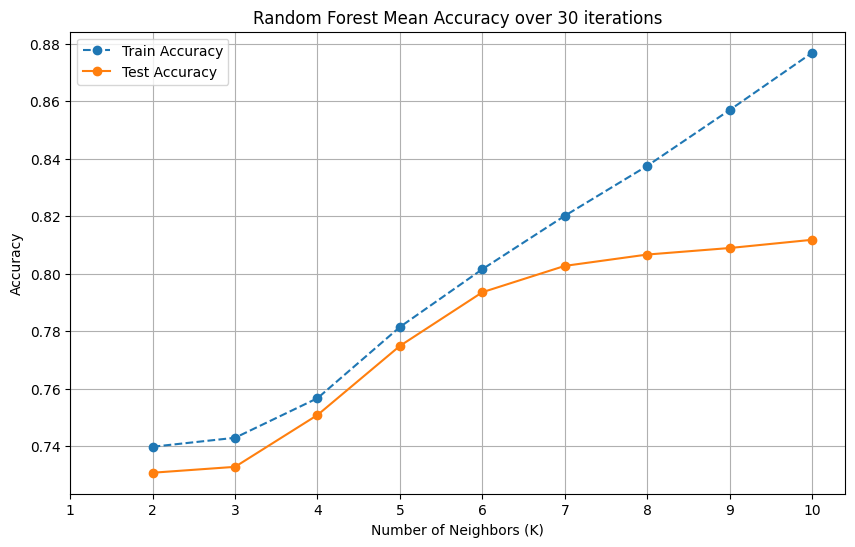

In [108]:
plt.figure(figsize=(10, 6))
plt.plot(x_axis_depths, accuracy_mean_depth_train, label='Train Accuracy', marker='o', linestyle='--')
plt.plot(x_axis_depths, accuracy_mean_depth_test, label='Test Accuracy', marker='o')

plt.title(f'Random Forest Mean Accuracy over {folds} iterations')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(x_axis) # כדי לראות את כל המספרים 1-10 בציר ה-X
plt.legend()
plt.grid(True)
plt.show()

In [109]:
x_axis_estimators = []

accuracy_mean_estimators_train = []
accuracy_mean_estimators_test = []

for estimators in range(2,11):

    accuracy_arr_estimators_train = []
    accuracy_arr_estimators_test = []
    
    for i in range(folds):
        # Split into training and testing sets (80% train, 20% test)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # 3. Train the Random Forest Classifier
        rf_clf = RandomForestClassifier(n_estimators=estimators)
        rf_clf.fit(X_train, y_train)
        
        # 4. Evaluate the model
    
        train_y_pred = rf_clf.predict(X_train)
        train_accuracy = accuracy_score(y_train, train_y_pred)
        
        test_y_pred = rf_clf.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_y_pred)

        accuracy_arr_estimators_train.append(train_accuracy)
        accuracy_arr_estimators_test.append(test_accuracy)

    accuracy_mean_estimators_train.append(np.mean(accuracy_arr_estimators_train))
    accuracy_mean_estimators_test.append(np.mean(accuracy_arr_estimators_test))

    x_axis_estimators.append(estimators)

best_estimators = np.argmax(accuracy_mean_estimators_test) + 2
print('Best Estimators:', best_estimators)

Best Estimators: 9


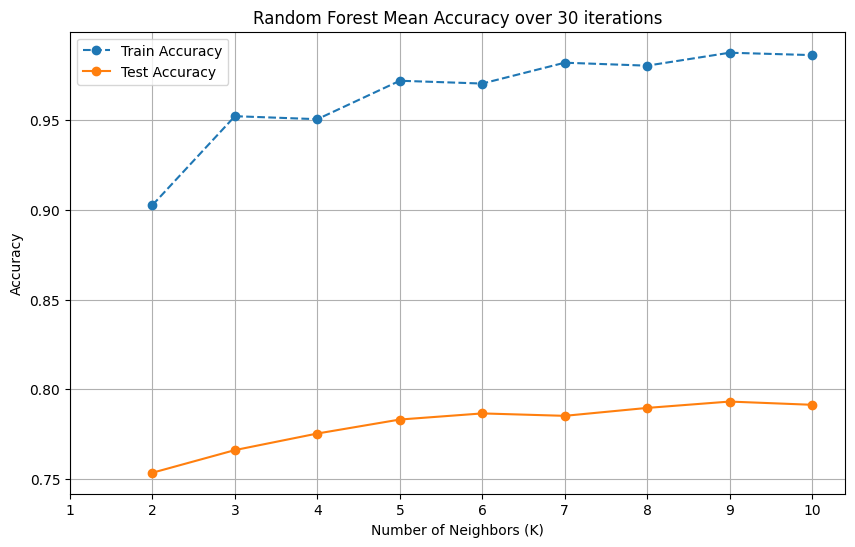

In [110]:
plt.figure(figsize=(10, 6))
plt.plot(x_axis_estimators, accuracy_mean_estimators_train, label='Train Accuracy', marker='o', linestyle='--')
plt.plot(x_axis_estimators, accuracy_mean_estimators_test, label='Test Accuracy', marker='o')

plt.title(f'Random Forest Mean Accuracy over {folds} iterations')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(x_axis) # כדי לראות את כל המספרים 1-10 בציר ה-X
plt.legend()
plt.grid(True)
plt.show()

max_depth: 10
n_estimators: 9
n_leaves (total): 2787
Forest Train Accuracy: 0.8733711482446727
Forest Test Accuracy: 0.8044144696505211


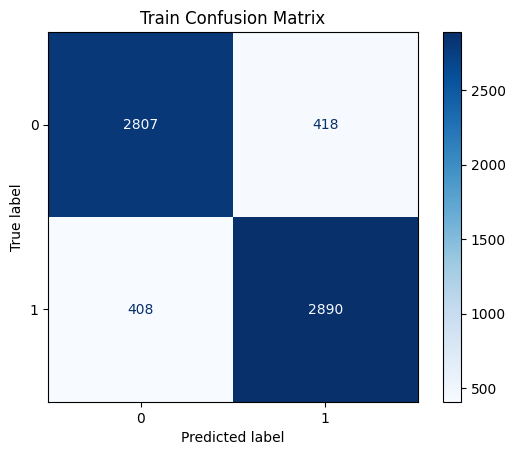

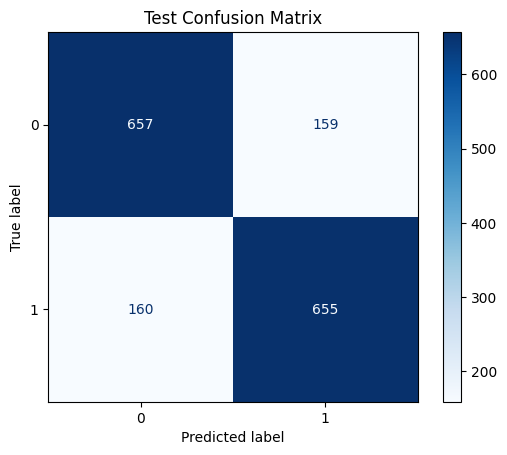

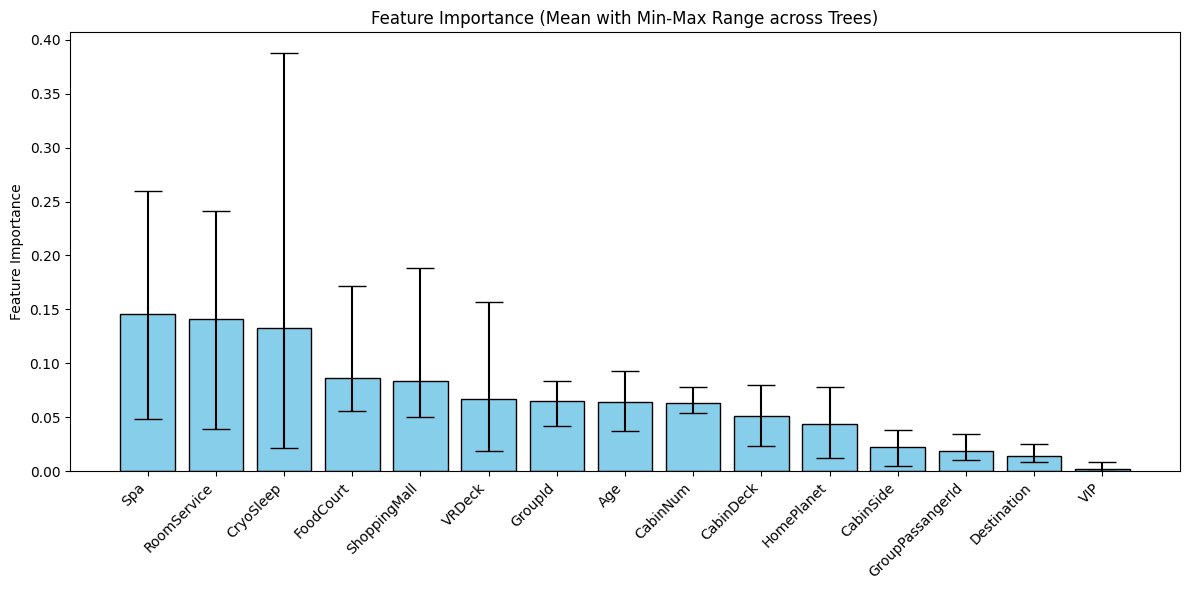

             Feature  Mean Importance  Min Importance  Max Importance
0                Spa         0.145904        0.048179        0.259473
1        RoomService         0.141019        0.038742        0.241645
2          CryoSleep         0.132287        0.021378        0.387644
3          FoodCourt         0.086086        0.056141        0.171893
4       ShoppingMall         0.083798        0.050296        0.188460
5             VRDeck         0.067009        0.018242        0.156607
6            GroupId         0.064907        0.041357        0.083810
7                Age         0.063914        0.037364        0.092583
8           CabinNum         0.063402        0.054110        0.078116
9          CabinDeck         0.050618        0.023237        0.079909
10        HomePlanet         0.043965        0.011761        0.077847
11         CabinSide         0.022414        0.004398        0.037811
12  GroupPassangerId         0.018590        0.010416        0.034002
13       Destination

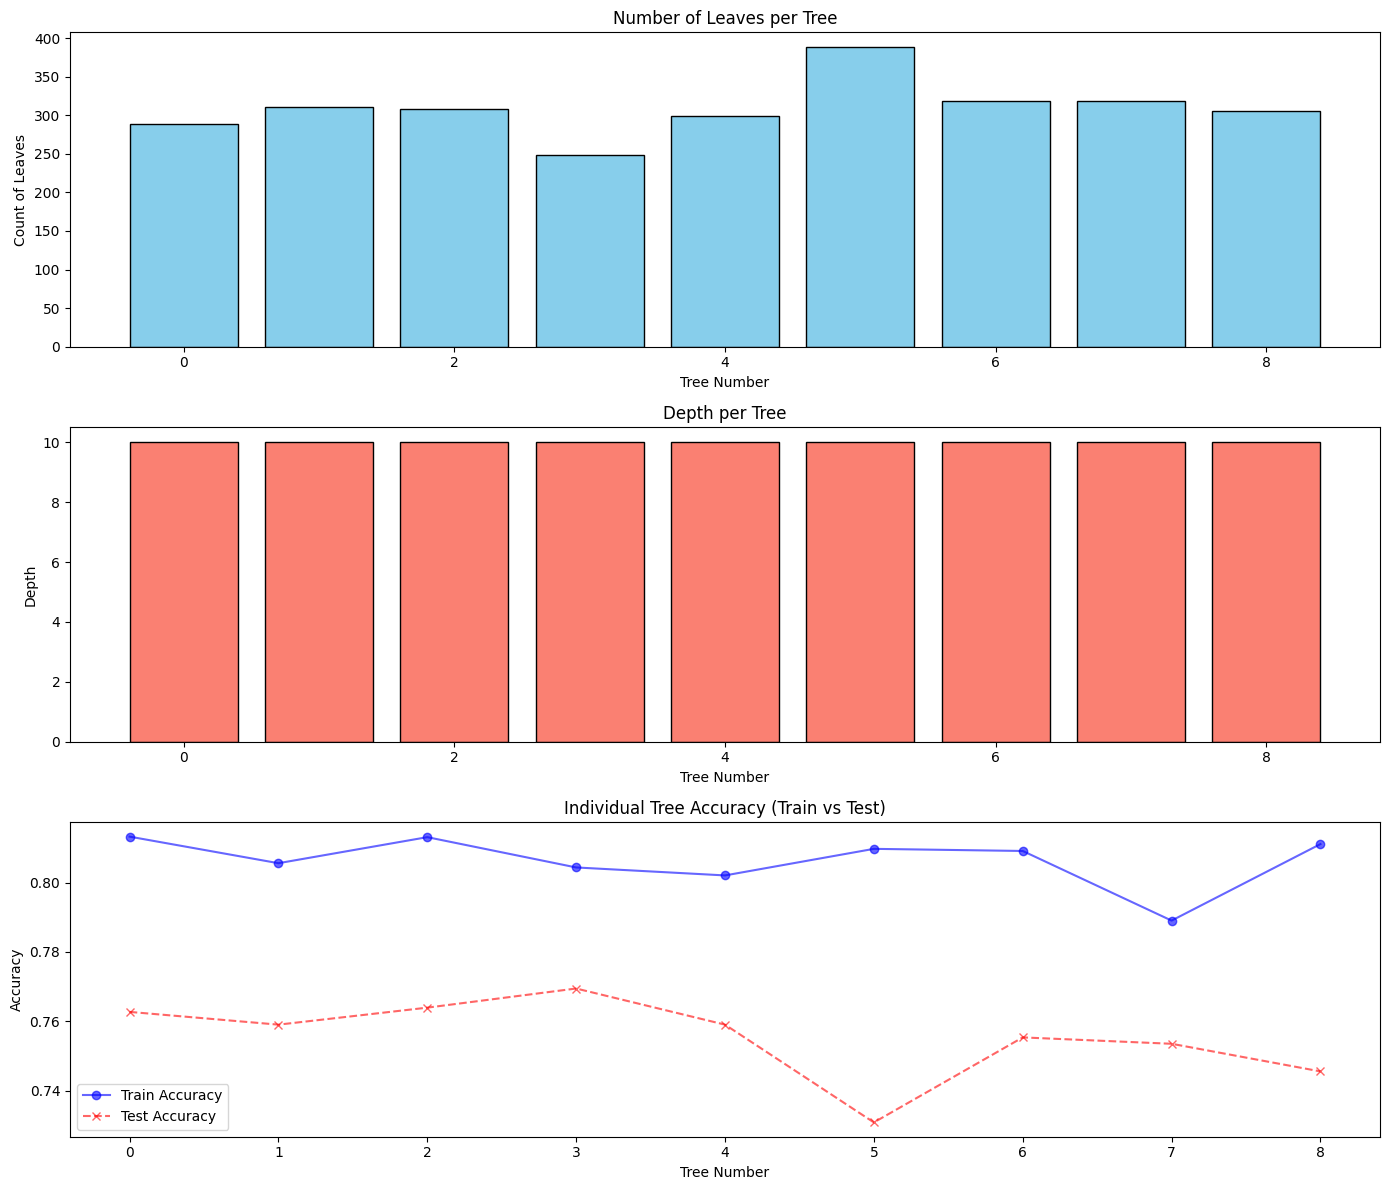

In [111]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train the Random Forest Classifier
rf_clf = RandomForestClassifier(max_depth=best_depth, n_estimators=best_estimators)
rf_clf.fit(X_train, y_train)

# 4. Evaluate the model & Print Requested Info

# Get n_estimators
n_estimators = rf_clf.n_estimators

# Get n_leaves (Sum of leaves from all trees in the forest)
n_leaves = sum(tree.get_n_leaves() for tree in rf_clf.estimators_)

# Train Metrics
train_y_pred = rf_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_y_pred)

# Test Metrics
test_y_pred = rf_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_y_pred)

print(f"max_depth: {best_depth}")
print(f"n_estimators: {n_estimators}")
print(f"n_leaves (total): {n_leaves}")
print(f"Forest Train Accuracy: {train_accuracy}")
print(f"Forest Test Accuracy: {test_accuracy}")

# Plotting (as per your code snippet)
confusion_mat_train = confusion_matrix(y_train, train_y_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=confusion_mat_train)
disp_train.plot(cmap=plt.cm.Blues)
plt.title('Train Confusion Matrix')

confusion_mat_test = confusion_matrix(y_test, test_y_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_mat_test)
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Test Confusion Matrix') # Fixed title to 'Test'

# ==========================================
# Feature Importance with Min-Max Range
# ==========================================

# 1. Collect importances from every tree
# shape: (n_estimators, n_features)
all_importances = np.array([tree.feature_importances_ for tree in rf_clf.estimators_])

# 2. Calculate Statistics
mean_importances = np.mean(all_importances, axis=0)
min_importances = np.min(all_importances, axis=0)
max_importances = np.max(all_importances, axis=0)

# 3. Sort features by Mean Importance for a cleaner plot
indices = np.argsort(mean_importances)[::-1]
sorted_features = X.columns[indices]
sorted_mean = mean_importances[indices]
sorted_min = min_importances[indices]
sorted_max = max_importances[indices]

# 4. Prepare Error Bars
# Matplotlib's yerr expects relative values (distance from the mean), not absolute values.
# Row 0: Distance from Mean to Min
# Row 1: Distance from Mean to Max
yerr_min = sorted_mean - sorted_min
yerr_max = sorted_max - sorted_mean
asymmetric_error = [yerr_min, yerr_max]

# 5. Plot
plt.figure(figsize=(12, 6))

# 'capsize' creates the horizontal line on top and bottom of the stick
plt.bar(range(len(sorted_features)), sorted_mean, 
        yerr=asymmetric_error, 
        align='center', 
        color='skyblue', 
        edgecolor='black', 
        ecolor='black',     # Color of the error bar line
        capsize=10)         # Width of the horizontal cap

plt.xticks(range(len(sorted_features)), sorted_features, rotation=45, ha='right')
plt.ylabel('Feature Importance')
plt.title('Feature Importance (Mean with Min-Max Range across Trees)')
plt.tight_layout()
plt.show()

# Optional: Print the sorted dataframe
importance_df = pd.DataFrame({
    'Feature': sorted_features,
    'Mean Importance': sorted_mean,
    'Min Importance': sorted_min,
    'Max Importance': sorted_max
})
print(importance_df)

# ==========================================
# 5. Analyze Individual Trees (Corrected)
# ==========================================

tree_indices = range(len(rf_clf.estimators_))
leaves_counts = []
depths = []
train_scores = []
test_scores = []

for estimator in rf_clf.estimators_:
    # Structural properties
    leaves_counts.append(estimator.get_n_leaves())
    depths.append(estimator.get_depth())
    
    # Performance properties
    # FIX: Use .values to convert DataFrame to numpy array 
    # This prevents the "X has feature names" warning
    train_scores.append(estimator.score(X_train.values, y_train))
    test_scores.append(estimator.score(X_test.values, y_test))

# ==========================================
# 6. Plotting
# ==========================================
plt.figure(figsize=(14, 12))

# Plot 1: Number of Leaves per Tree
plt.subplot(3, 1, 1)
plt.bar(tree_indices, leaves_counts, color='skyblue', edgecolor='black')
plt.title('Number of Leaves per Tree')
plt.ylabel('Count of Leaves')
plt.xlabel('Tree Number')

# Plot 2: Max Depth per Tree
plt.subplot(3, 1, 2)
plt.bar(tree_indices, depths, color='salmon', edgecolor='black')
plt.title('Depth per Tree')
plt.ylabel('Depth')
plt.xlabel('Tree Number')

# Plot 3: Train vs Test Accuracy per Tree
# (This answers the "Train vs Test" performance aspect)
plt.subplot(3, 1, 3)
plt.plot(tree_indices, train_scores, label='Train Accuracy', marker='o', linestyle='-', color='blue', alpha=0.6)
plt.plot(tree_indices, test_scores, label='Test Accuracy', marker='x', linestyle='--', color='red', alpha=0.6)
plt.title('Individual Tree Accuracy (Train vs Test)')
plt.ylabel('Accuracy')
plt.xlabel('Tree Number')
plt.legend()

plt.tight_layout()
plt.show()

## SVM

SVM Mean Train Accuracy: 0.7324084010424652
SVM Mean Test Accuracy: 0.7365419987737584


Text(0.5, 1.0, 'Test Confusion Matrix - Last iteration')

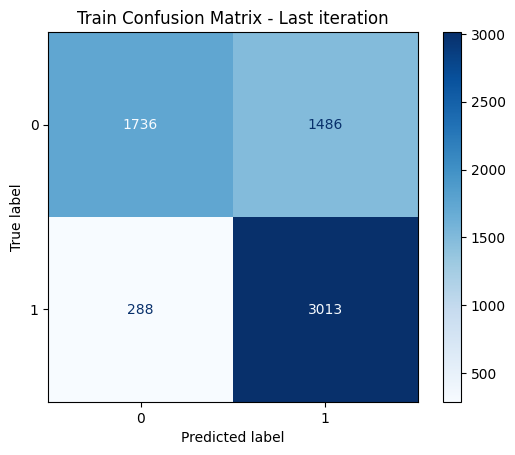

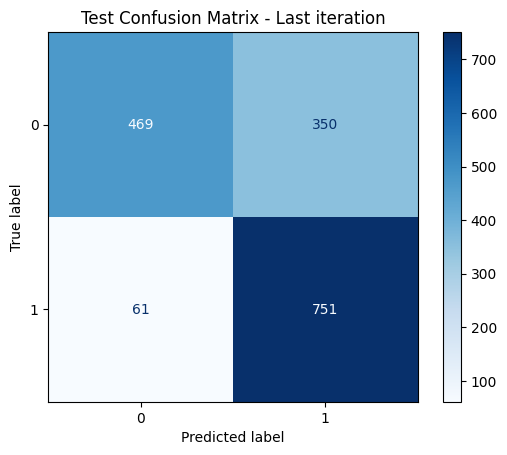

In [112]:
folds = 10

accuracy_arr_train = []
accuracy_arr_test = []

for i in range(folds):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Create and fit the sklearn model
    svc = SVC(kernel='poly', degree=2,C=10)
    svc.fit(X_train, y_train)
    
    # Train Metrics
    train_y_pred = svc.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_y_pred)
    
    # Test Metrics
    test_y_pred = svc.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_y_pred)

    accuracy_arr_train.append(train_accuracy)
    accuracy_arr_test.append(test_accuracy)
    

print(f"SVM Mean Train Accuracy: {np.mean(accuracy_arr_train)}")
print(f"SVM Mean Test Accuracy: {np.mean(accuracy_arr_test)}")

# Plotting (as per your code snippet)
confusion_mat_train = confusion_matrix(y_train, train_y_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=confusion_mat_train)
disp_train.plot(cmap=plt.cm.Blues)
plt.title('Train Confusion Matrix - Last iteration')

confusion_mat_test = confusion_matrix(y_test, test_y_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_mat_test)
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Test Confusion Matrix - Last iteration')

In [113]:
accuracy_mean_train = []
accuracy_mean_test = []

x_axis = []

folds = 5

for deg in range(1,5):

    accuracy_arr_train = []
    accuracy_arr_test = []

    for i in range(folds):
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
        # Create and fit the sklearn model
        svc = SVC(kernel='poly', degree=deg,C=10)
        svc.fit(X_train, y_train)
        
        # Train Metrics
        train_y_pred = svc.predict(X_train)
        train_accuracy = accuracy_score(y_train, train_y_pred)
        
        # Test Metrics
        test_y_pred = svc.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_y_pred)
    
        accuracy_arr_train.append(train_accuracy)
        accuracy_arr_test.append(test_accuracy)

    accuracy_mean_train.append(np.mean(accuracy_arr_train))
    accuracy_mean_test.append(np.mean(accuracy_arr_test))

    x_axis.append(deg)

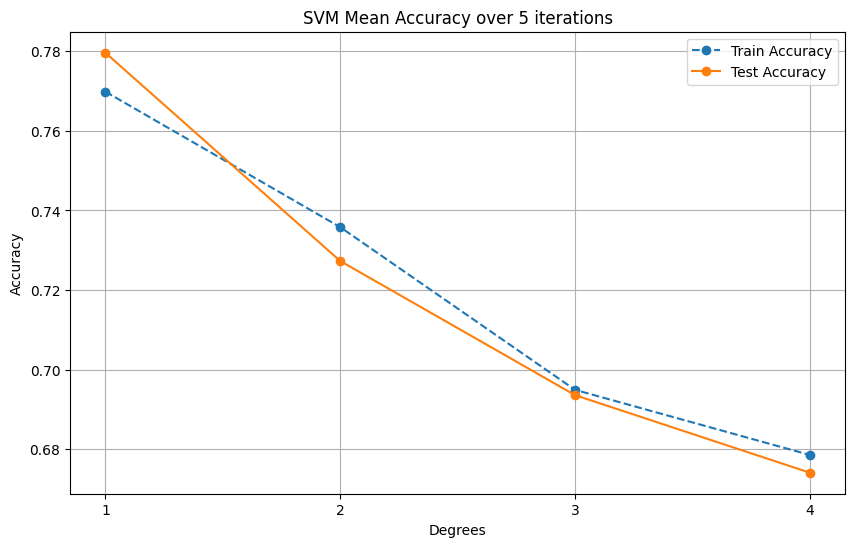

In [114]:
plt.figure(figsize=(10, 6))
plt.plot(x_axis, accuracy_mean_train, label='Train Accuracy', marker='o', linestyle='--')
plt.plot(x_axis, accuracy_mean_test, label='Test Accuracy', marker='o')

plt.title(f'SVM Mean Accuracy over {folds} iterations')
plt.xlabel('Degrees')
plt.ylabel('Accuracy')
plt.xticks(x_axis) # כדי לראות את כל המספרים 1-10 בציר ה-X
plt.legend()
plt.grid(True)
plt.show()

In [115]:
accuracy_mean_train = []
accuracy_mean_test = []

x_axis = []

folds = 5

for power in range(-1,4):

    accuracy_arr_train = []
    accuracy_arr_test = []

    for i in range(folds):
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        c = 10**power
        # Create and fit the sklearn model
        svc = SVC(kernel='poly', degree=1,C=c)
        svc.fit(X_train, y_train)
        
        # Train Metrics
        train_y_pred = svc.predict(X_train)
        train_accuracy = accuracy_score(y_train, train_y_pred)
        
        # Test Metrics
        test_y_pred = svc.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_y_pred)
    
        accuracy_arr_train.append(train_accuracy)
        accuracy_arr_test.append(test_accuracy)

    accuracy_mean_train.append(np.mean(accuracy_arr_train))
    accuracy_mean_test.append(np.mean(accuracy_arr_test))

    x_axis.append(power)

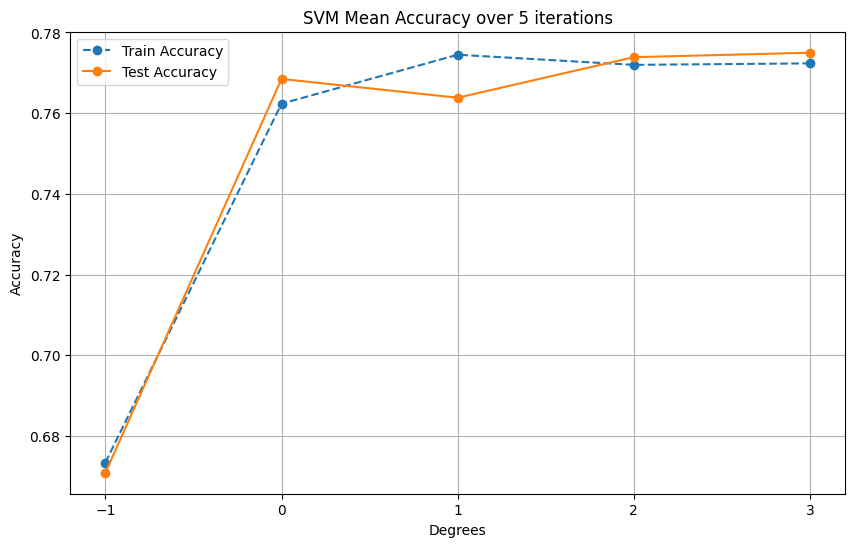

In [116]:
plt.figure(figsize=(10, 6))
plt.plot(x_axis, accuracy_mean_train, label='Train Accuracy', marker='o', linestyle='--')
plt.plot(x_axis, accuracy_mean_test, label='Test Accuracy', marker='o')

plt.title(f'SVM Mean Accuracy over {folds} iterations')
plt.xlabel('Degrees')
plt.ylabel('Accuracy')
plt.xticks(x_axis) # כדי לראות את כל המספרים 1-10 בציר ה-X
plt.legend()
plt.grid(True)
plt.show()

SVM Mean Train Accuracy: 0.7726506208799632
SVM Mean Test Accuracy: 0.7729613733905579


Text(0.5, 1.0, 'Test Confusion Matrix - Last iteration')

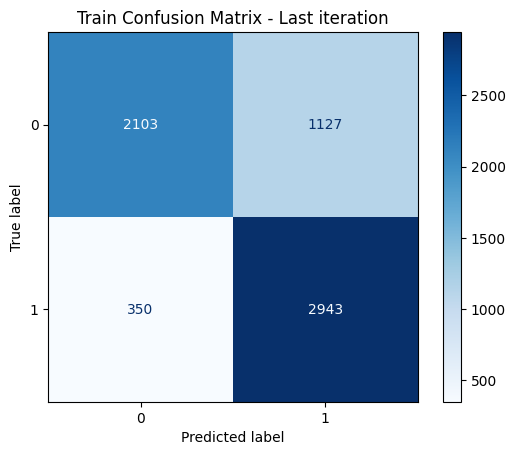

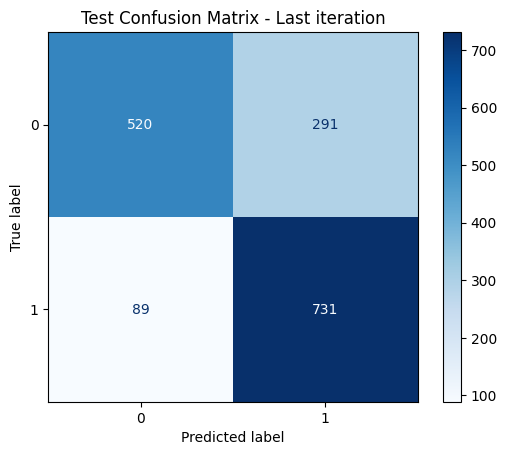

In [117]:
folds = 10

accuracy_arr_train = []
accuracy_arr_test = []

for i in range(folds):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Create and fit the sklearn model
    svc = SVC(kernel='poly', degree=1,C=10**2)
    svc.fit(X_train, y_train)
    
    # Train Metrics
    train_y_pred = svc.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_y_pred)
    
    # Test Metrics
    test_y_pred = svc.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_y_pred)

    accuracy_arr_train.append(train_accuracy)
    accuracy_arr_test.append(test_accuracy)
    

print(f"SVM Mean Train Accuracy: {np.mean(accuracy_arr_train)}")
print(f"SVM Mean Test Accuracy: {np.mean(accuracy_arr_test)}")

# Plotting (as per your code snippet)
confusion_mat_train = confusion_matrix(y_train, train_y_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=confusion_mat_train)
disp_train.plot(cmap=plt.cm.Blues)
plt.title('Train Confusion Matrix - Last iteration')

confusion_mat_test = confusion_matrix(y_test, test_y_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_mat_test)
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Test Confusion Matrix - Last iteration')

Logistic Regression Mean Train Accuracy: 0.7894833665491339
Logistic Regression Mean Test Accuracy: 0.7819742489270387


Text(0.5, 1.0, 'Test Confusion Matrix - Last iteration')

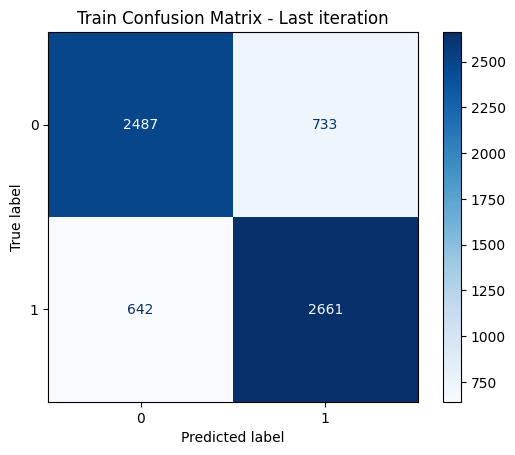

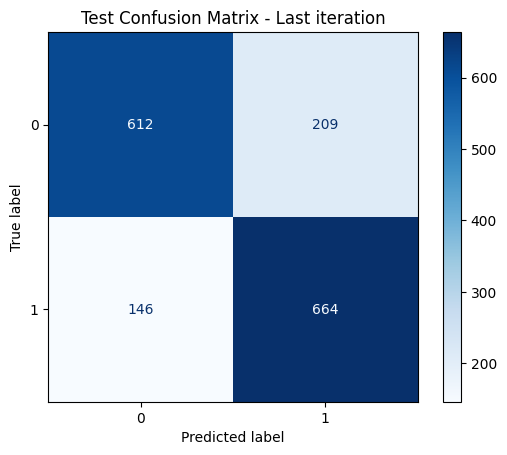

In [118]:
folds = 10

accuracy_arr_train = []
accuracy_arr_test = []

for i in range(folds):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Create and fit the sklearn model
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)
    
    # Train Metrics
    train_y_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_y_pred)
    
    # Test Metrics
    test_y_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_y_pred)

    accuracy_arr_train.append(train_accuracy)
    accuracy_arr_test.append(test_accuracy)
    

print(f"Logistic Regression Mean Train Accuracy: {np.mean(accuracy_arr_train)}")
print(f"Logistic Regression Mean Test Accuracy: {np.mean(accuracy_arr_test)}")

# Plotting (as per your code snippet)
confusion_mat_train = confusion_matrix(y_train, train_y_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=confusion_mat_train)
disp_train.plot(cmap=plt.cm.Blues)
plt.title('Train Confusion Matrix - Last iteration')

confusion_mat_test = confusion_matrix(y_test, test_y_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_mat_test)
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Test Confusion Matrix - Last iteration')

## MLP

In [119]:
def training_progress(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Hidden leyers check

hidden_layers_n = [1,2,3]

val_acc_arr = []

for n in hidden_layers_n:
  model = keras.Sequential()
  model.add(layers.Input(shape=(X_train.shape[1],)))
  for _ in range(n):
      model.add(layers.Dense(128, activation='tanh'))
      model.add(layers.BatchNormalization())
      model.add(layers.Dropout(0.3))
  model.add(layers.Dense(1, activation='sigmoid'))

  model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

  history = model.fit(X_train, y_train, epochs=30,batch_size=32, validation_split=0.2, verbose=1)

  val_acc_arr.append(history.history['val_accuracy'])

Epoch 1/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5361 - loss: 0.8033 - val_accuracy: 0.7540 - val_loss: 0.5398
Epoch 2/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7212 - loss: 0.5762 - val_accuracy: 0.7877 - val_loss: 0.4889
Epoch 3/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7333 - loss: 0.5484 - val_accuracy: 0.7793 - val_loss: 0.5012
Epoch 4/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7497 - loss: 0.5444 - val_accuracy: 0.7824 - val_loss: 0.4997
Epoch 5/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7342 - loss: 0.5560 - val_accuracy: 0.7946 - val_loss: 0.5066
Epoch 6/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7480 - loss: 0.5440 - val_accuracy: 0.7900 - val_loss: 0.5142
Epoch 7/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7558 - loss: 0.5309 - val_accuracy: 0.7939 - val_loss: 0.5357
Epoch 8/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7475 - loss: 0.5607 - val_accuracy: 0

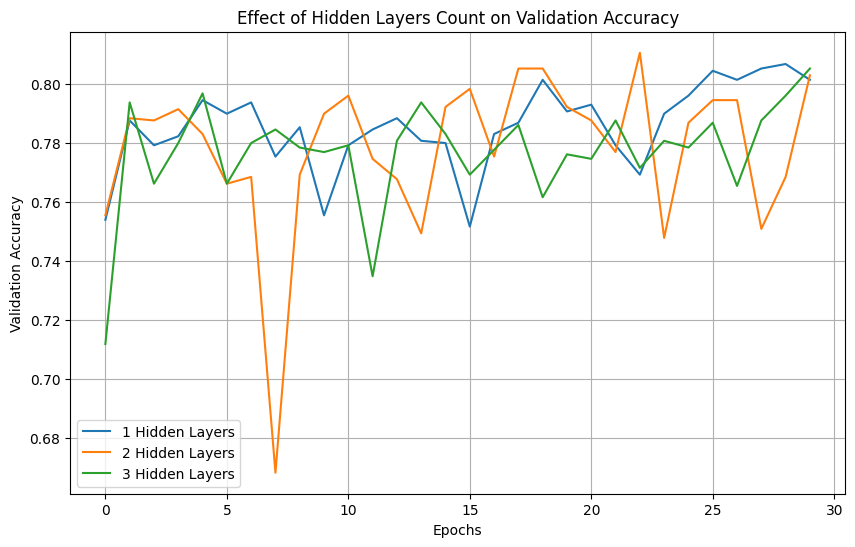

In [196]:
plt.figure(figsize=(10, 6))

# Loop through your results and plot a line for each neuron count
for i, acc_history in enumerate(val_acc_arr):
    # i is the index (0, 1, 2), acc_history is the list of accuracies
    plt.plot(acc_history, label=f'{hidden_layers_n[i]} Hidden Layers')

plt.title('Effect of Hidden Layers Count on Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [190]:
# Neurons num check

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

neurons_n = [32, 64, 128]

val_acc_arr = []

for n in neurons_n:
  model = keras.Sequential()
  model.add(layers.Input(shape=(X_train.shape[1],)))
  model.add(layers.Dense(n, activation='tanh')) # A single fully connected hidden layer with 32 neurons
  model.add(layers.Dense(1, activation='sigmoid')) # Output layer for 10 classes

  model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

  history = model.fit(X_train, y_train, epochs=30,batch_size=32, validation_split=0.2, verbose=1)

  val_acc_arr.append(history.history['val_accuracy'])

Epoch 1/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6224 - loss: 0.6934 - val_accuracy: 0.6460 - val_loss: 0.6490
Epoch 2/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6837 - loss: 0.6344 - val_accuracy: 0.7034 - val_loss: 0.6110
Epoch 3/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6917 - loss: 0.6059 - val_accuracy: 0.7126 - val_loss: 0.5890
Epoch 4/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7143 - loss: 0.5928 - val_accuracy: 0.7280 - val_loss: 0.5821
Epoch 5/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7440 - loss: 0.5731 - val_accuracy: 0.7287 - val_loss: 0.5724
Epoch 6/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7362 - loss: 0.5702 - val_accuracy: 0.7387 - val_loss: 0.5620
Epoch 7/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7374 - loss: 0.5577 - val_accuracy: 0.7372 - val_loss: 0.5624
Epoch 8/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7376 - loss: 0.5580 - val_accuracy: 0.

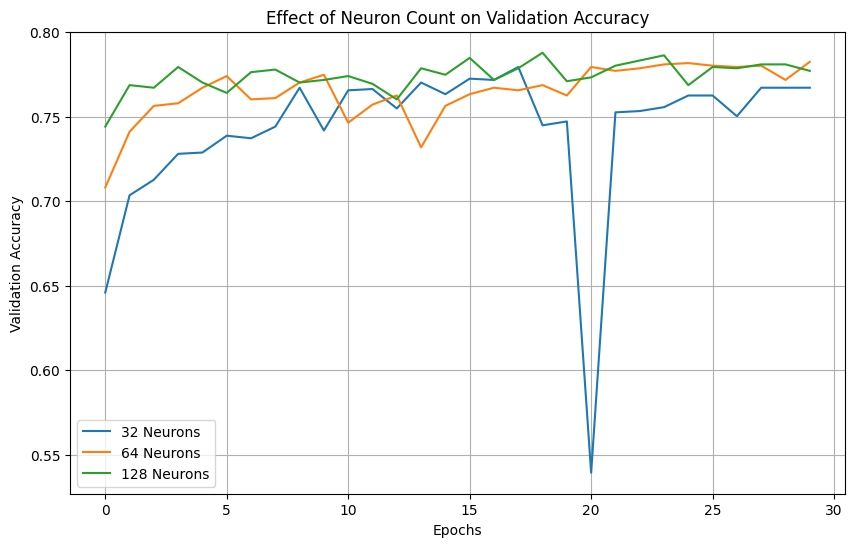

In [191]:
plt.figure(figsize=(10, 6))

# Loop through your results and plot a line for each neuron count
for i, acc_history in enumerate(val_acc_arr):
    # i is the index (0, 1, 2), acc_history is the list of accuracies
    plt.plot(acc_history, label=f'{neurons_n[i]} Neurons')

plt.title('Effect of Neuron Count on Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [136]:
# Activation function check

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

activations = ['relu', 'tanh']

val_acc_arr = []

for func in activations:
  model = keras.Sequential()
  model.add(layers.Input(shape=(X_train.shape[1],))) # Input layer for 28x28 flattened images
  model.add(layers.Dense(32, activation=func)) # A single fully connected hidden layer with 32 neurons
  model.add(layers.Dense(1, activation='sigmoid')) # Output layer for 10 classes

  model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

  history = model.fit(X_train, y_train, epochs=30,batch_size=32, validation_split=0.2, verbose=1)

  val_acc_arr.append(history.history['val_accuracy'])

Epoch 1/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5537 - loss: 109.3617 - val_accuracy: 0.6429 - val_loss: 9.0371
Epoch 2/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6972 - loss: 9.1268 - val_accuracy: 0.7410 - val_loss: 6.7918
Epoch 3/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7175 - loss: 5.6548 - val_accuracy: 0.7073 - val_loss: 7.1228
Epoch 4/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7303 - loss: 4.5279 - val_accuracy: 0.7203 - val_loss: 3.3856
Epoch 5/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7199 - loss: 2.7403 - val_accuracy: 0.7724 - val_loss: 2.6063
Epoch 6/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7149 - loss: 2.6650 - val_accuracy: 0.6628 - val_loss: 3.8058
Epoch 7/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7275 - loss: 3.7031 - val_accuracy: 0.5893 - val_loss: 3.5089
Epoch 8/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7157 - loss: 2.6623 - val_accuracy: 

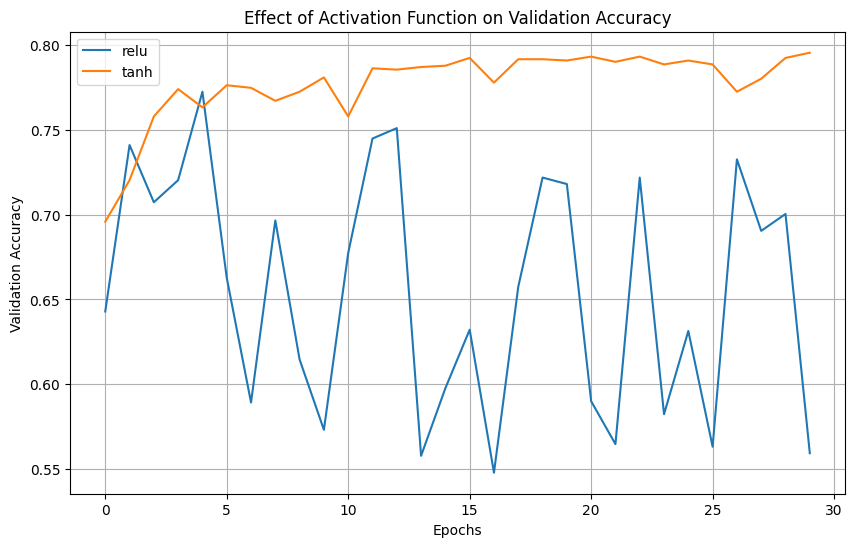

In [137]:
plt.figure(figsize=(10, 6))

# Loop through your results and plot a line for each neuron count
for i, acc_history in enumerate(val_acc_arr):
    # i is the index (0, 1, 2), acc_history is the list of accuracies
    plt.plot(acc_history, label=activations[i])

plt.title('Effect of Activation Function on Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [138]:
optimizers = ['adam', 'sgd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

val_acc_arr = []

for opt in optimizers:
  model = keras.Sequential()
  model.add(layers.Input(shape=(X_train.shape[1],)))
  model.add(layers.Dense(32, activation='tanh')) # A single fully connected hidden layer with 32 neurons
  model.add(layers.Dense(1, activation='sigmoid'))

  model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

  history = model.fit(X_train, y_train, epochs=30,batch_size=32, validation_split=0.3, verbose=1)

  val_acc_arr.append(history.history['val_accuracy'])

Epoch 1/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4977 - loss: 0.7444 - val_accuracy: 0.6352 - val_loss: 0.6582
Epoch 2/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6534 - loss: 0.6534 - val_accuracy: 0.7046 - val_loss: 0.6098
Epoch 3/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7136 - loss: 0.6065 - val_accuracy: 0.7251 - val_loss: 0.5929
Epoch 4/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7128 - loss: 0.5967 - val_accuracy: 0.7098 - val_loss: 0.5930
Epoch 5/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7079 - loss: 0.5915 - val_accuracy: 0.7276 - val_loss: 0.5784
Epoch 6/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7356 - loss: 0.5704 - val_accuracy: 0.7312 - val_loss: 0.5651
Epoch 7/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7300 - loss: 0.5716 - val_accuracy: 0.7445 - val_loss: 0.5480
Epoch 8/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7644 - loss: 0.5389 - val_accuracy: 0

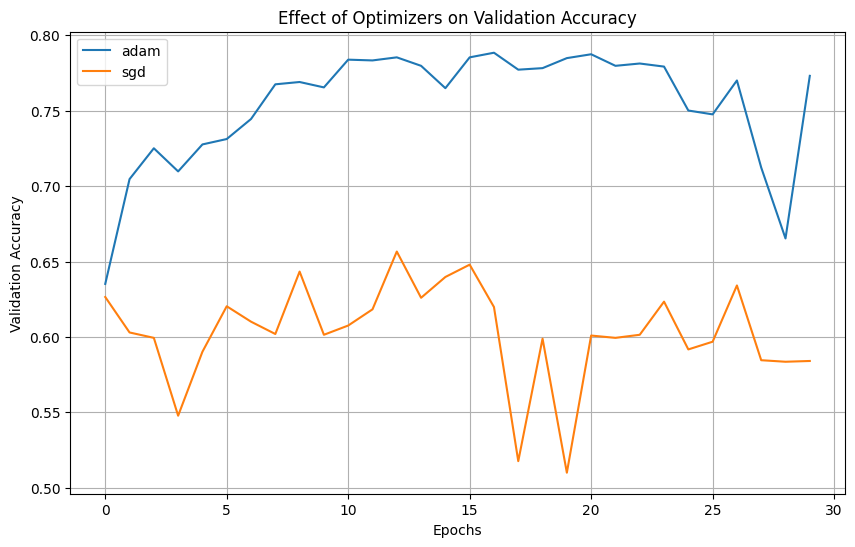

In [139]:
plt.figure(figsize=(10, 6))

# Loop through your results and plot a line for each neuron count
for i, acc_history in enumerate(val_acc_arr):
    # i is the index (0, 1, 2), acc_history is the list of accuracies
    plt.plot(acc_history, label=optimizers[i])

plt.title('Effect of Optimizers on Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [140]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]

val_acc_arr = []

for lr in learning_rates:
  model = keras.Sequential()
  model.add(layers.Input(shape=(X_train.shape[1],)))
  model.add(layers.Dense(32, activation='tanh'))
  model.add(layers.Dense(1, activation='sigmoid'))

  opt = keras.optimizers.Adam(learning_rate=lr)

  model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

  history = model.fit(X_train, y_train, epochs=30,batch_size=32, validation_split=0.3, verbose=1)

  val_acc_arr.append(history.history['val_accuracy'])

Epoch 1/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5487 - loss: 0.7490 - val_accuracy: 0.4941 - val_loss: 0.7326
Epoch 2/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5623 - loss: 0.6957 - val_accuracy: 0.6091 - val_loss: 0.7383
Epoch 3/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5839 - loss: 0.6814 - val_accuracy: 0.7368 - val_loss: 0.5720
Epoch 4/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5349 - loss: 0.7256 - val_accuracy: 0.5422 - val_loss: 0.6839
Epoch 5/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5324 - loss: 0.7011 - val_accuracy: 0.4967 - val_loss: 0.7037
Epoch 6/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5547 - loss: 0.6914 - val_accuracy: 0.6689 - val_loss: 0.6235
Epoch 7/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5829 - loss: 0.6983 - val_accuracy: 0.5309 - val_loss: 0.7291
Epoch 8/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5157 - loss: 0.7467 - val_accuracy: 0

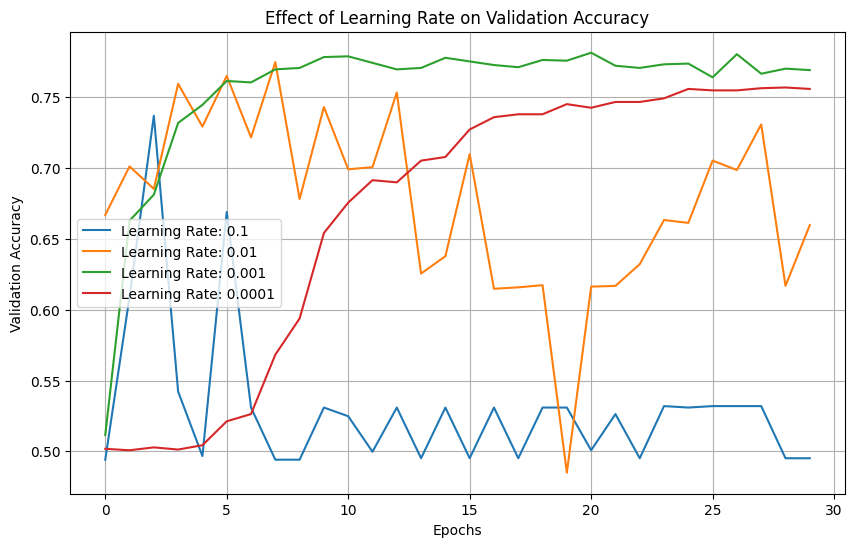

In [141]:
plt.figure(figsize=(10, 6))

# Loop through your results and plot a line for each neuron count
for i, acc_history in enumerate(val_acc_arr):
    # i is the index (0, 1, 2), acc_history is the list of accuracies
    plt.plot(acc_history, label=f'Learning Rate: {learning_rates[i]}')

plt.title('Effect of Learning Rate on Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [142]:
# Batch Size check

batch_sizes = [8, 16, 32, 64, 128]

val_acc_arr = []

for size in batch_sizes:
  model = keras.Sequential()
  model.add(layers.Input(shape=(X_train.shape[1],))) # Input layer for 28x28 flattened images
  model.add(layers.Dense(32, activation='tanh')) # A single fully connected hidden layer with 32 neurons
  model.add(layers.Dense(1, activation='sigmoid')) # Output layer for 10 classes

  model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])

  history = model.fit(X_train, y_train, epochs=30,batch_size=size, validation_split=0.3, verbose=1)

  val_acc_arr.append(history.history['val_accuracy'])

Epoch 1/30
571/571 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5530 - loss: 0.7334 - val_accuracy: 0.7563 - val_loss: 0.5306
Epoch 2/30
571/571 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7465 - loss: 0.5392 - val_accuracy: 0.7757 - val_loss: 0.5132
Epoch 3/30
571/571 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7795 - loss: 0.5061 - val_accuracy: 0.7665 - val_loss: 0.5226
Epoch 4/30
571/571 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7761 - loss: 0.5162 - val_accuracy: 0.7624 - val_loss: 0.5040
Epoch 5/30
571/571 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7758 - loss: 0.4907 - val_accuracy: 0.7660 - val_loss: 0.5090
Epoch 6/30
571/571 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7682 - loss: 0.4985 - val_accuracy: 0.7701 - val_loss: 0.5200
Epoch 7/30
571/571 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7800 - loss: 0.4980 - val_accuracy: 0.7823 - val_loss: 0.4821
Epoch 8/30
571/571 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7710 - loss: 0.5081 - val_accuracy: 0.

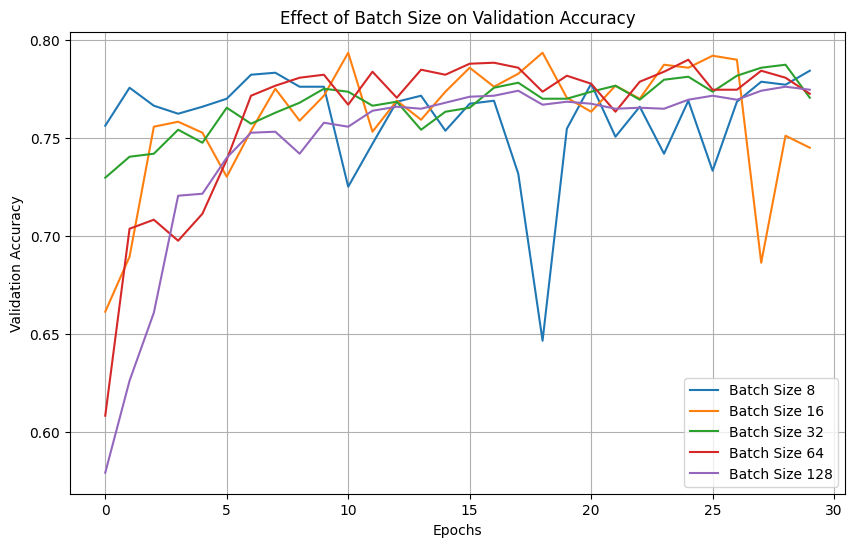

In [143]:
plt.figure(figsize=(10, 6))

# Loop through your results and plot a line for each neuron count
for i, acc_history in enumerate(val_acc_arr):
    # i is the index (0, 1, 2), acc_history is the list of accuracies
    plt.plot(acc_history, label=f'Batch Size {batch_sizes[i]}')

plt.title('Effect of Batch Size on Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [197]:
# Best Model - A model built using the params with the best validation accuracy and convergence times

model = keras.Sequential()
model.add(layers.Input(shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1, activation='sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,batch_size=8, validation_split=0.3, verbose=1)

Epoch 1/30
571/571 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6413 - loss: 0.6522 - val_accuracy: 0.7501 - val_loss: 0.5443
Epoch 2/30
571/571 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7014 - loss: 0.5812 - val_accuracy: 0.7598 - val_loss: 0.5331
Epoch 3/30
571/571 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7124 - loss: 0.5723 - val_accuracy: 0.7532 - val_loss: 0.5346
Epoch 4/30
571/571 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7009 - loss: 0.5690 - val_accuracy: 0.7312 - val_loss: 0.5443
Epoch 5/30
571/571 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7055 - loss: 0.5665 - val_accuracy: 0.7578 - val_loss: 0.5369
Epoch 6/30
571/571 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7145 - loss: 0.5530 - val_accuracy: 0.7460 - val_loss: 0.5339
Epoch 7/30
571/571 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7237 - loss: 0.5565 - val_accuracy: 0.7890 - val_loss: 0.4961
Epoch 8/30
571/571 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7318 - loss: 0.5439 - val_accuracy: 0.

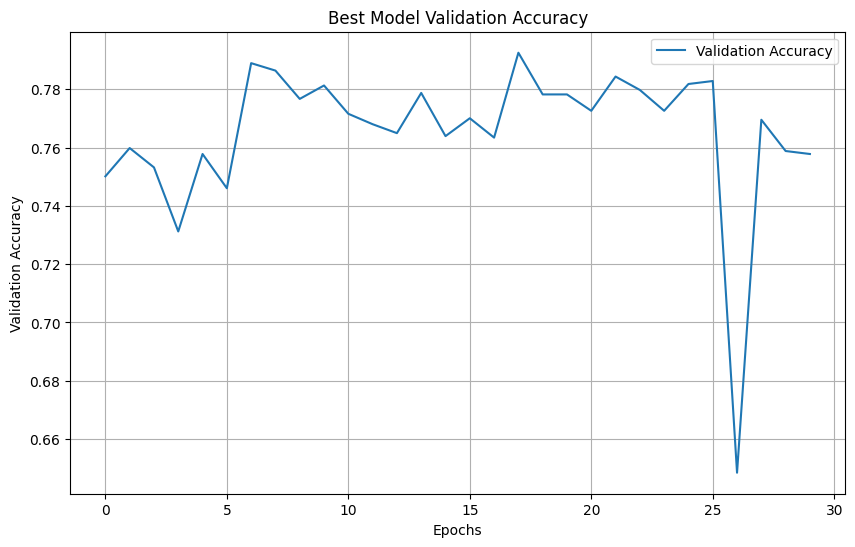

In [198]:
plt.figure(figsize=(10, 6))

# Plot Validation Accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Best Model Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


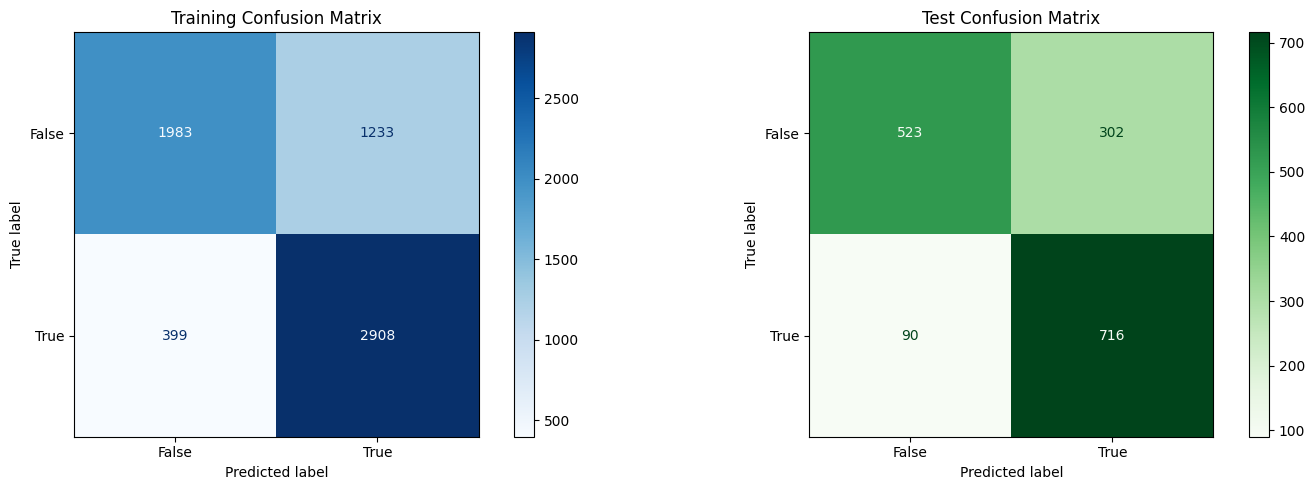

Training Accuracy: 0.7498
Test Accuracy:     0.7597


In [199]:
# 1. Get predictions 
# Since output is a probability (0 to 1), we threshold at 0.5 to get 0 or 1
y_train_pred = (model.predict(X_train) > 0.5).astype("int32")
y_test_pred  = (model.predict(X_test) > 0.5).astype("int32")

# 2. Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# --- Plot Training Confusion Matrix ---
cm_train = confusion_matrix(y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['False', 'True'])
disp_train.plot(cmap='Blues', ax=ax1)
ax1.set_title('Training Confusion Matrix')

# --- Plot Test Confusion Matrix ---
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['False', 'True'])
disp_test.plot(cmap='Greens', ax=ax2) 
ax2.set_title('Test Confusion Matrix')

plt.tight_layout()
plt.show()

# Calculate accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Print the stats
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:     {test_acc:.4f}")

## XGBoost

In [147]:
folds = 30

accuracy_arr_train = []
accuracy_arr_test = []

for i in range(folds):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    model = XGBClassifier()
    
    # 2. Fit the model (same as sklearn)
    model.fit(X_train, y_train)
    
    # 3. Get predictions
    # XGBClassifier returns 0s and 1s directly, so no thresholding needed
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # 4. Calculate Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    accuracy_arr_train.append(train_acc)
    accuracy_arr_test.append(test_acc)

print(f"Mean Training Accuracy: {np.mean(accuracy_arr_train):.4f}")
print(f"Mean Test Accuracy:     {np.mean(accuracy_arr_test):.4f}")

Mean Training Accuracy: 0.9439
Mean Test Accuracy:     0.8026


### n_estimators - Cross Validation

In [148]:
x_axis_estimators = []

accuracy_mean_estimators_train = []
accuracy_mean_estimators_test = []

folds = 30

for estimators in range(2,101):

    accuracy_arr_estimators_train = []
    accuracy_arr_estimators_test = []
    
    for i in range(folds):
        # Split into training and testing sets (80% train, 20% test)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
        # 3. Train the Random Forest Classifier
        model = XGBClassifier(n_estimators=estimators)
        model.fit(X_train, y_train)
        
        # 4. Evaluate the model
    
        train_y_pred = model.predict(X_train)
        train_accuracy = accuracy_score(y_train, train_y_pred)
        
        test_y_pred = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_y_pred)

        accuracy_arr_estimators_train.append(train_accuracy)
        accuracy_arr_estimators_test.append(test_accuracy)

    accuracy_mean_estimators_train.append(np.mean(accuracy_arr_estimators_train))
    accuracy_mean_estimators_test.append(np.mean(accuracy_arr_estimators_test))

    x_axis_estimators.append(estimators)

best_estimators = np.argmax(accuracy_mean_estimators_test) + 2
print('Best Estimators:', best_estimators)
print('Accuracies Test:', np.array(accuracy_mean_estimators_test))

Best Estimators: 46
Accuracies Test: [0.78027795 0.78258737 0.78324137 0.79249949 0.79160025 0.79121194
 0.79264255 0.79722052 0.79883507 0.79444104 0.80069487 0.79673002
 0.80008175 0.79969344 0.8016963  0.80296342 0.8012058  0.80263642
 0.80472103 0.80024525 0.79899857 0.8025138  0.80365829 0.80398529
 0.8040466  0.8013693  0.80028612 0.80453709 0.79948907 0.80098099
 0.80006131 0.80437359 0.80042918 0.80333129 0.80486409 0.80480278
 0.7984672  0.8020233  0.80380135 0.79973431 0.79938688 0.80034744
 0.80398529 0.80468016 0.80627427 0.80071531 0.79675046 0.80263642
 0.80132843 0.80228898 0.79787451 0.80149193 0.79981606 0.80067443
 0.80517065 0.80349479 0.79955038 0.80155324 0.80094012 0.80208461
 0.79844676 0.79783364 0.79914163 0.8054159  0.80069487 0.80357654
 0.80257511 0.80261598 0.80028612 0.79993869 0.80040875 0.8033926
 0.80147149 0.80087881 0.80347435 0.80175761 0.79993869 0.80292254
 0.80510934 0.80110362 0.80245248 0.79993869 0.80257511 0.79895769
 0.80106274 0.8013693  0.7

### max_depth - Cross Validation

In [149]:
x_axis_depths = []

accuracy_mean_depth_train = []
accuracy_mean_depth_test = []

folds = 30

for depth in range(2,11):
    
    accuracy_arr_train = []
    accuracy_arr_test = []
    
    for i in range(folds):
        # Split into training and testing sets (80% train, 20% test)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
        # 3. Train the Random Forest Classifier
        model = XGBClassifier(max_depth=depth)
        model.fit(X_train, y_train)
        
        # 4. Evaluate the model
    
        train_y_pred = model.predict(X_train)
        train_accuracy = accuracy_score(y_train, train_y_pred)
        
        test_y_pred = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_y_pred)

        accuracy_arr_train.append(train_accuracy)
        accuracy_arr_test.append(test_accuracy)

    x_axis_depths.append(depth)
        
    accuracy_mean_depth_train.append(np.mean(accuracy_arr_train))
    accuracy_mean_depth_test.append(np.mean(accuracy_arr_test))

best_depth = np.argmax(accuracy_mean_depth_test) + 2
print('Best Depth:', best_depth)
print('Accuracies Test:', np.array(accuracy_mean_depth_test))

Best Depth: 3
Accuracies Test: [0.79803801 0.80457797 0.8025138  0.8021868  0.80130799 0.79771102
 0.79742489 0.79971388 0.79738402]


### learning_rate - Cross Validation

In [150]:
x_axis_depths = []

accuracy_mean_lr_train = []
accuracy_mean_lr_test = []

learning_rates = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]

folds = 30

for lr in learning_rates:
    
    accuracy_arr_train = []
    accuracy_arr_test = []
    
    for i in range(folds):
        # Split into training and testing sets (80% train, 20% test)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
        # 3. Train the Random Forest Classifier
        model = XGBClassifier(learning_rate=lr)
        model.fit(X_train, y_train)
        
        # 4. Evaluate the model
    
        train_y_pred = model.predict(X_train)
        train_accuracy = accuracy_score(y_train, train_y_pred)
        
        test_y_pred = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_y_pred)

        accuracy_arr_train.append(train_accuracy)
        accuracy_arr_test.append(test_accuracy)

    x_axis_depths.append(depth)
        
    accuracy_mean_lr_train.append(np.mean(accuracy_arr_train))
    accuracy_mean_lr_test.append(np.mean(accuracy_arr_test))

best_index = np.argmax(accuracy_mean_lr_test)
best_lr = learning_rates[best_index]
print('Best Learning Rate:', best_lr)
print('Accuracies Test:', np.array(accuracy_mean_lr_test))

Best Learning Rate: 0.1
Accuracies Test: [0.80553852 0.8012058  0.78432455 0.78313918 0.77492336 0.77296137
 0.60100143]


### Complete (n_estimators, max_depth, learning_rate) - Cross Validation

In [151]:
x_axis_estimators = []

accuracy_mean_train = []
accuracy_mean_test = []

estimators_list = list(range(2, 101, 5))
depth_list = list(range(2, 6))
learning_rates = [0.1, 0.01, 0.001]

folds = 5

for estimators in estimators_list:
    for depth in depth_list:
        for lr in learning_rates:

            accuracy_arr_train = []
            accuracy_arr_test = []
            
            for i in range(folds):
                # Split into training and testing sets (80% train, 20% test)
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
                
                # 3. Train the Random Forest Classifier
                model = XGBClassifier(n_estimators=estimators, max_depth=depth, learning_rate=lr)
                model.fit(X_train, y_train)
                
                # 4. Evaluate the model
            
                train_y_pred = model.predict(X_train)
                train_accuracy = accuracy_score(y_train, train_y_pred)
                
                test_y_pred = model.predict(X_test)
                test_accuracy = accuracy_score(y_test, test_y_pred)
        
                accuracy_arr_train.append(train_accuracy)
                accuracy_arr_test.append(test_accuracy)

            accuracy_mean_train.append(np.mean(accuracy_arr_train))
            accuracy_mean_test.append(np.mean(accuracy_arr_test))

    x_axis_estimators.append(estimators)

In [152]:
num_lrs = len(learning_rates)
num_depths = len(depth_list)

best_idx = np.argmax(accuracy_mean_test)

# 1. Inner Loop (Learning Rate) changes fastest
best_lr_idx = best_idx % num_lrs

# 2. Middle Loop (Depth)
best_depth_idx = (best_idx // num_lrs) % num_depths

# 3. Outer Loop (Estimators) changes slowest
best_est_idx = best_idx // (num_lrs * num_depths)

# Retrieve values
best_lr = learning_rates[best_lr_idx]
best_depth = depth_list[best_depth_idx]
best_est = estimators_list[best_est_idx]

print(f'Best Params:\nLearning Rate={best_lr}\nMax Depth={best_depth}\nEstimators={best_est}')
print('Best Accuracy Test:', np.array(accuracy_mean_test[best_idx]))

Best Params:
Learning Rate=0.1
Max Depth=4
Estimators=87
Best Accuracy Test: 0.8133660331085224


In [185]:
folds = 30

accuracy_arr_train = []
accuracy_arr_test = []

for i in range(folds):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    model = XGBClassifier(
        n_estimators=87, 
        max_depth=4,
        learning_rate=0.1
    )
    
    # 2. Fit the model (same as sklearn)
    model.fit(X_train, y_train)
    
    # 3. Get predictions
    # XGBClassifier returns 0s and 1s directly, so no thresholding needed
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # 4. Calculate Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    accuracy_arr_train.append(train_acc)
    accuracy_arr_test.append(test_acc)

print(f"Mean Training Accuracy: {np.mean(accuracy_arr_train):.4f}")
print(f"Mean Test Accuracy:     {np.mean(accuracy_arr_test):.4f}")

# This prints Precision, Recall, F1, and Accuracy all in one table
print(classification_report(y_test, y_test_pred)) 

Mean Training Accuracy: 0.8341
Mean Test Accuracy:     0.8022
              precision    recall  f1-score   support

         0.0       0.79      0.82      0.81       804
         1.0       0.82      0.79      0.81       827

    accuracy                           0.81      1631
   macro avg       0.81      0.81      0.81      1631
weighted avg       0.81      0.81      0.81      1631



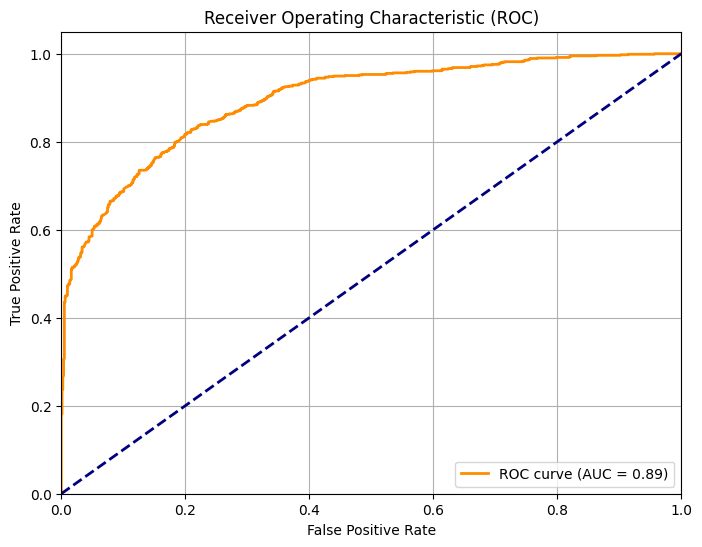

In [154]:
# 1. Get probabilities for the positive class (class 1)
# We use the last X_test/y_test from your loop
y_probs = model.predict_proba(X_test)[:, 1]

# 2. Calculate FPR, TPR, and Thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# 3. Calculate Area Under Curve (AUC) for the label
roc_auc = auc(fpr, tpr)

# 4. Plot the Graph
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

# Plot the "Random Guess" line (diagonal)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Labels and Title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Clustering

## EDA

In [177]:
(X, y), (_, _) = keras.datasets.mnist.load_data()

print("Train size:", X.shape)
print("Image shape:", X[0].shape)
print("Number of classes:", len(np.unique(y)))

for i in range(10):
    
    mask = (y == i)
    all_labels_of_i_count = len(y[mask])
    
    print(f'Percentage of label {i}: {all_labels_of_i_count/X.shape[0] * 100}%')

Train size: (60000, 28, 28)
Image shape: (28, 28)
Number of classes: 10
Percentage of label 0: 9.871666666666666%
Percentage of label 1: 11.236666666666666%
Percentage of label 2: 9.93%
Percentage of label 3: 10.218333333333334%
Percentage of label 4: 9.736666666666666%
Percentage of label 5: 9.035%
Percentage of label 6: 9.863333333333333%
Percentage of label 7: 10.441666666666666%
Percentage of label 8: 9.751666666666667%
Percentage of label 9: 9.915000000000001%


Shape: (28, 28)
Label: 5


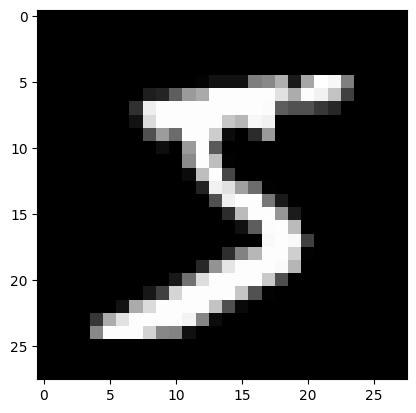

In [178]:
plt.imshow(X[0], cmap='gray')
print('Shape:', X[0].shape)
print('Label:', y[0])

In [179]:
X_flat = X.reshape(X.shape[0], -1)

In [180]:
df_X = pd.DataFrame(X_flat)
df_y = pd.DataFrame(y)

In [181]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, 0 to 783
dtypes: uint8(784)
memory usage: 44.9 MB


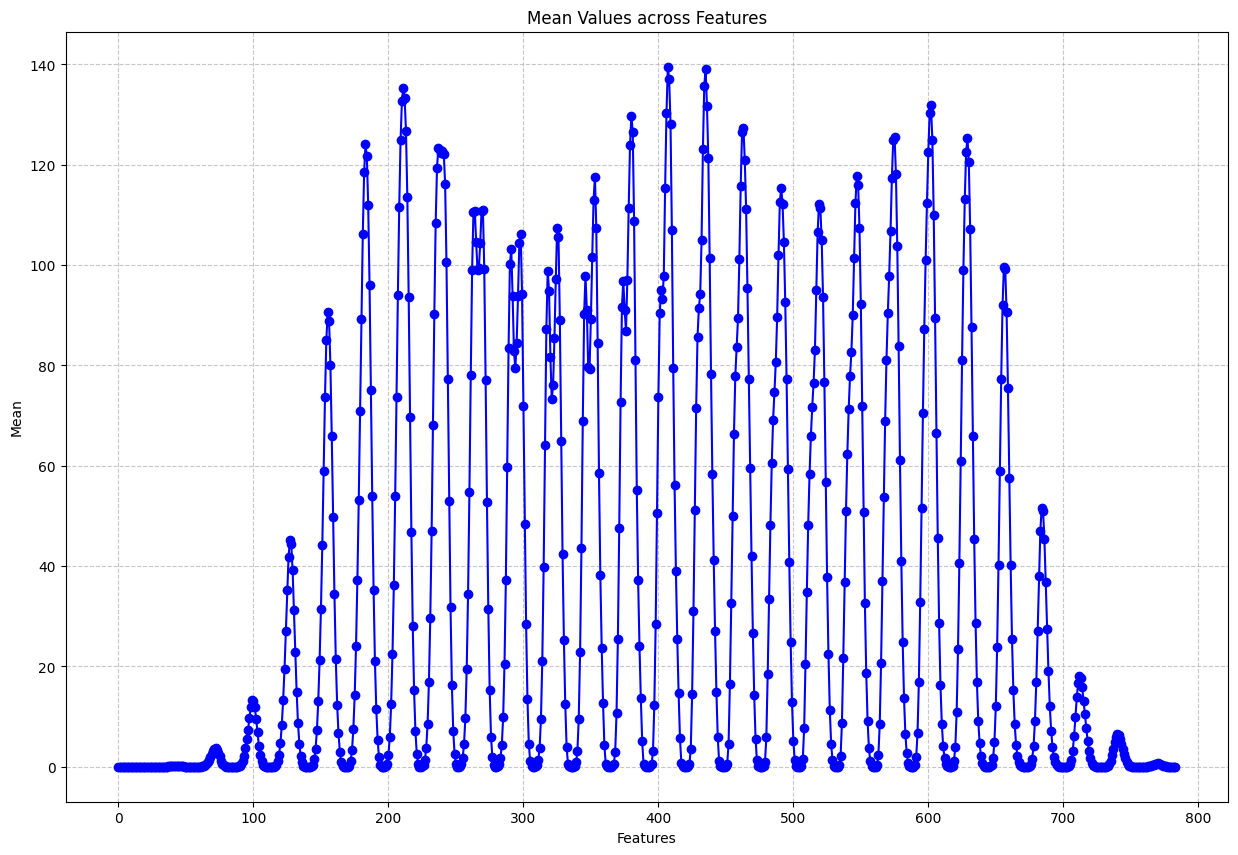

In [160]:
# 1. Extract the mean row
means = df_X.describe().loc['mean']

# 2. Plot as a line chart
plt.figure(figsize=(15, 10))
plt.plot(means.index, means.values, marker='o', linestyle='-', color='blue')

# 3. Add formatting
plt.title('Mean Values across Features')
plt.xlabel('Features')
plt.ylabel('Mean')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

## K-Means

In [161]:
classes_num = len(np.unique(y))
kmeans = KMeans(n_clusters=classes_num, random_state=0, n_init="auto").fit(X_flat)

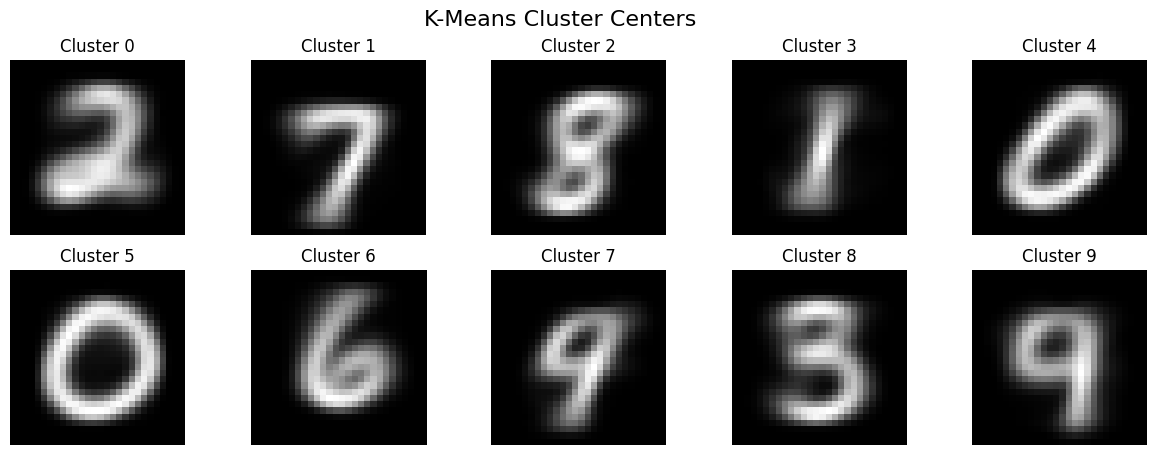

In [162]:
centers = kmeans.cluster_centers_

centers = centers.reshape(10, 28, 28)

plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centers[i], cmap='gray')
    plt.title(f"Cluster {i}")
    plt.axis('off')

plt.suptitle("K-Means Cluster Centers", fontsize=16)
plt.show()

In [163]:
true_labels = []

labels = kmeans.labels_

for cluster_id in range(classes_num):
    
    cluster_labels = y[kmeans.labels_ == cluster_id]

    vals, counts = np.unique(cluster_labels, return_counts=True)

    max_count_index = np.argmax(counts)

    most_frequent_label = vals[max_count_index]

    true_labels.append(most_frequent_label)


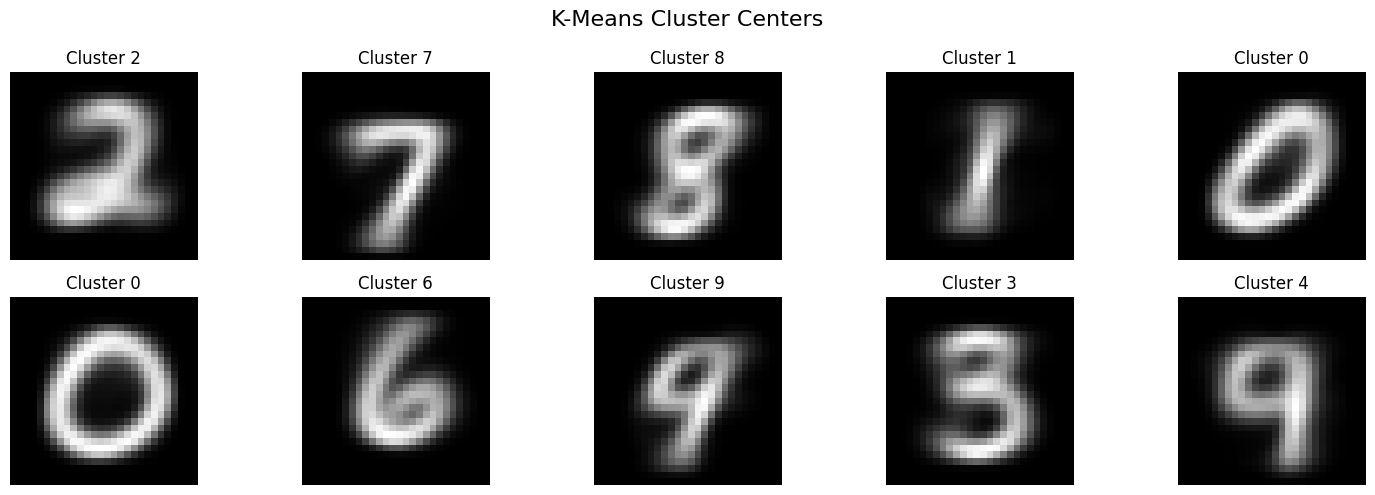

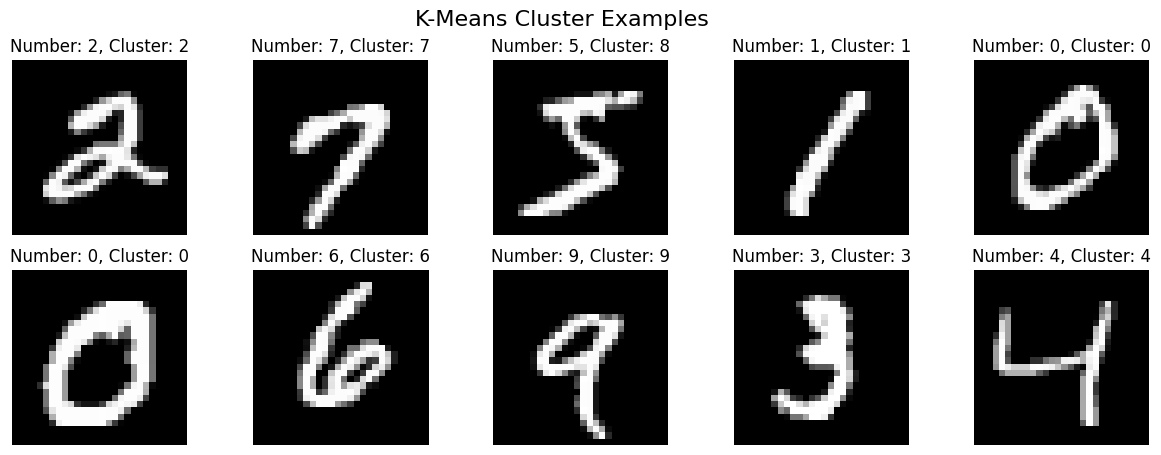

In [164]:
centers = kmeans.cluster_centers_

centers = centers.reshape(10, 28, 28)

plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centers[i], cmap='gray')
    plt.title(f"Cluster {true_labels[i]}")
    plt.axis('off')

plt.suptitle("K-Means Cluster Centers", fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
for i in range(10):

    mask = (labels == i) 

    # Apply the mask to X to get ALL images of that number
    all_images_of_i = X[mask] 
    all_labels_of_i = y[mask]
    
    # Pick the first image from that filtered list
    example_image = all_images_of_i[0]
    example_label = all_labels_of_i[0]
    
    plt.subplot(2, 5, i + 1)
    plt.imshow(example_image, cmap='gray')
    plt.title(f"Number: {example_label}, Cluster: {true_labels[i]}")
    plt.axis('off')

plt.suptitle("K-Means Cluster Examples", fontsize=16)
plt.show()

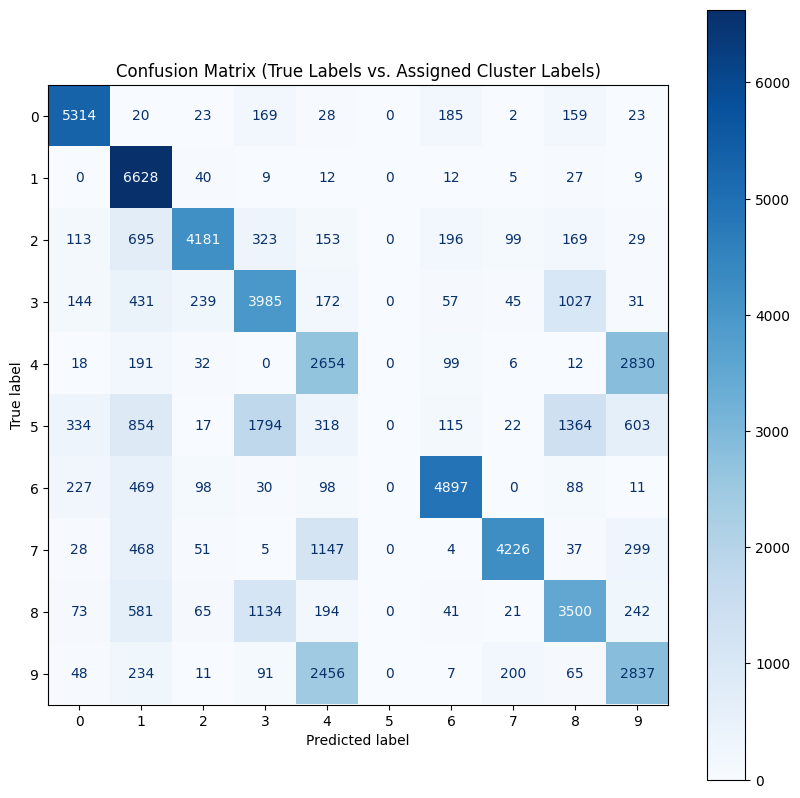

Classification Report for GMM:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      5923
           1       0.63      0.98      0.77      6742
           2       0.88      0.70      0.78      5958
           3       0.53      0.65      0.58      6131
           4       0.37      0.45      0.41      5842
           5       0.00      0.00      0.00      5421
           6       0.87      0.83      0.85      5918
           7       0.91      0.67      0.78      6265
           8       0.54      0.60      0.57      5851
           9       0.41      0.48      0.44      5949

    accuracy                           0.64     60000
   macro avg       0.60      0.63      0.60     60000
weighted avg       0.61      0.64      0.61     60000



In [165]:
y_pred = []

for cluster_id in labels:
    y_pred.append(true_labels[cluster_id])

y_pred = np.array(y_pred)

cm = confusion_matrix(y, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title("Confusion Matrix (True Labels vs. Assigned Cluster Labels)")
plt.show()

# Print the full report
print("Classification Report for GMM:")
print("-" * 60)
print(classification_report(y, y_pred))

## GMM

In [166]:
# Shrink data from 784 -> 50 dimensions (keeps 85%+ of info)
pca = PCA(n_components=50) 
X_pca = pca.fit_transform(X_flat)

In [167]:
warnings.filterwarnings("ignore")

n_classes = 10
n_snapshots = 5
max_iter = 50

gmm = GaussianMixture(n_components=n_classes, 
                      max_iter=1, 
                      warm_start=True,
                      random_state=42)

history_means = []
iterations_to_capture = [1, 10, 20, 30, 40, 50]

print("Training evolution...")

X_train_data = X_pca 

for i in range(max_iter):
    # Fit for just 1 iteration then stop
    gmm.fit(X_train_data)
    
    # Store the means if it's an iteration we care about
    if (i + 1) in iterations_to_capture:
        # Important: .copy() prevents storing a reference that changes later
        current_means = gmm.means_.copy()
        history_means.append(current_means)
        print(f"Captured iteration {i+1}")

print("Done.")

Training evolution...
Captured iteration 1
Captured iteration 10
Captured iteration 20
Captured iteration 30
Captured iteration 40
Captured iteration 50
Done.


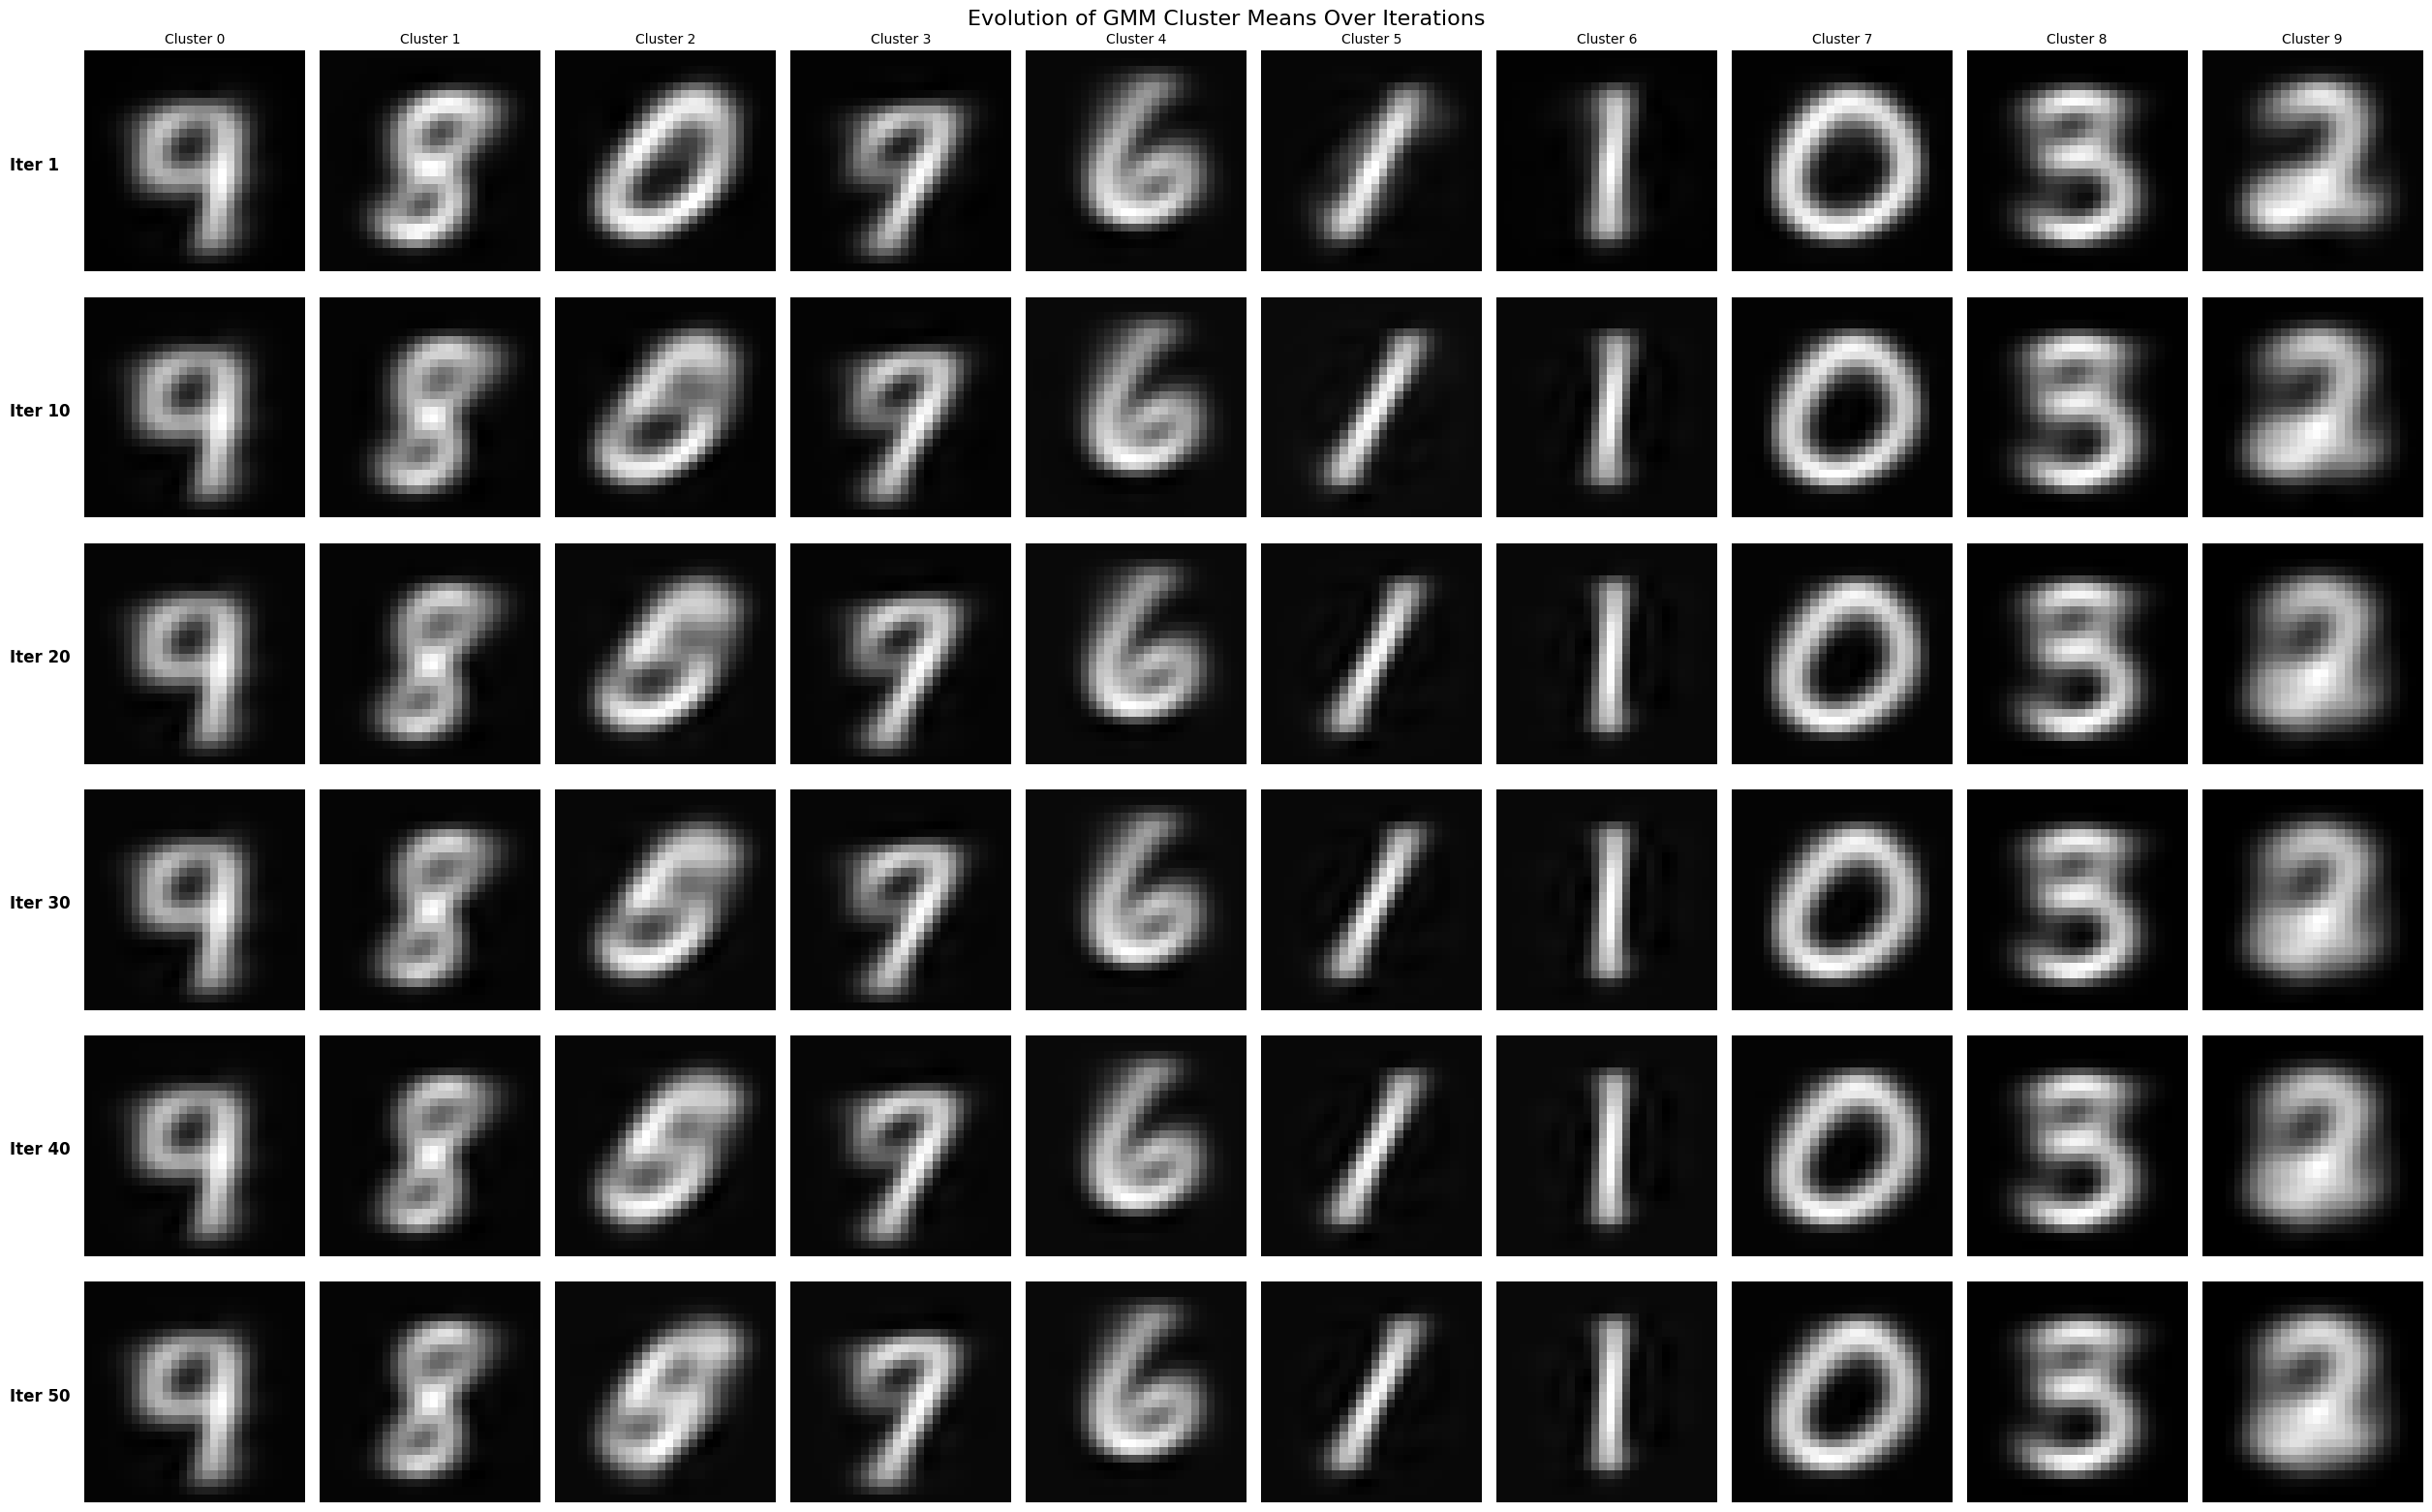

In [168]:
fig, axes = plt.subplots(len(history_means), 10, figsize=(25, 16))

for row_idx, means_snapshot in enumerate(history_means):
    
    centers = pca.inverse_transform(means_snapshot) 
    centers = centers.reshape(10, 28, 28)
    
    for col_idx in range(10):
        ax = axes[row_idx, col_idx]
        ax.imshow(centers[col_idx], cmap='gray')
        ax.axis('off')
        
        # Add labels only to the first row and first column
        if row_idx == 0:
            ax.set_title(f"Cluster {col_idx}", fontsize=10)
        if col_idx == 0:
            iter_num = iterations_to_capture[row_idx]
            ax.text(-10, 14, f"Iter {iter_num}", fontsize=12, fontweight='bold', va='center')

plt.suptitle("Evolution of GMM Cluster Means Over Iterations", fontsize=16)
plt.tight_layout()
plt.show()

Inverse transforming PCA means...


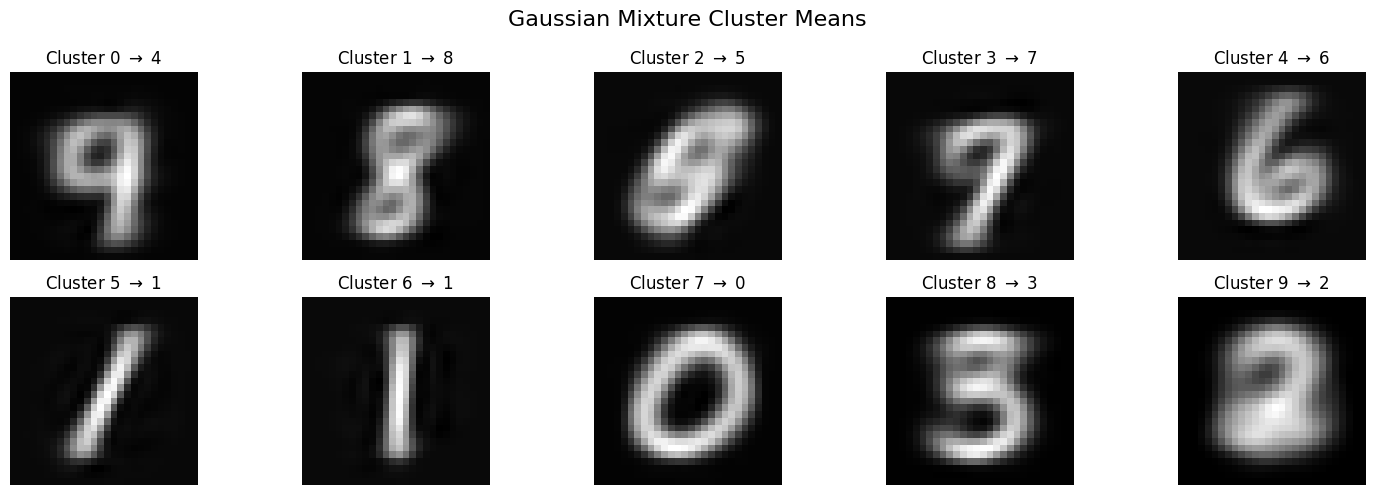

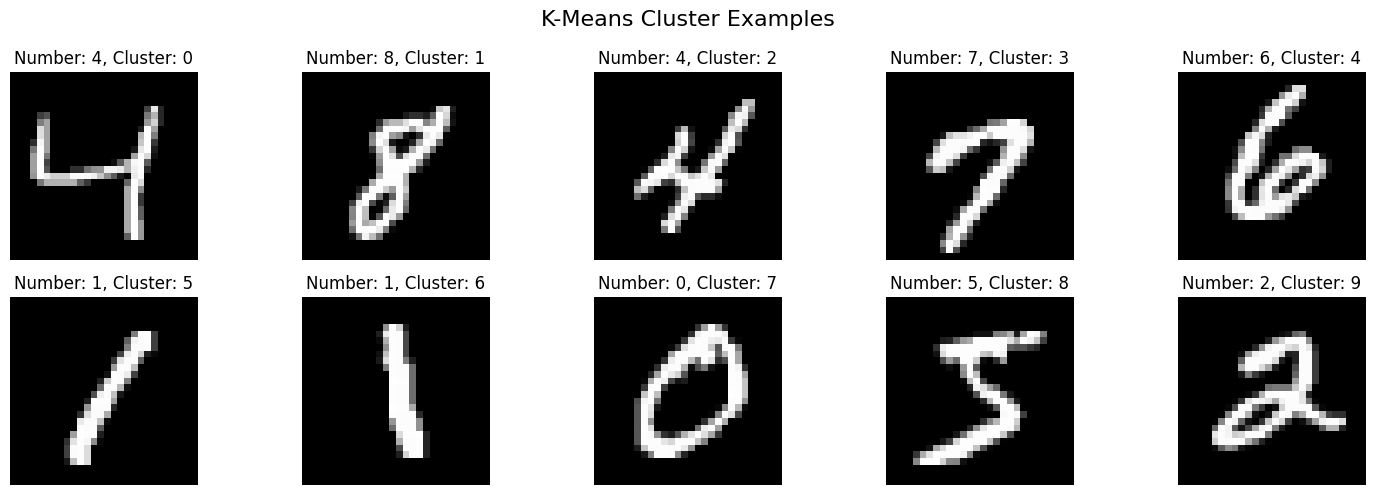

In [169]:
labels = gmm.predict(X_pca)

label_map = {}
for i in range(10):
    mask = (labels == i)
    true_digits = y[mask]
    most_frequent = np.bincount(true_digits).argmax()
    label_map[i] = most_frequent

y_pred_gmm = np.array([label_map[label] for label in labels])

if 'pca' in locals():
    print("Inverse transforming PCA means...")
    centers = pca.inverse_transform(gmm.means_)
else:
    centers = gmm.means_

centers = centers.reshape(10, 28, 28)

plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centers[i], cmap='gray')
    
    mapped_digit = label_map[i]
    plt.title(f"Cluster {i} $\\rightarrow$ {mapped_digit}")
    plt.axis('off')

plt.suptitle("Gaussian Mixture Cluster Means", fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
for i in range(10):

    mask = (labels == i) 

    # Apply the mask to X to get ALL images of that number
    all_images_of_i = X[mask] 
    all_labels_of_i = y[mask]
    
    # Pick the first image from that filtered list
    example_image = all_images_of_i[0]
    example_label = all_labels_of_i[0]
    
    plt.subplot(2, 5, i + 1)
    plt.imshow(example_image, cmap='gray')
    plt.title(f"Number: {example_label}, Cluster: {labels[mask][i]}")
    plt.axis('off')

plt.suptitle("K-Means Cluster Examples", fontsize=16)

plt.tight_layout()
plt.show()

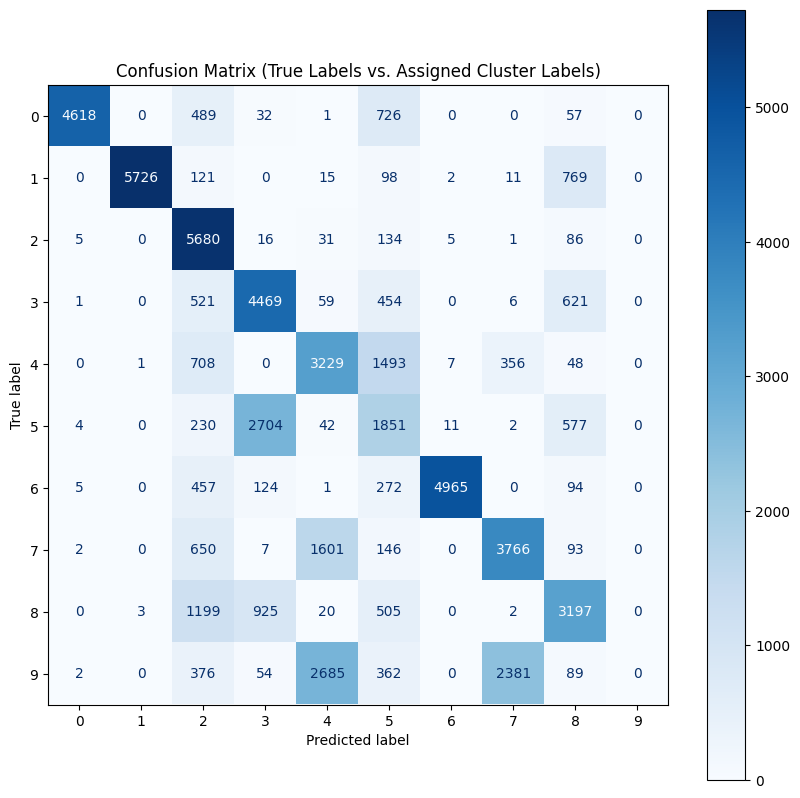

Classification Report for GMM:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.78      0.87      5923
           1       1.00      0.85      0.92      6742
           2       0.54      0.95      0.69      5958
           3       0.54      0.73      0.62      6131
           4       0.42      0.55      0.48      5842
           5       0.31      0.34      0.32      5421
           6       0.99      0.84      0.91      5918
           7       0.58      0.60      0.59      6265
           8       0.57      0.55      0.56      5851
           9       0.00      0.00      0.00      5949

    accuracy                           0.63     60000
   macro avg       0.59      0.62      0.60     60000
weighted avg       0.60      0.63      0.60     60000



In [170]:
cm = confusion_matrix(y, y_pred_gmm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title("Confusion Matrix (True Labels vs. Assigned Cluster Labels)")
plt.show()

# Print the full report
print("Classification Report for GMM:")
print("-" * 60)
print(classification_report(y, y_pred_gmm))

## K-Means - Again

In [171]:
classes_num = len(np.unique(y))
clusters_num = classes_num*3
kmeans = KMeans(n_clusters=clusters_num, random_state=0, n_init="auto").fit(X_flat) # 30 clusters

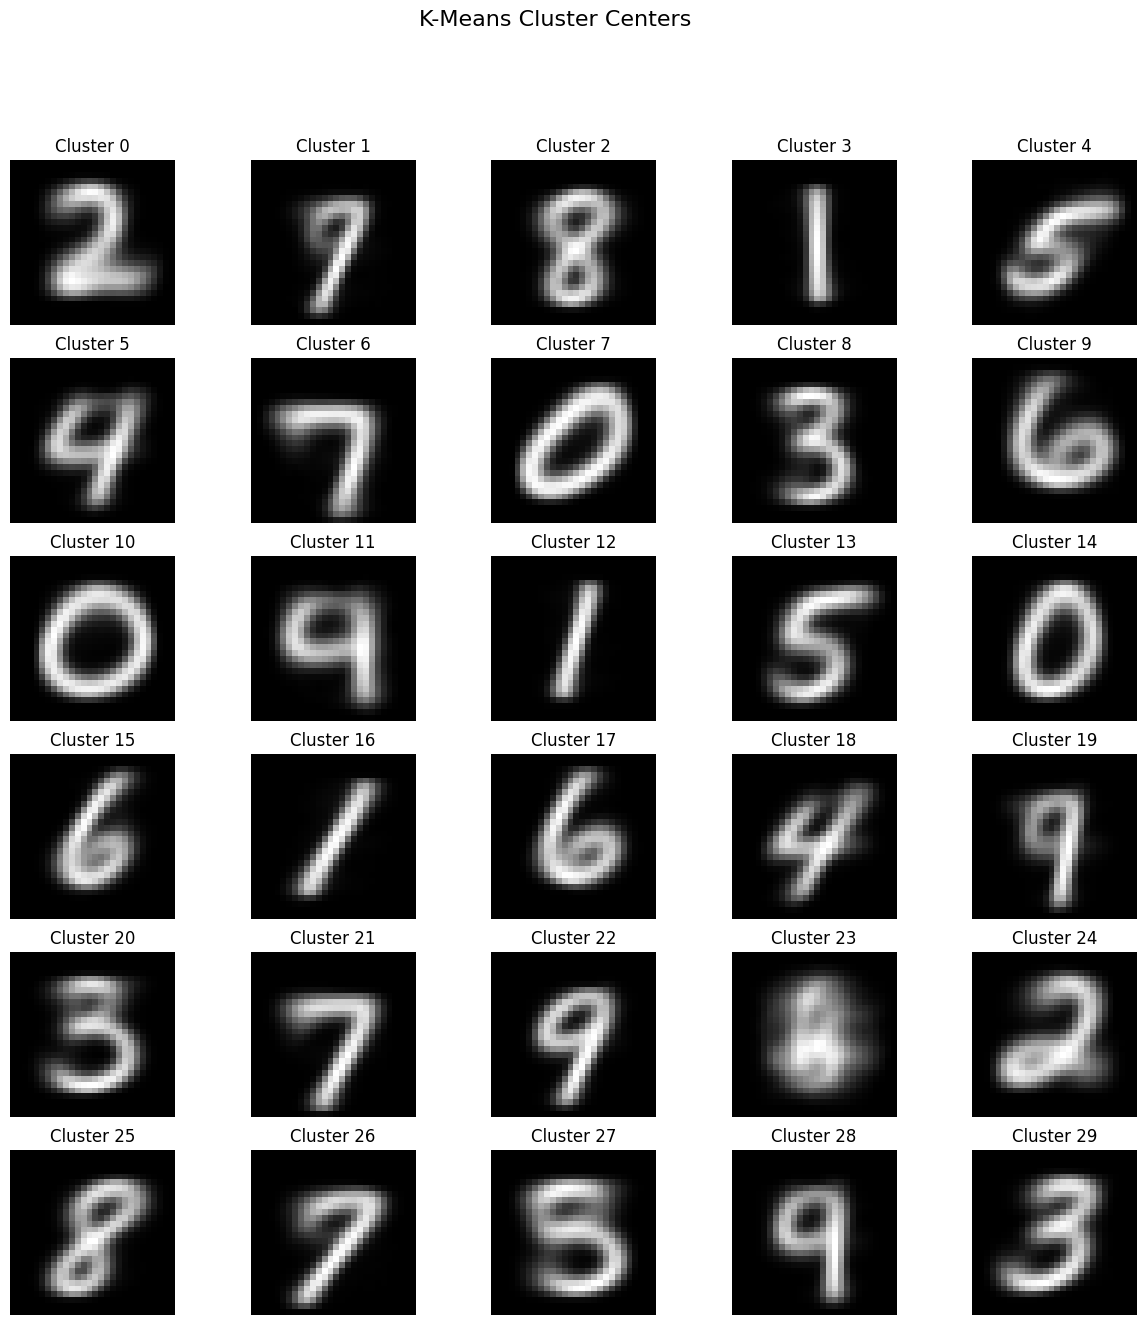

In [172]:
centers = kmeans.cluster_centers_

centers = centers.reshape(clusters_num, 28, 28)

plt.figure(figsize=(15, 15))
for i in range(clusters_num):
    plt.subplot(clusters_num // 5, 5, i + 1)
    plt.imshow(centers[i], cmap='gray')
    plt.title(f"Cluster {i}")
    plt.axis('off')

plt.suptitle("K-Means Cluster Centers", fontsize=16)
plt.show()

In [173]:
true_labels = []

labels = kmeans.labels_

for cluster_id in range(clusters_num):
    
    cluster_labels = y[kmeans.labels_ == cluster_id]

    vals, counts = np.unique(cluster_labels, return_counts=True)

    max_count_index = np.argmax(counts)

    most_frequent_label = vals[max_count_index]

    true_labels.append(most_frequent_label)


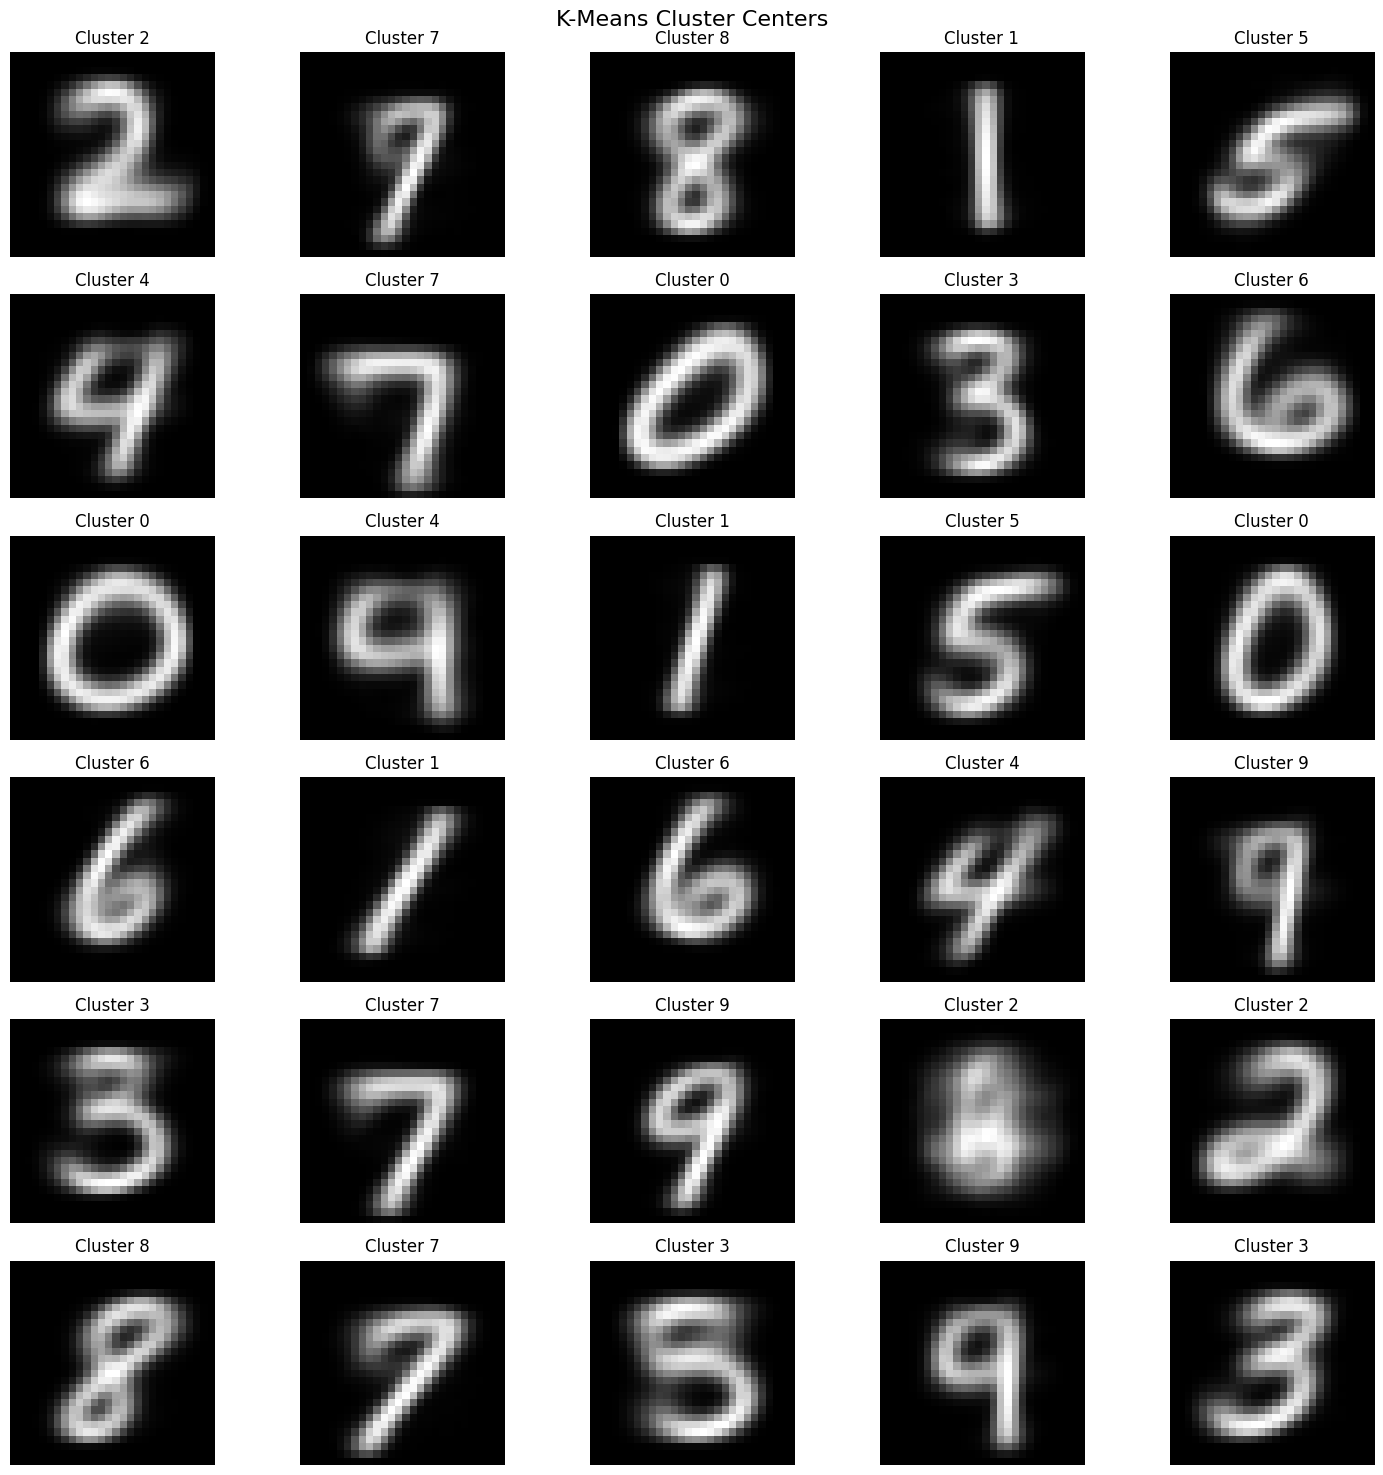

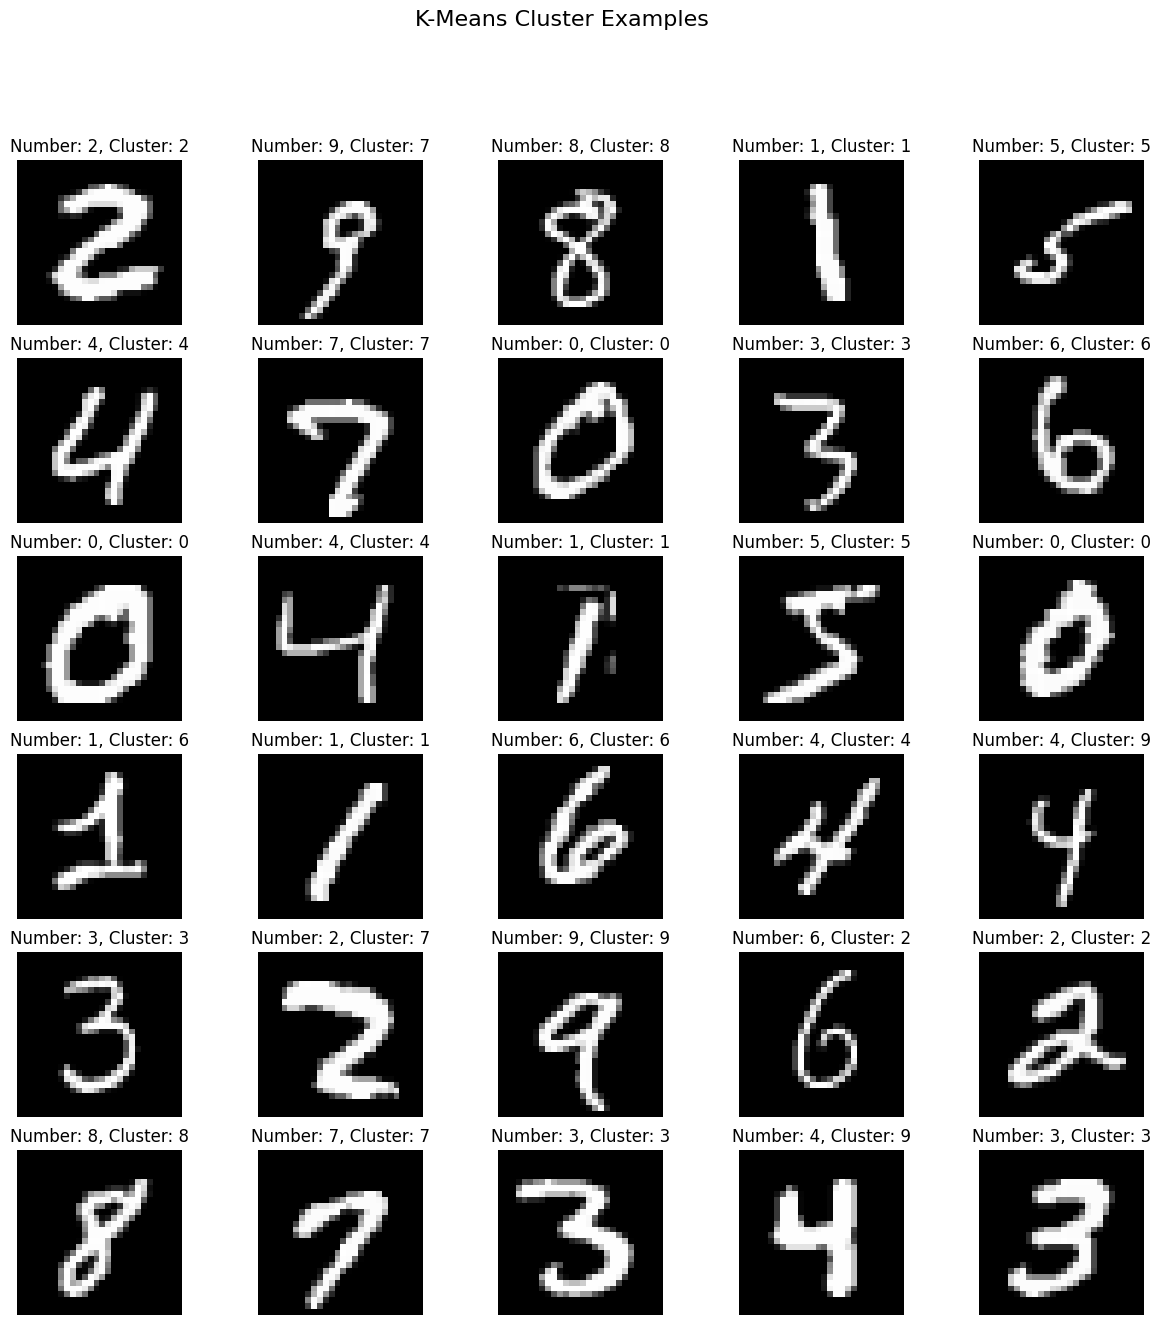

In [174]:
centers = kmeans.cluster_centers_

centers = centers.reshape(clusters_num, 28, 28)

plt.figure(figsize=(15, 15))
for i in range(clusters_num):
    plt.subplot(clusters_num // 5, 5, i + 1)
    plt.imshow(centers[i], cmap='gray')
    plt.title(f"Cluster {true_labels[i]}")
    plt.axis('off')

plt.suptitle("K-Means Cluster Centers", fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 15))
for i in range(clusters_num):

    mask = (labels == i) 

    # Apply the mask to X to get ALL images of that number
    all_images_of_i = X[mask] 
    all_labels_of_i = y[mask]
    
    # Pick the first image from that filtered list
    example_image = all_images_of_i[0]
    example_label = all_labels_of_i[0]
    
    plt.subplot(clusters_num // 5, 5, i + 1)
    plt.imshow(example_image, cmap='gray')
    plt.title(f"Number: {example_label}, Cluster: {true_labels[i]}")
    plt.axis('off')

plt.suptitle("K-Means Cluster Examples", fontsize=16)
plt.show()

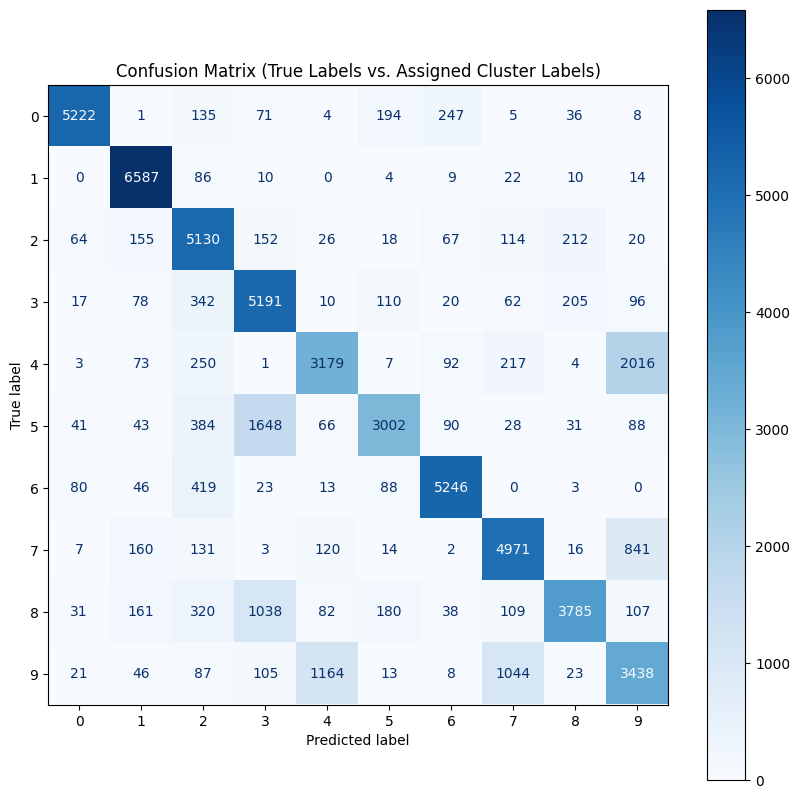

Classification Report for GMM:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.88      0.92      5923
           1       0.90      0.98      0.93      6742
           2       0.70      0.86      0.77      5958
           3       0.63      0.85      0.72      6131
           4       0.68      0.54      0.61      5842
           5       0.83      0.55      0.66      5421
           6       0.90      0.89      0.89      5918
           7       0.76      0.79      0.77      6265
           8       0.88      0.65      0.74      5851
           9       0.52      0.58      0.55      5949

    accuracy                           0.76     60000
   macro avg       0.77      0.76      0.76     60000
weighted avg       0.77      0.76      0.76     60000



In [175]:
y_pred = []

for cluster_id in labels:
    y_pred.append(true_labels[cluster_id])

y_pred = np.array(y_pred)

cm = confusion_matrix(y, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title("Confusion Matrix (True Labels vs. Assigned Cluster Labels)")
plt.show()

# Print the full report
print("Classification Report for GMM:")
print("-" * 60)
print(classification_report(y, y_pred))